#Step 3. Analyzing Data

Es wurden zwei Jupyter Notebooks erstellt, um eine klare Trennung der Arbeitsphasen zu gewährleisten. Das vorliegende Jupyter Notebook dient speziell dem Schritt 3 der Datenanalyse, in dem die Daten umfangreich untersucht, verschiedene Ansätze ausprobiert und nach Mustern gesucht wurde.

Die gewonnenen Erkenntnisse und Ergebnisse wurden im Anschluss in das Haupt-Jupyter-Notebook übertragen und unter Step 4 Presenting informations präsentiert.

Diese Vorgehensweise wurde gewählt, um ein übersichtliches und strukturiertes Arbeiten zu ermöglichen und eine Trennung von den vielen Code- und Text-Blöcken im Hauptdokument zu vermeiden.

Die gesammelten Daten werden in diesem Jupyter Notebook unter Verwendung von statistischen und weiteren Analysemethoden ausgewertet, um Muster, Trends und Zusammenhänge in den Daten identifizieren zu können, welche helfen sollen die im ersten Schritt festgelegten Ziele und Forschungsfragen zu beantworten.

###Verbinden mit Google Drive
Der aufbereitete Datensatz liegt als Excel in einem persönlichem Google Drive Ordner. Dieser wird nachfolgend eingebunden.

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab_Notebooks

/content/drive/MyDrive/Colab_Notebooks


In [ ]:
ls


'Arbeitspakete & Notizen.gdoc'
 BINA_Case_Study_LN2-Step3_Analyzing_Data_JupyterNotebook-Bernhard_Hayoz_Marxer_Schumacher.ipynb
 Straftaten_CH_aufbereitet_V1.xlsx
 Straftaten_CH_aufbereitet_V2.xlsx
 test2_diagramm.png
 test3_diagramm.png
 test_diagramm.png
 test.pkl


# Libraries & Excelfile einlesen:

In [ ]:
#Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Einlesen der einzelnen Excel Sheets (nach Jahre)
df_2009 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2009")
df_2010 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2010")
df_2011 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2011")
df_2012 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2012")
df_2013 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2013")
df_2014 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2014")
df_2015 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2015")
df_2016 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2016")
df_2017 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2017")
df_2018 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2018")
df_2019 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2019")
df_2020 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2020")
df_2021 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2021")
df_2022 = pd.read_excel('Straftaten_CH_aufbereitet_V2.xlsx',sheet_name="2022")
df_all_list = [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

# Analyse anonymisierten Daten

In [ ]:
#Filter Anzahl anonymisierter Datensätze
df_all = pd.concat(df_all_list, ignore_index=True)

# Filtern aller Vorkommnisse des Werts 'X'
rows_before = len(df_all)
delete_X_str = 'X'

# Schleife zum Durchlaufen aller Zeilen des DataFrames in umgekehrter Reihenfolge
for index, row in df_all.iterrows():
  if row["Männlich"] == delete_X_str: # or row["Männlich"] == delete_X_int:
    df_all = df_all.drop(index)

# Ausgabe
print("Im verwendeten Datensatz wurden insgesmat", rows_before - df_all.shape[0], "Datenreihen vor unserer Analyse bereits anonymisiert.")

Im verwendeten Datensatz wurden insgesmat 323 Datenreihen vor unserer Analyse bereits anonymisiert.


# Analyse Kategorien

## Entwicklung Anzahl beschuldigte und begangenen Straften pro Jahr

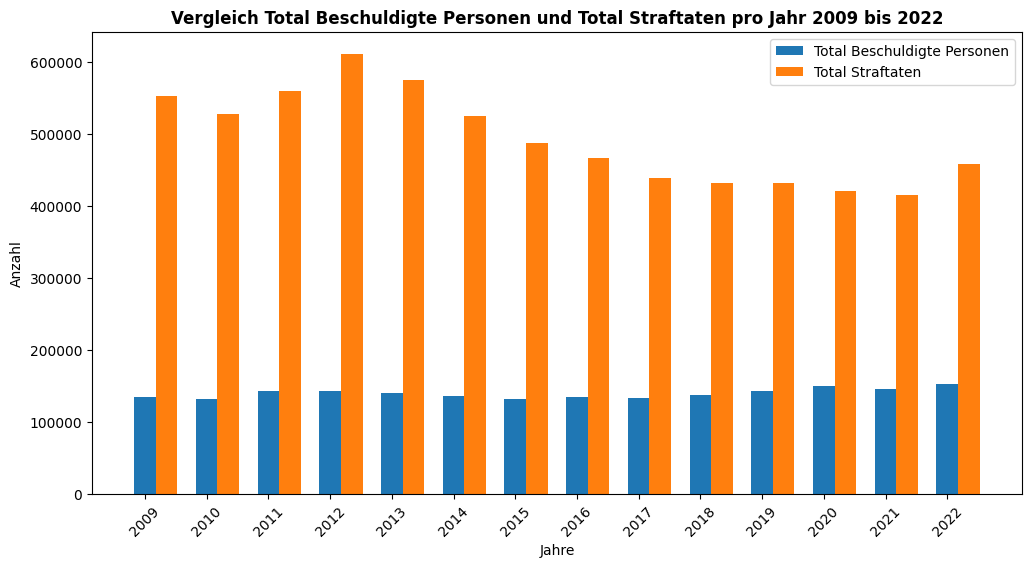

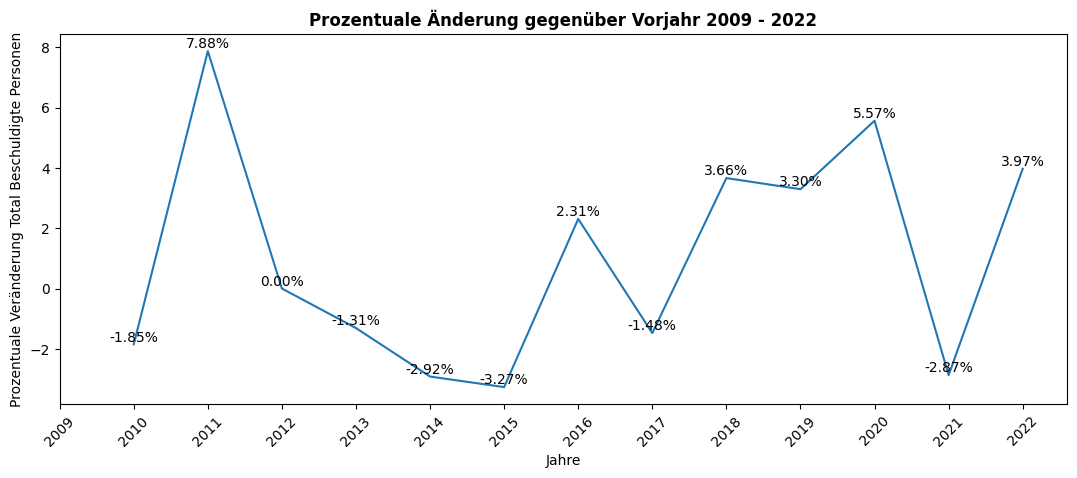

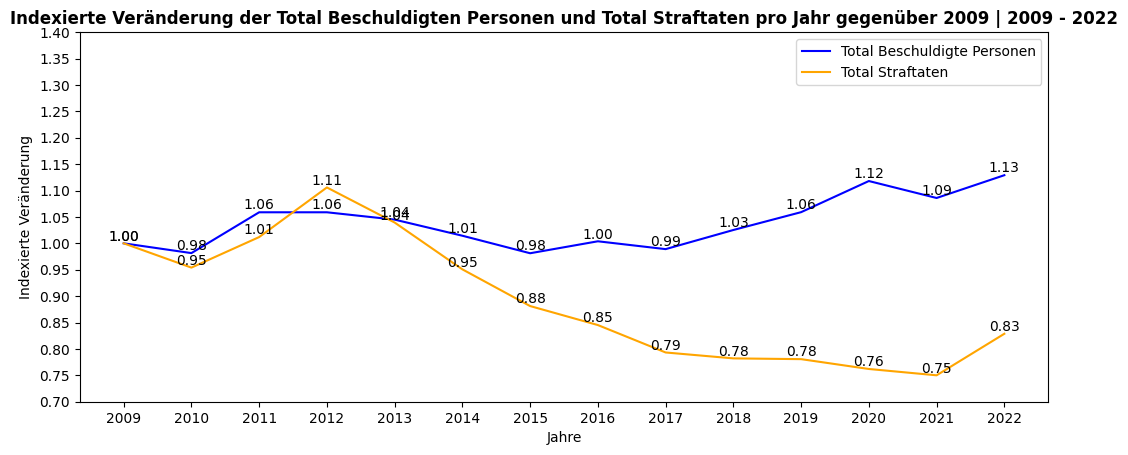

In [ ]:
#Erstellung eines Dataframes mit allen 20 Kategorien
Eindeutige_Kategorien = sorted(df_2022["Kategorie"].unique())

#Total beschuldige Personen und Total Straftaten pro Kategorie (sortiert) 2009-2022
sum_categories_2009_1 = df_2009.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2009_2 = df_2009.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2010_1 = df_2010.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2010_2 = df_2010.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2011_1 = df_2011.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2011_2 = df_2011.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2012_1 = df_2012.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2012_2 = df_2012.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2013_1 = df_2013.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2013_2 = df_2013.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2014_1 = df_2014.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2014_2 = df_2014.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2015_1 = df_2015.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2015_2 = df_2015.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2016_1 = df_2016.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2016_2 = df_2016.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2017_1 = df_2017.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2017_2 = df_2017.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2018_1 = df_2018.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2018_2 = df_2018.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2019_1 = df_2019.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2019_2 = df_2019.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2020_1 = df_2020.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2020_2 = df_2020.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2021_1 = df_2021.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2021_2 = df_2021.groupby("Kategorie")["Total Straftaten"].sum().tolist()
sum_categories_2022_1 = df_2022.groupby("Kategorie")["Total Beschuldigte Personen"].sum().tolist()
sum_categories_2022_2 = df_2022.groupby("Kategorie")["Total Straftaten"].sum().tolist()

#Liste mit Jahr-Nr. für jeweiliges DataFrame
Jahre_2009 = ["2009"] * 21
Jahre_2010 = ["2010"] * 21
Jahre_2011 = ["2011"] * 21
Jahre_2012 = ["2012"] * 21
Jahre_2013 = ["2013"] * 21
Jahre_2014 = ["2014"] * 21
Jahre_2015 = ["2015"] * 21
Jahre_2016 = ["2016"] * 21
Jahre_2017 = ["2017"] * 21
Jahre_2018 = ["2018"] * 21
Jahre_2019 = ["2019"] * 21
Jahre_2020 = ["2020"] * 21
Jahre_2021 = ["2021"] * 21
Jahre_2022 = ["2022"] * 21

#Dataframes für Total beschuldige Personen pro Kategorie pro Jahr 2009 - 2022
categories_sum_2009_df = pd.DataFrame({"Jahr": Jahre_2009, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2009_1, "Total Straftaten": sum_categories_2009_2})
categories_sum_2010_df = pd.DataFrame({"Jahr": Jahre_2010, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2010_1, "Total Straftaten": sum_categories_2010_2})
categories_sum_2011_df = pd.DataFrame({"Jahr": Jahre_2011, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2011_1, "Total Straftaten": sum_categories_2011_2})
categories_sum_2012_df = pd.DataFrame({"Jahr": Jahre_2012, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2012_1, "Total Straftaten": sum_categories_2012_2})
categories_sum_2013_df = pd.DataFrame({"Jahr": Jahre_2013, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2013_1, "Total Straftaten": sum_categories_2013_2})
categories_sum_2014_df = pd.DataFrame({"Jahr": Jahre_2014, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2014_1, "Total Straftaten": sum_categories_2014_2})
categories_sum_2015_df = pd.DataFrame({"Jahr": Jahre_2015, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2015_1, "Total Straftaten": sum_categories_2015_2})
categories_sum_2016_df = pd.DataFrame({"Jahr": Jahre_2016, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2016_1, "Total Straftaten": sum_categories_2016_2})
categories_sum_2017_df = pd.DataFrame({"Jahr": Jahre_2017, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2017_1, "Total Straftaten": sum_categories_2017_2})
categories_sum_2018_df = pd.DataFrame({"Jahr": Jahre_2018, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2018_1, "Total Straftaten": sum_categories_2018_2})
categories_sum_2019_df = pd.DataFrame({"Jahr": Jahre_2019, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2019_1, "Total Straftaten": sum_categories_2019_2})
categories_sum_2020_df = pd.DataFrame({"Jahr": Jahre_2020, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2020_1, "Total Straftaten": sum_categories_2020_2})
categories_sum_2021_df = pd.DataFrame({"Jahr": Jahre_2021, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2021_1, "Total Straftaten": sum_categories_2021_2})
categories_sum_2022_df = pd.DataFrame({"Jahr": Jahre_2022, "Kategorie": Eindeutige_Kategorien,"Total Beschuldigte Personen": sum_categories_2022_1, "Total Straftaten": sum_categories_2022_2})

#Zusammenfassen der verschiedenen Dataframes und erstellen einer Liste mit Einträgen pro Jahr nach Kategorie und Summe pro Kategorie
df_list = [categories_sum_2009_df, categories_sum_2010_df, categories_sum_2011_df, categories_sum_2012_df,
           categories_sum_2013_df, categories_sum_2014_df, categories_sum_2015_df, categories_sum_2016_df,
           categories_sum_2017_df, categories_sum_2018_df, categories_sum_2019_df, categories_sum_2020_df,
           categories_sum_2021_df, categories_sum_2022_df]
categories_sum_df = pd.concat(df_list, ignore_index=True)

#Anzahl Total beschuldige Personen pro Jahr
years_sum_df = pd.DataFrame(columns=['Jahr', 'Total Beschuldigte Personen'])

years_sum_df.loc[0, "Jahr"] = "2009"
years_sum_df.loc[0, "Total Beschuldigte Personen"] = categories_sum_2009_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[0, "Total Straftaten"] = categories_sum_2009_df["Total Straftaten"].sum()
years_sum_df.loc[1, "Jahr"] = "2010"
years_sum_df.loc[1, "Total Beschuldigte Personen"] = categories_sum_2010_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[1, "Total Straftaten"] = categories_sum_2010_df["Total Straftaten"].sum()
years_sum_df.loc[2, "Jahr"] = "2011"
years_sum_df.loc[2, "Total Beschuldigte Personen"] = categories_sum_2012_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[2, "Total Straftaten"] = categories_sum_2011_df["Total Straftaten"].sum()
years_sum_df.loc[3, "Jahr"] = "2012"
years_sum_df.loc[3, "Total Beschuldigte Personen"] = categories_sum_2012_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[3, "Total Straftaten"] = categories_sum_2012_df["Total Straftaten"].sum()
years_sum_df.loc[4, "Jahr"] = "2013"
years_sum_df.loc[4, "Total Beschuldigte Personen"] = categories_sum_2013_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[4, "Total Straftaten"] = categories_sum_2013_df["Total Straftaten"].sum()
years_sum_df.loc[5, "Jahr"] = "2014"
years_sum_df.loc[5, "Total Beschuldigte Personen"] = categories_sum_2014_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[5, "Total Straftaten"] = categories_sum_2014_df["Total Straftaten"].sum()
years_sum_df.loc[6, "Jahr"] = "2015"
years_sum_df.loc[6, "Total Beschuldigte Personen"] = categories_sum_2015_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[6, "Total Straftaten"] = categories_sum_2015_df["Total Straftaten"].sum()
years_sum_df.loc[7, "Jahr"] = "2016"
years_sum_df.loc[7, "Total Beschuldigte Personen"] = categories_sum_2016_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[7, "Total Straftaten"] = categories_sum_2016_df["Total Straftaten"].sum()
years_sum_df.loc[8, "Jahr"] = "2017"
years_sum_df.loc[8, "Total Beschuldigte Personen"] = categories_sum_2017_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[8, "Total Straftaten"] = categories_sum_2017_df["Total Straftaten"].sum()
years_sum_df.loc[9, "Jahr"] = "2018"
years_sum_df.loc[9, "Total Beschuldigte Personen"] = categories_sum_2018_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[9, "Total Straftaten"] = categories_sum_2018_df["Total Straftaten"].sum()
years_sum_df.loc[10, "Jahr"] = "2019"
years_sum_df.loc[10, "Total Beschuldigte Personen"] = categories_sum_2019_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[10, "Total Straftaten"] = categories_sum_2019_df["Total Straftaten"].sum()
years_sum_df.loc[11, "Jahr"] = "2020"
years_sum_df.loc[11, "Total Beschuldigte Personen"] = categories_sum_2020_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[11, "Total Straftaten"] = categories_sum_2020_df["Total Straftaten"].sum()
years_sum_df.loc[12, "Jahr"] = "2021"
years_sum_df.loc[12, "Total Beschuldigte Personen"] = categories_sum_2021_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[12, "Total Straftaten"] = categories_sum_2021_df["Total Straftaten"].sum()
years_sum_df.loc[13, "Jahr"] = "2022"
years_sum_df.loc[13, "Total Beschuldigte Personen"] = categories_sum_2022_df["Total Beschuldigte Personen"].sum()
years_sum_df.loc[13, "Total Straftaten"] = categories_sum_2022_df["Total Straftaten"].sum()

#X-Y-Chart Total Beschuldigte Personen und Total Straftaten pro Jahr 2009 - 2022
bar_width = 0.35  # Breite der Balken
years = years_sum_df.Jahr
total_personen = years_sum_df["Total Beschuldigte Personen"]
fig, ax = plt.subplots(figsize=(12,6))
index = np.arange(len(years))
rects1 = ax.bar(index, total_personen, bar_width, label='Total Beschuldigte Personen')
rects2 = ax.bar(index + bar_width, years_sum_df["Total Straftaten"], bar_width, label='Total Straftaten')
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl')
ax.set_title('Vergleich Total Beschuldigte Personen und Total Straftaten pro Jahr 2009 bis 2022', fontweight="bold")
ax.set_xticks(index)
ax.set_xticklabels(years, rotation=45)
ax.legend()

plt.show()

#Prozentuale Veränderung zum Vorjahr 2009 - 2022
years_sum_df["Prozentuale Veränderung Total Beschuldigte Personen"] = years_sum_df["Total Beschuldigte Personen"].pct_change() * 100

#Indexierte Veränderung Total Beschuldigte Personen auf Basis 2009 | 2009 - 2022
for i in range(14):
  years_sum_df.at[i, "Indexierte Prozentuale Veränderung Total Beschuldigte Personen"] = years_sum_df.loc[i, "Total Beschuldigte Personen"] / years_sum_df.loc[0,  "Total Beschuldigte Personen"]

#Indexierte Veränderung Total Straftaten auf Basis 2009 | 2009 - 2022

for i in range(14):
  years_sum_df.at[i, "Indexierte Prozentuale Veränderung Total Straftaten"] = years_sum_df.loc[i, "Total Straftaten"] / years_sum_df.loc[0,  "Total Straftaten"]
#print(years_sum_df)
#X-Y-Chart Prozentuale Änderung gegenüber Vorjahr 2009 - 2022
plt.figure().set_figwidth(13)
plt.plot(years_sum_df.Jahr, years_sum_df["Prozentuale Veränderung Total Beschuldigte Personen"])
plt.xlabel("Jahre")
plt.xticks(years_sum_df.Jahr, rotation=45)
plt.ylabel("Prozentuale Veränderung Total Beschuldigte Personen")
plt.title("Prozentuale Änderung gegenüber Vorjahr 2009 - 2022", fontweight="bold")

# Hinzufügen von Textlabels für die einzelnen Datenpunkte von Total Beschuldigte Personen
for i, row in years_sum_df.iterrows():
    plt.text(row["Jahr"], row["Prozentuale Veränderung Total Beschuldigte Personen"], f"{row['Prozentuale Veränderung Total Beschuldigte Personen']:.2f}%", ha='center', va='bottom')

plt.show()

#X-Y-Chart indexierte Veränderung pro Jahr gegenüber 2009 | 2009 - 2022
plt.figure().set_figwidth(12.5)
plt.plot(years_sum_df.Jahr, years_sum_df["Indexierte Prozentuale Veränderung Total Beschuldigte Personen"], label = "Total Beschuldigte Personen", color ="blue")
plt.plot(years_sum_df.Jahr, years_sum_df["Indexierte Prozentuale Veränderung Total Straftaten"], label = "Total Straftaten", color = "orange")
plt.xlabel("Jahre")
plt.xticks(years_sum_df.Jahr, rotation=0)
plt.ylabel("Indexierte Veränderung")
plt.yticks(np.arange(0.7, 1.45, 0.05))
plt.title("Indexierte Veränderung der Total Beschuldigten Personen und Total Straftaten pro Jahr gegenüber 2009 | 2009 - 2022", fontweight="bold")
plt.legend()

# Hinzufügen von Textlabels für die einzelnen Datenpunkte von Index Total Beschuldigten Personen
for i, row in years_sum_df.iterrows():
    plt.text(row["Jahr"], row["Indexierte Prozentuale Veränderung Total Beschuldigte Personen"], f"{row['Indexierte Prozentuale Veränderung Total Beschuldigte Personen']:.2f}", ha='center', va='bottom')

# Hinzufügen von Textlabels für die einzelnen Datenpunkte von Index Total Straftaten
for i, row in years_sum_df.iterrows():
    plt.text(row["Jahr"], row["Indexierte Prozentuale Veränderung Total Straftaten"], f"{row['Indexierte Prozentuale Veränderung Total Straftaten']:.2f}", ha='center', va='bottom')

plt.show()

## Korrelation Bevölkerungswachstum und Entwicklung Totale Straftaten

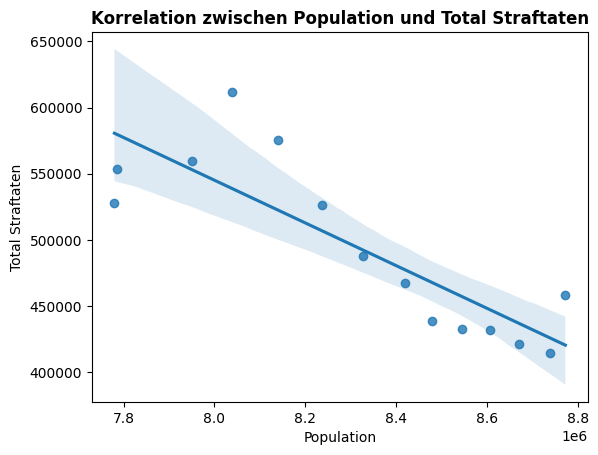

In [ ]:
#Erstellen DF für Entwicklung Wohnbevölkerung von 2009 bis 2021 (Quelle BFS)
#Als Ausländer wird in der vorliegenden Publikation jede Person bezeichnet, die einzig die Staatsbürgerschaft eines ausländischen Staates besitzt. Diese Personen sind nicht identisch mit den im Ausland Geborenen, welche in der Zwischenzeit die schweizerische Staatsangehörigkeit erworben haben können. Der
#Anteil im Ausland Geborener ist auch in der Schweiz als Folge der Migrationsgeschichte und der Bürgerrechtsregelung heute immer noch leicht höher als der Ausländeranteil (2007: 22,1%). Personen, die neben
#einem ausländischen auch das Schweizer Bürgerrecht besitzen (Doppelbürger), werden in der Statistik als
#Schweizer gezählt. Gemäss Volkszählung 2000 waren 8,6% aller Schweizer Staatsbürger (495'300 Personen) Doppelbürger. Staatenlose und Personen, deren Staatsangehörigkeit ungeklärt ist, werden hingegen
#als Ausländer betrachtet.

#Versuch um Korrelation zwischen Bevölkerungswachstum und Anzahl Straftaten zu untersuchen.

Population_Total = [7786000, 7780000, 7950000, 8039000, 8140000, 8238000, 8327000, 8420000, 8480000, 8545000, 8606000, 8670000, 8739000, 8773000]
Ausländer = [1714000, 1766000, 1816000, 1870000, 1937000, 1998000, 2048000, 2101000, 2126000, 2148000, 2175000, 2211000, 2244000, 2242000 ]
Schweizer = []

for x in range(len(Ausländer)):
  Schweizer.append(Population_Total[x] - Ausländer[x])

Wohnbevölkerung_CH_df = pd.DataFrame(columns=["Jahr"])
Wohnbevölkerung_CH_df["Jahr"] = range(2009,2023)
Wohnbevölkerung_CH_df["Ausländer"] = Ausländer
Wohnbevölkerung_CH_df["Schweizer"] = Schweizer
Wohnbevölkerung_CH_df["Population"] = Wohnbevölkerung_CH_df["Ausländer"] + Wohnbevölkerung_CH_df["Schweizer"]
Wohnbevölkerung_CH_df["Bevölkerungswachstum"] = Wohnbevölkerung_CH_df["Population"].pct_change() * 100

# use the function regplot to make a scatterplot
sns.regplot(x=Wohnbevölkerung_CH_df["Population"], y=years_sum_df["Total Straftaten"])
plt.title("Korrelation zwischen Population und Total Straftaten", fontweight="bold")

from scipy.stats import pearsonr


In [ ]:
#Berechnung der Korrelation und des p-Wertes für die Überprüfung der Signifikanz
Korrelation, p_Wert = pearsonr(Wohnbevölkerung_CH_df["Population"], years_sum_df["Total Straftaten"])

Korrelation = np.corrcoef(Wohnbevölkerung_CH_df["Population"], years_sum_df["Total Straftaten"])[0,1]

print("Die Korrelation zwischen der Population und den totalen Straftaten zwischen 2009 und 2022 beträgt:", str(round(Korrelation, 2)) + ". Hierbei handelt es sich um eine negative Korrelation.")
print("Der p-Wert beträgt:", str(round(p_Wert, 5)) + ". Dies legt eine statisch signifikaten Korrelation nahe.")

Die Korrelation zwischen der Population und den totalen Straftaten zwischen 2009 und 2022 beträgt: -0.85. Hierbei handelt es sich um eine negative Korrelation.
Der p-Wert beträgt: 0.00014. Dies legt eine statisch signifikaten Korrelation nahe.


## Relative Verteilung der Kategorien mit Basis Total Beschuldigte Personen 2009 - 2022

<ipython-input-10-31025414fed8>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', len(categories))


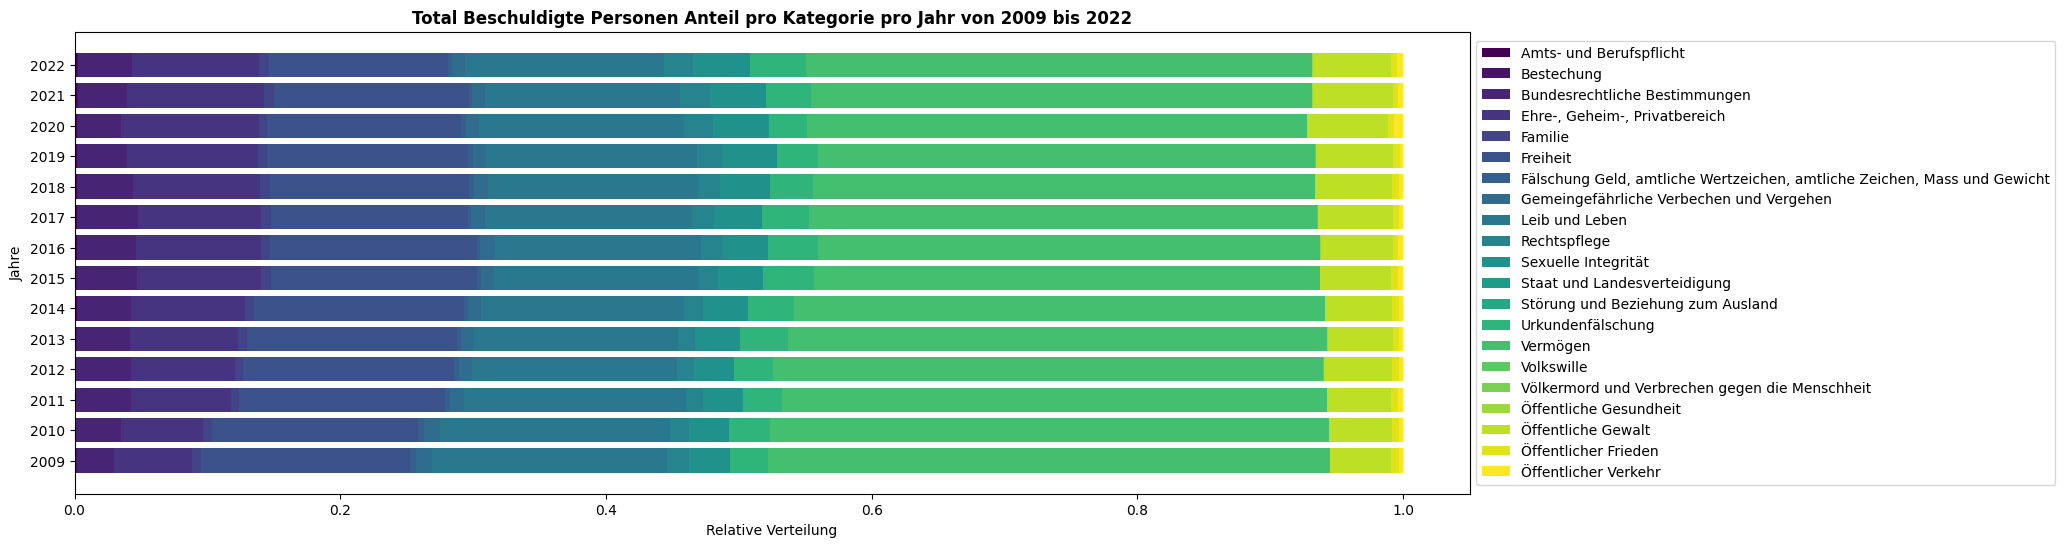

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Data
years = range(2009, 2023)
categories = Eindeutige_Kategorien  # Replace Eindeutige_Kategorien with your category names
data = {
    "2009": sum_categories_2009_1,
    "2010": sum_categories_2010_1,
    "2011": sum_categories_2011_1,
    "2012": sum_categories_2012_1,
    "2013": sum_categories_2013_1,
    "2014": sum_categories_2014_1,
    "2015": sum_categories_2015_1,
    "2016": sum_categories_2016_1,
    "2017": sum_categories_2017_1,
    "2018": sum_categories_2018_1,
    "2019": sum_categories_2019_1,
    "2020": sum_categories_2020_1,
    "2021": sum_categories_2021_1,
    "2022": sum_categories_2022_1,
}

# Convert data to array of values
values = np.array([data[str(year)] for year in years])
total_values = np.sum(values, axis=1)
normalized_values = values / total_values[:, np.newaxis]

# Get a color map with the number of categories
color_map = cm.get_cmap('viridis', len(categories))

# Plotting
fig, ax = plt.subplots(figsize=(18, 6))  # Adjust the width and height as needed
left = np.zeros(len(years))
for i, category in enumerate(categories):
    ax.barh(years, normalized_values[:, i], left=left, label=category, color=color_map(i))
    left += normalized_values[:, i]
ax.set_xlabel("Relative Verteilung")
ax.set_ylabel("Jahre")
ax.set_title("Total Beschuldigte Personen Anteil pro Kategorie pro Jahr von 2009 bis 2022", fontweight="bold")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_yticks(years)
ax.set_yticklabels(years)

plt.show()

## Relative Verteilung der Kategorien mit Basis Total Straftaten 2009 - 2022

<ipython-input-11-7be228f08e8d>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', len(categories))


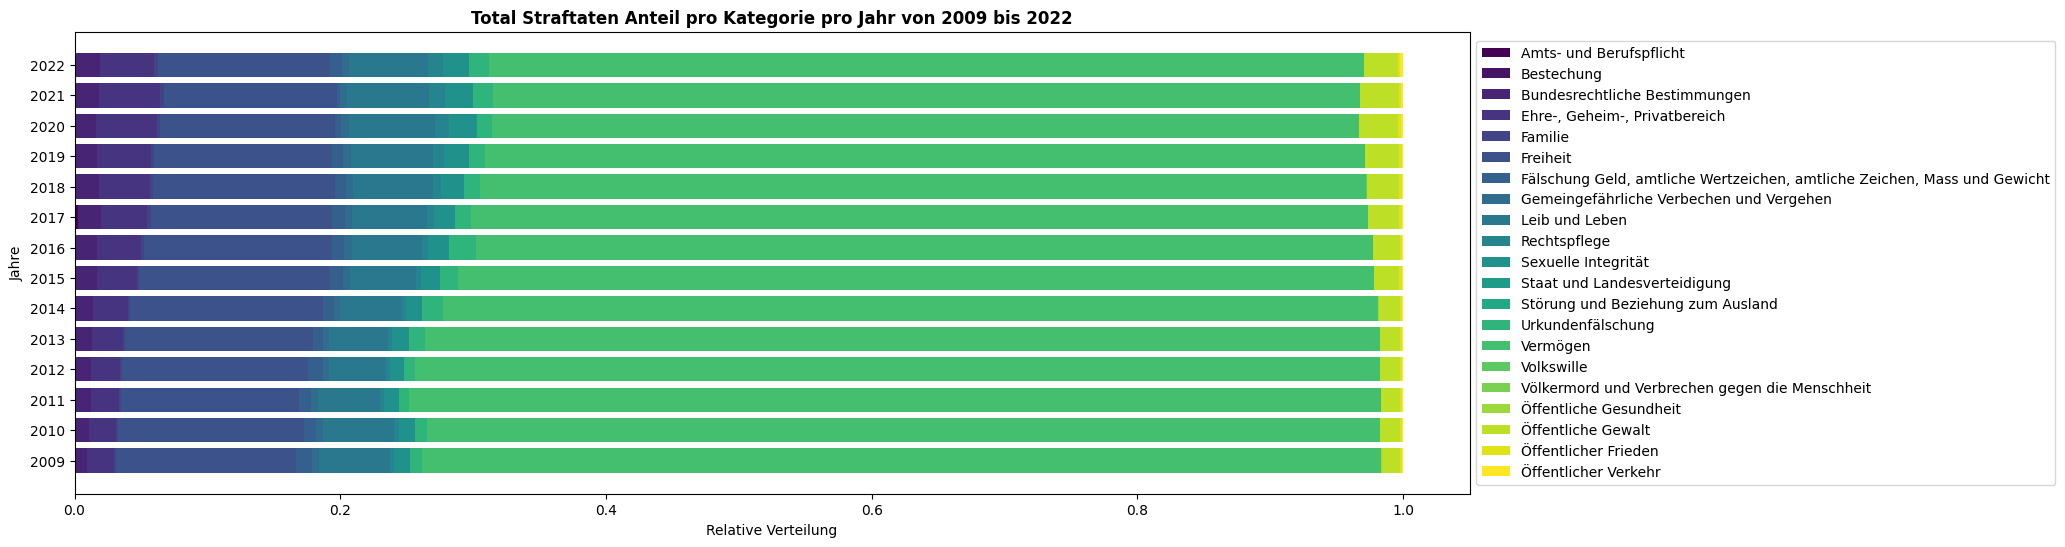

In [ ]:
# Data
years = range(2009, 2023)
categories = Eindeutige_Kategorien  # Replace Eindeutige_Kategorien with your category names
data = {
    "2009": sum_categories_2009_2,
    "2010": sum_categories_2010_2,
    "2011": sum_categories_2011_2,
    "2012": sum_categories_2012_2,
    "2013": sum_categories_2013_2,
    "2014": sum_categories_2014_2,
    "2015": sum_categories_2015_2,
    "2016": sum_categories_2016_2,
    "2017": sum_categories_2017_2,
    "2018": sum_categories_2018_2,
    "2019": sum_categories_2019_2,
    "2020": sum_categories_2020_2,
    "2021": sum_categories_2021_2,
    "2022": sum_categories_2022_2,
}

# Convert data to array of values
values = np.array([data[str(year)] for year in years])
total_values = np.sum(values, axis=1)
normalized_values = values / total_values[:, np.newaxis]

# Get a color map with the number of categories
color_map = cm.get_cmap('viridis', len(categories))

# Plotting
fig, ax = plt.subplots(figsize=(18, 6))  # Adjust the width and height as needed
left = np.zeros(len(years))
for i, category in enumerate(categories):
    ax.barh(years, normalized_values[:, i], left=left, label=category, color=color_map(i))
    left += normalized_values[:, i]
ax.set_xlabel("Relative Verteilung")
ax.set_ylabel("Jahre")
ax.set_title("Total Straftaten Anteil pro Kategorie pro Jahr von 2009 bis 2022", fontweight="bold")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_yticks(years)
ax.set_yticklabels(years)

plt.show()

## Prozentuale Entwicklung der Kategorien mit Basis Total Beschuldigte Personen gegenüber Vorjahr von 2009 bis 2022

<ipython-input-12-6b9f123b1f4c>:9: RuntimeWarning: invalid value encountered in double_scalars
  df.loc[i, "Indexierter Wert"] = df.loc[i, "Total Beschuldigte Personen"] / df.loc[0, "Total Beschuldigte Personen"]
<ipython-input-12-6b9f123b1f4c>:9: RuntimeWarning: divide by zero encountered in double_scalars
  df.loc[i, "Indexierter Wert"] = df.loc[i, "Total Beschuldigte Personen"] / df.loc[0, "Total Beschuldigte Personen"]
<ipython-input-12-6b9f123b1f4c>:9: RuntimeWarning: invalid value encountered in double_scalars
  df.loc[i, "Indexierter Wert"] = df.loc[i, "Total Beschuldigte Personen"] / df.loc[0, "Total Beschuldigte Personen"]


<function matplotlib.pyplot.show(close=None, block=None)>

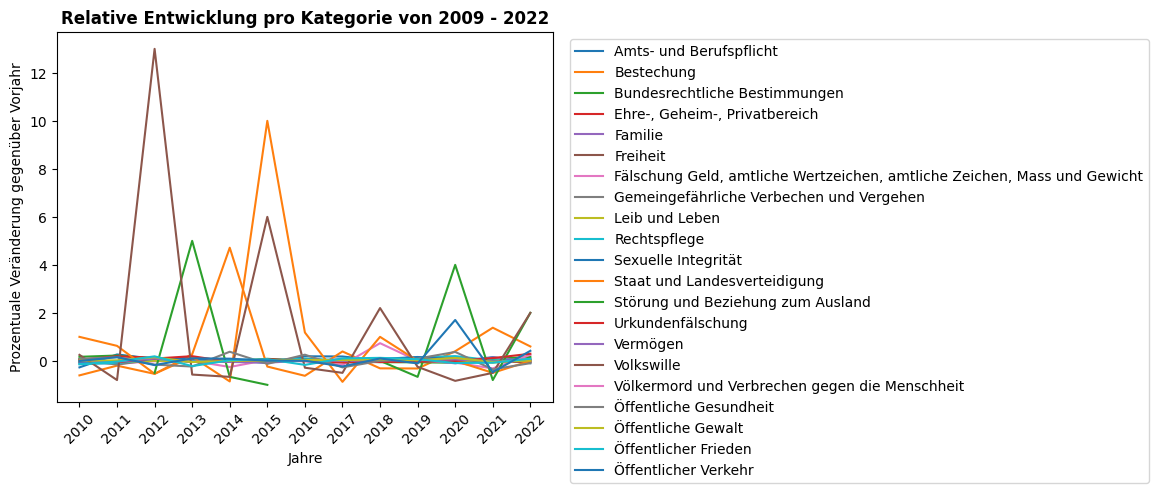

In [ ]:
#Erstellung Df pro Kategorie Entwicklung von Total Beschuldigten von 2009 bis 2022
categories_sum_sorted_df= categories_sum_df.sort_values(by=["Kategorie", "Jahr"], ascending=True, ignore_index=True)
#print(categories_sum_sorted_df)
#print(categories_sum_sorted_df["Kategorie"].unique())

def calculate_indexed_changes(df):
  df["Prozentuale Veränderungen"] = df["Total Beschuldigte Personen"].pct_change()
  for i in range(14):
    df.loc[i, "Indexierter Wert"] = df.loc[i, "Total Beschuldigte Personen"] / df.loc[0, "Total Beschuldigte Personen"]

Kategorie_dfs = []
i = 0
for Kategorie in Eindeutige_Kategorien:
  Cat_i_df = categories_sum_sorted_df[categories_sum_sorted_df["Kategorie"] == Kategorie].reset_index(drop=True)
  Kategorie_dfs.append(Cat_i_df)

for df in Kategorie_dfs:
  calculate_indexed_changes(df)

plt.title("Relative Entwicklung der Kategorie 'Bestechung' von 2009 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(rotation=45)
plt.ylabel("Prozentuale Veränderung")

#Erstellung Plot mit relativer Entwicklung pro Kategorie 2009 - 2023
for df in Kategorie_dfs:
    plt.plot(df.Jahr, df["Prozentuale Veränderungen"], label=df["Kategorie"].iloc[0])

plt.title("Relative Entwicklung pro Kategorie von 2009 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(rotation=45)
plt.ylabel("Prozentuale Veränderung gegenüber Vorjahr")

# Legende rechts vom Plot platzieren
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show

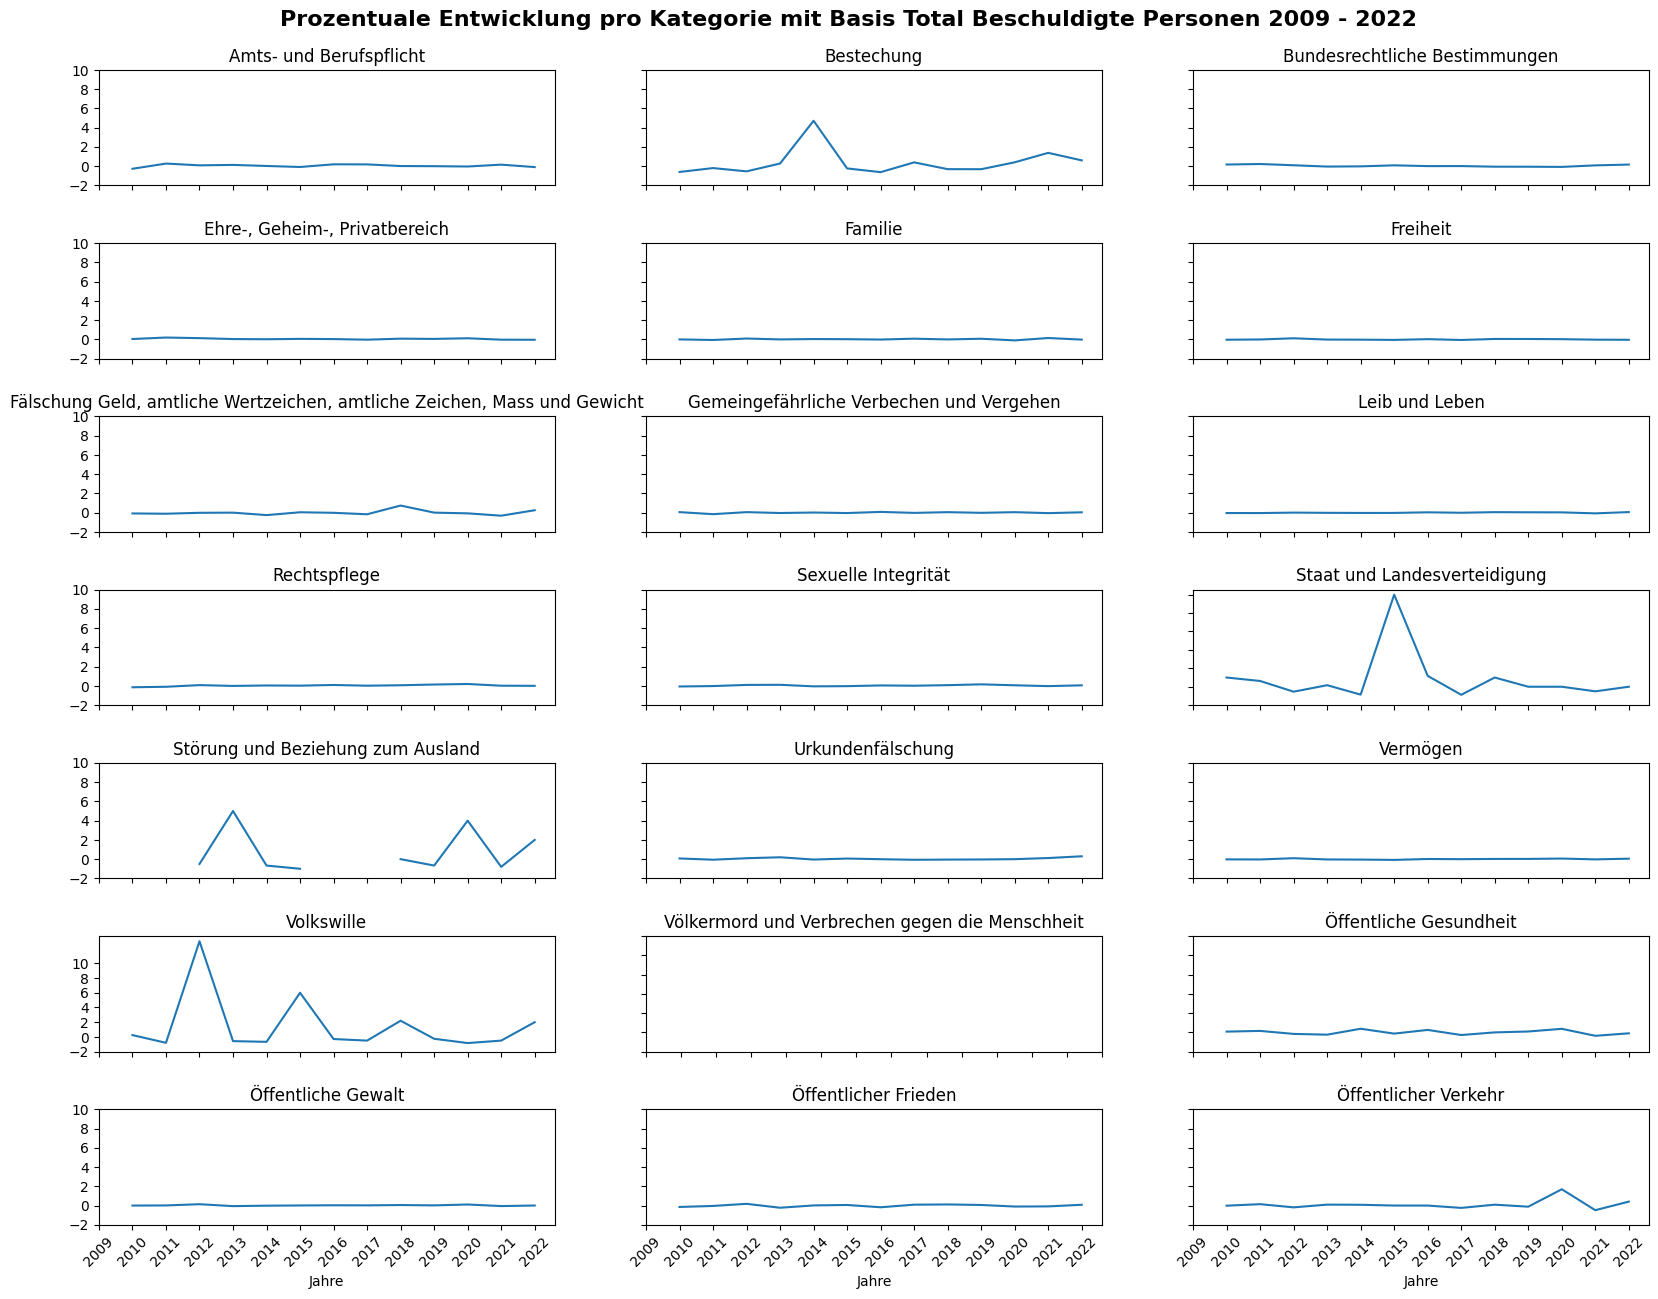

In [ ]:
fig, axs = plt.subplots(7, 3, figsize=(20, 15))  # 7 Zeilen, 3 Spalten
plt.subplots_adjust(hspace=0.5)  # Abstand zwischen den Subplots einstellen

for i, df in enumerate(Kategorie_dfs):
    row = i // 3  # Zeilenindex
    col = i % 3  # Spaltenindex

    axs[row, col].plot(df.Jahr, df["Prozentuale Veränderungen"])
    axs[row, col].set_title(df["Kategorie"].iloc[0])
    axs[row, col].set_xlabel("Jahre")
    axs[row, col].set_xticks(df.Jahr)
    axs[row, col].set_yticks(range(-2, 11, 2))
    axs[row, col].tick_params(axis='x', rotation=45)

for ax in axs.flat:
    ax.label_outer()

# Übergeordneten Titel hinzufügen
plt.suptitle("Prozentuale Entwicklung pro Kategorie mit Basis Total Beschuldigte Personen 2009 - 2022", fontsize=16, fontweight="bold", y=0.92)


# Diagramm anzeigen
plt.show()

## Indexierte Entwicklung der Kategorien mit Basis Total Beschuldigte Personen gegenüber 2009 von 2009 bis 2022

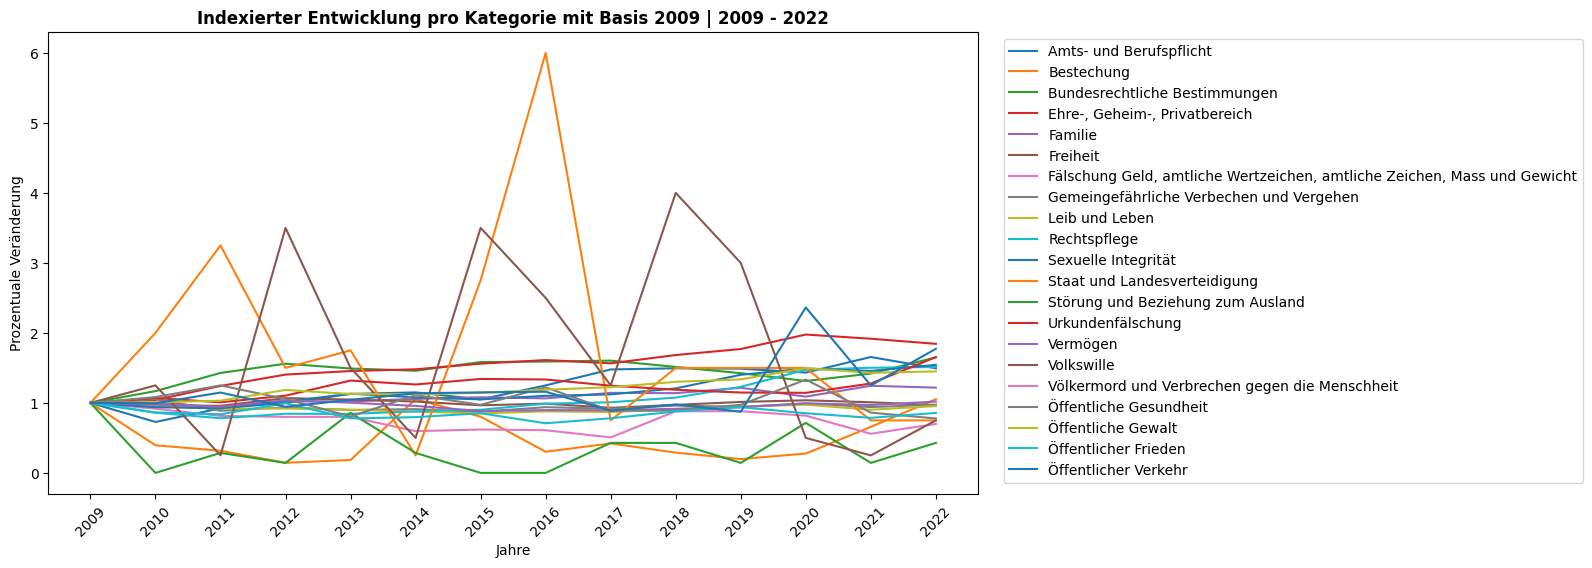

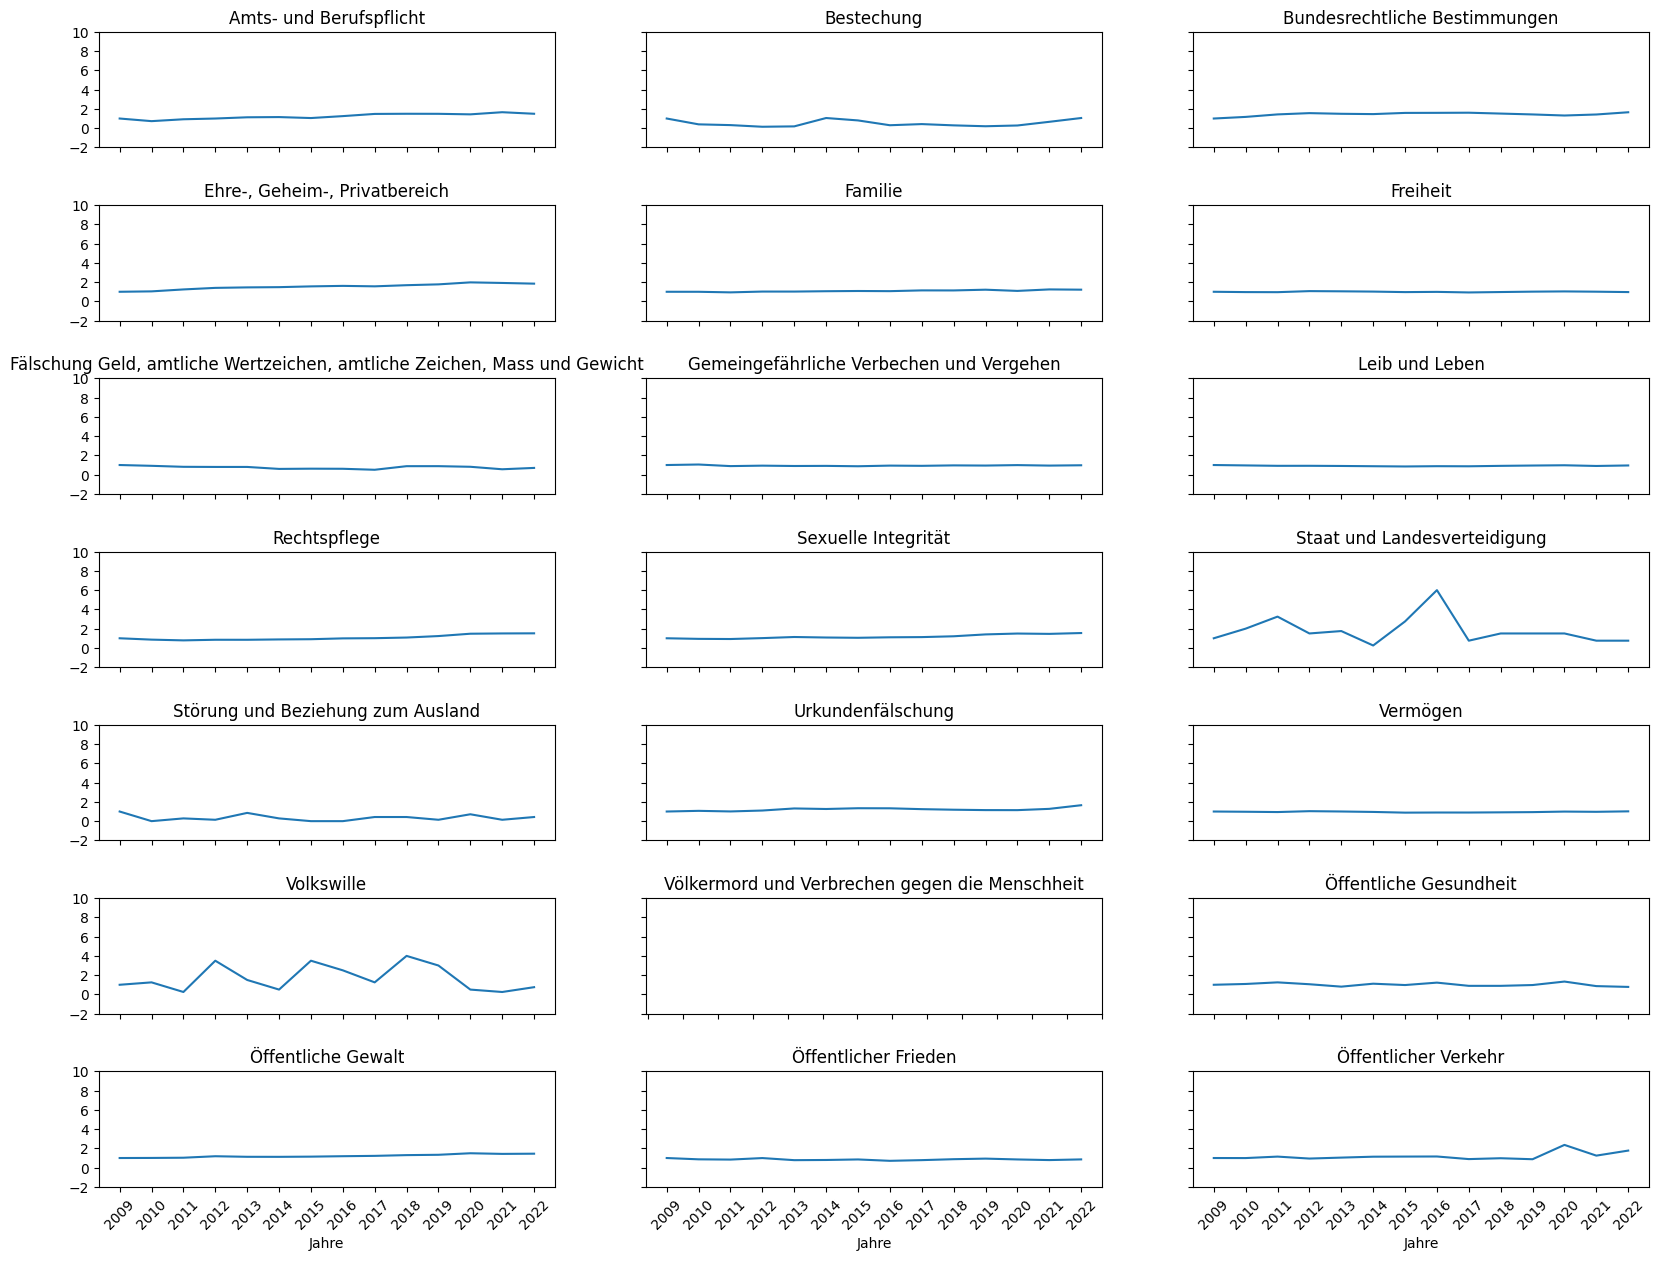

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))  # Breite der Abbildung auf 12 festgelegt

# Erstellung Plot mit indexierter Entwicklung pro Kategorie mit Basis 2009 | 2009 - 2022
for df in Kategorie_dfs:
    plt.plot(df.Jahr, df["Indexierter Wert"], label=df["Kategorie"].iloc[0])

plt.title("Indexierter Entwicklung pro Kategorie mit Basis 2009 | 2009 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(rotation=45)
plt.ylabel("Prozentuale Veränderung")

# Legende rechts vom Plot platzieren
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Diagramm anzeigen
plt.show()

# Erstellung Plot mit relativer Entwicklung pro Kategorie 2009 - 2022
fig, axs = plt.subplots(7, 3, figsize=(20, 15))  # 7 Zeilen, 3 Spalten
plt.subplots_adjust(hspace=0.5)  # Abstand zwischen den Subplots einstellen

for i, df in enumerate(Kategorie_dfs):
    row = i // 3  # Zeilenindex
    col = i % 3  # Spaltenindex

    axs[row, col].plot(df.Jahr, df["Indexierter Wert"])
    axs[row, col].set_title(df["Kategorie"].iloc[0])
    axs[row, col].set_xlabel("Jahre")
    axs[row, col].set_xticks(df.Jahr)
    axs[row, col].set_yticks(range(-2, 11, 2))
    axs[row, col].tick_params(axis='x', rotation=45)

for ax in axs.flat:
    ax.label_outer()

# Diagramm anzeigen
plt.show()


## Heatmap der Kategorien mit Basis Total Beschuldigte Personen 2009 bis 2022

Dies stellt eine Heatmap der Kategorien auf Basis der Total Beschuldigten Personen von 2009 bis 2022 dar. Die stärkste Kategorie ist das Vermögen. 
Was hier auch ersichtlich wird, ist der Fakt, dass viele Kategorien schwarz und in der Geamtbetrachtung nicht stark vertreten sind.


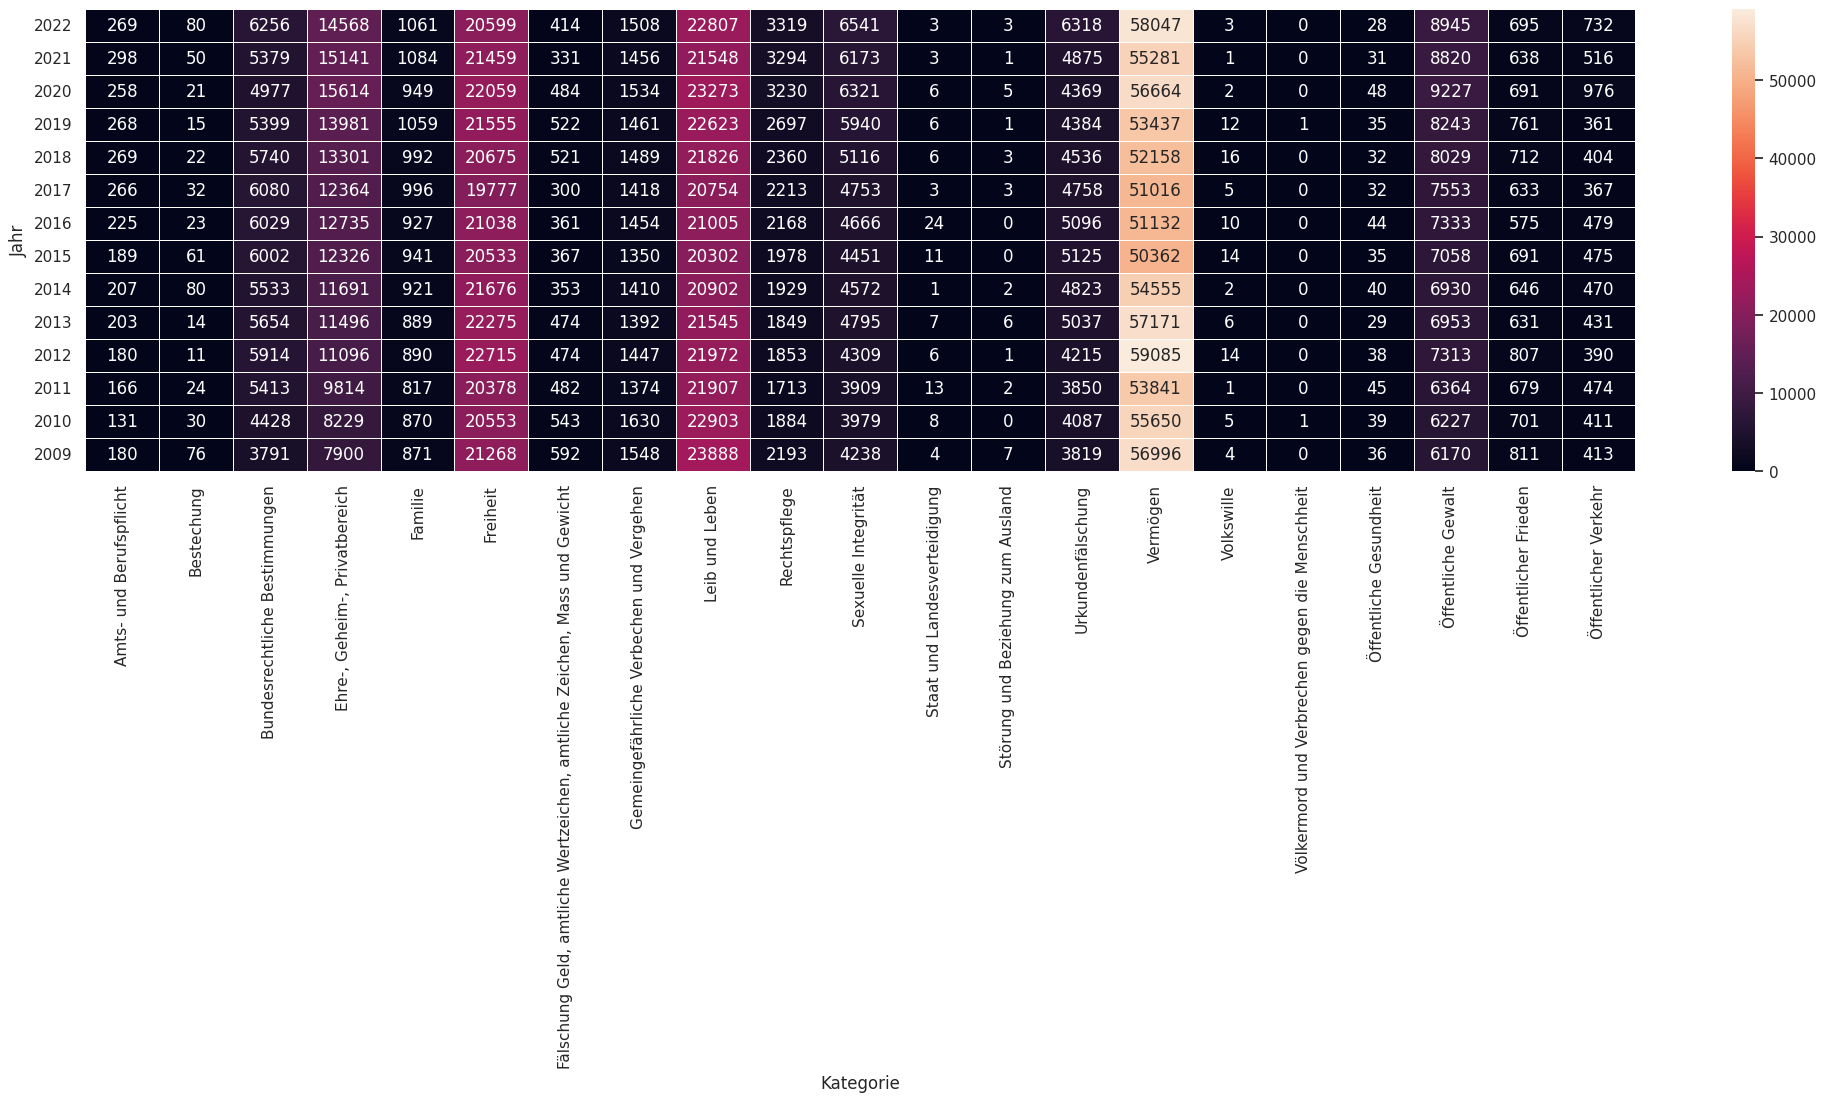

In [ ]:
#Heatmap für Verteilung der Kategorien von Total Beschuldigten Personen von 2009 bis 2022
sns.set_theme()

df_heatmap_cat = categories_sum_sorted_df
df_heatmap_cat["Total Beschuldigte Personen"] = pd.to_numeric(df_heatmap_cat['Total Beschuldigte Personen'], errors='coerce')

#konvertieren zu Ganzzahlen
df_heatmap_cat['Total Beschuldigte Personen'] = df_heatmap_cat['Total Beschuldigte Personen'].astype(int)

# Pivotiere das DataFrame, um es für eine Heatmap geeignet zu machen
heatmap_data = df_heatmap_cat.pivot(index='Jahr', columns='Kategorie', values='Total Beschuldigte Personen')

# Index-Reihenfolge der Jahre umkehren
heatmap_data = heatmap_data.reindex(index=heatmap_data.index[::-1])
f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", linewidths=.5, ax=ax)

print("Dies stellt eine Heatmap der Kategorien auf Basis der Total Beschuldigten Personen von 2009 bis 2022 dar. Die stärkste Kategorie ist das Vermögen. \nWas hier auch ersichtlich wird, ist der Fakt, dass viele Kategorien schwarz und in der Geamtbetrachtung nicht stark vertreten sind.")

## Heatmap der Kategorien mit Basis Total Straftaten 2009 bis 2022

Bei den begangenen Straftaten zeigt sich ein ähnliches Bild nur noch viel ausgeprägter. Die Kategorie Vermögen ist mit Abstand die grösste Kategorie in jedem Jahr.


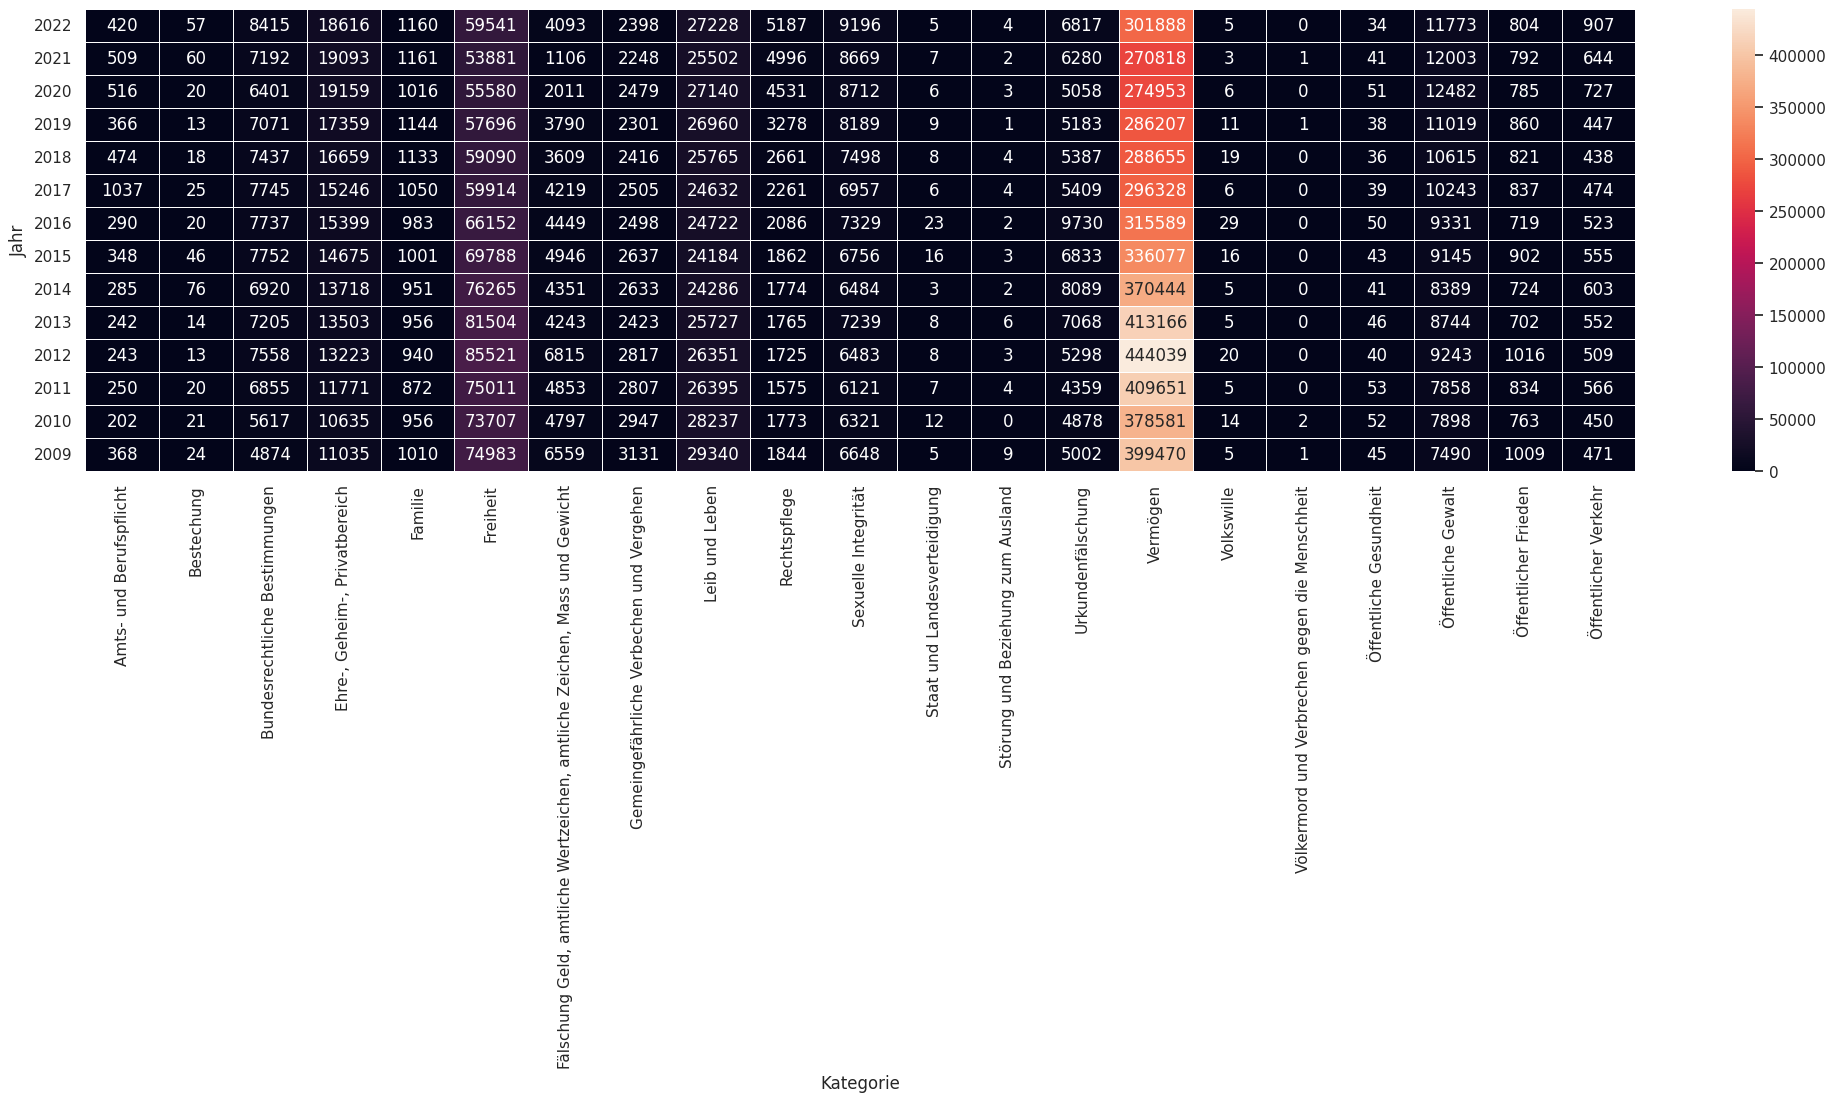

In [ ]:
#Heatmap für Kategorieentwicklung von Total Straftaten von 2009 bis 2022
sns.set_theme()

df_heatmap_cat = categories_sum_sorted_df
df_heatmap_cat["Total Straftaten"] = pd.to_numeric(df_heatmap_cat['Total Straftaten'], errors='coerce')

#konvertieren zu Ganzzahlen
df_heatmap_cat['Total Straftaten'] = df_heatmap_cat['Total Straftaten'].astype(int)

# Pivotiere das DataFrame, um es für eine Heatmap geeignet zu machen
heatmap_data = df_heatmap_cat.pivot(index='Jahr', columns='Kategorie', values='Total Straftaten')

# Index-Reihenfolge der Jahre umkehren
heatmap_data = heatmap_data.reindex(index=heatmap_data.index[::-1])
f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", linewidths=.5, ax=ax)

print("Bei den begangenen Straftaten zeigt sich ein ähnliches Bild nur noch viel ausgeprägter. Die Kategorie Vermögen ist mit Abstand die grösste Kategorie in jedem Jahr.")

## Absolute Verteilung der Total Beschuldigten auf Kategorien pro Jahr von 2009 bis 2022

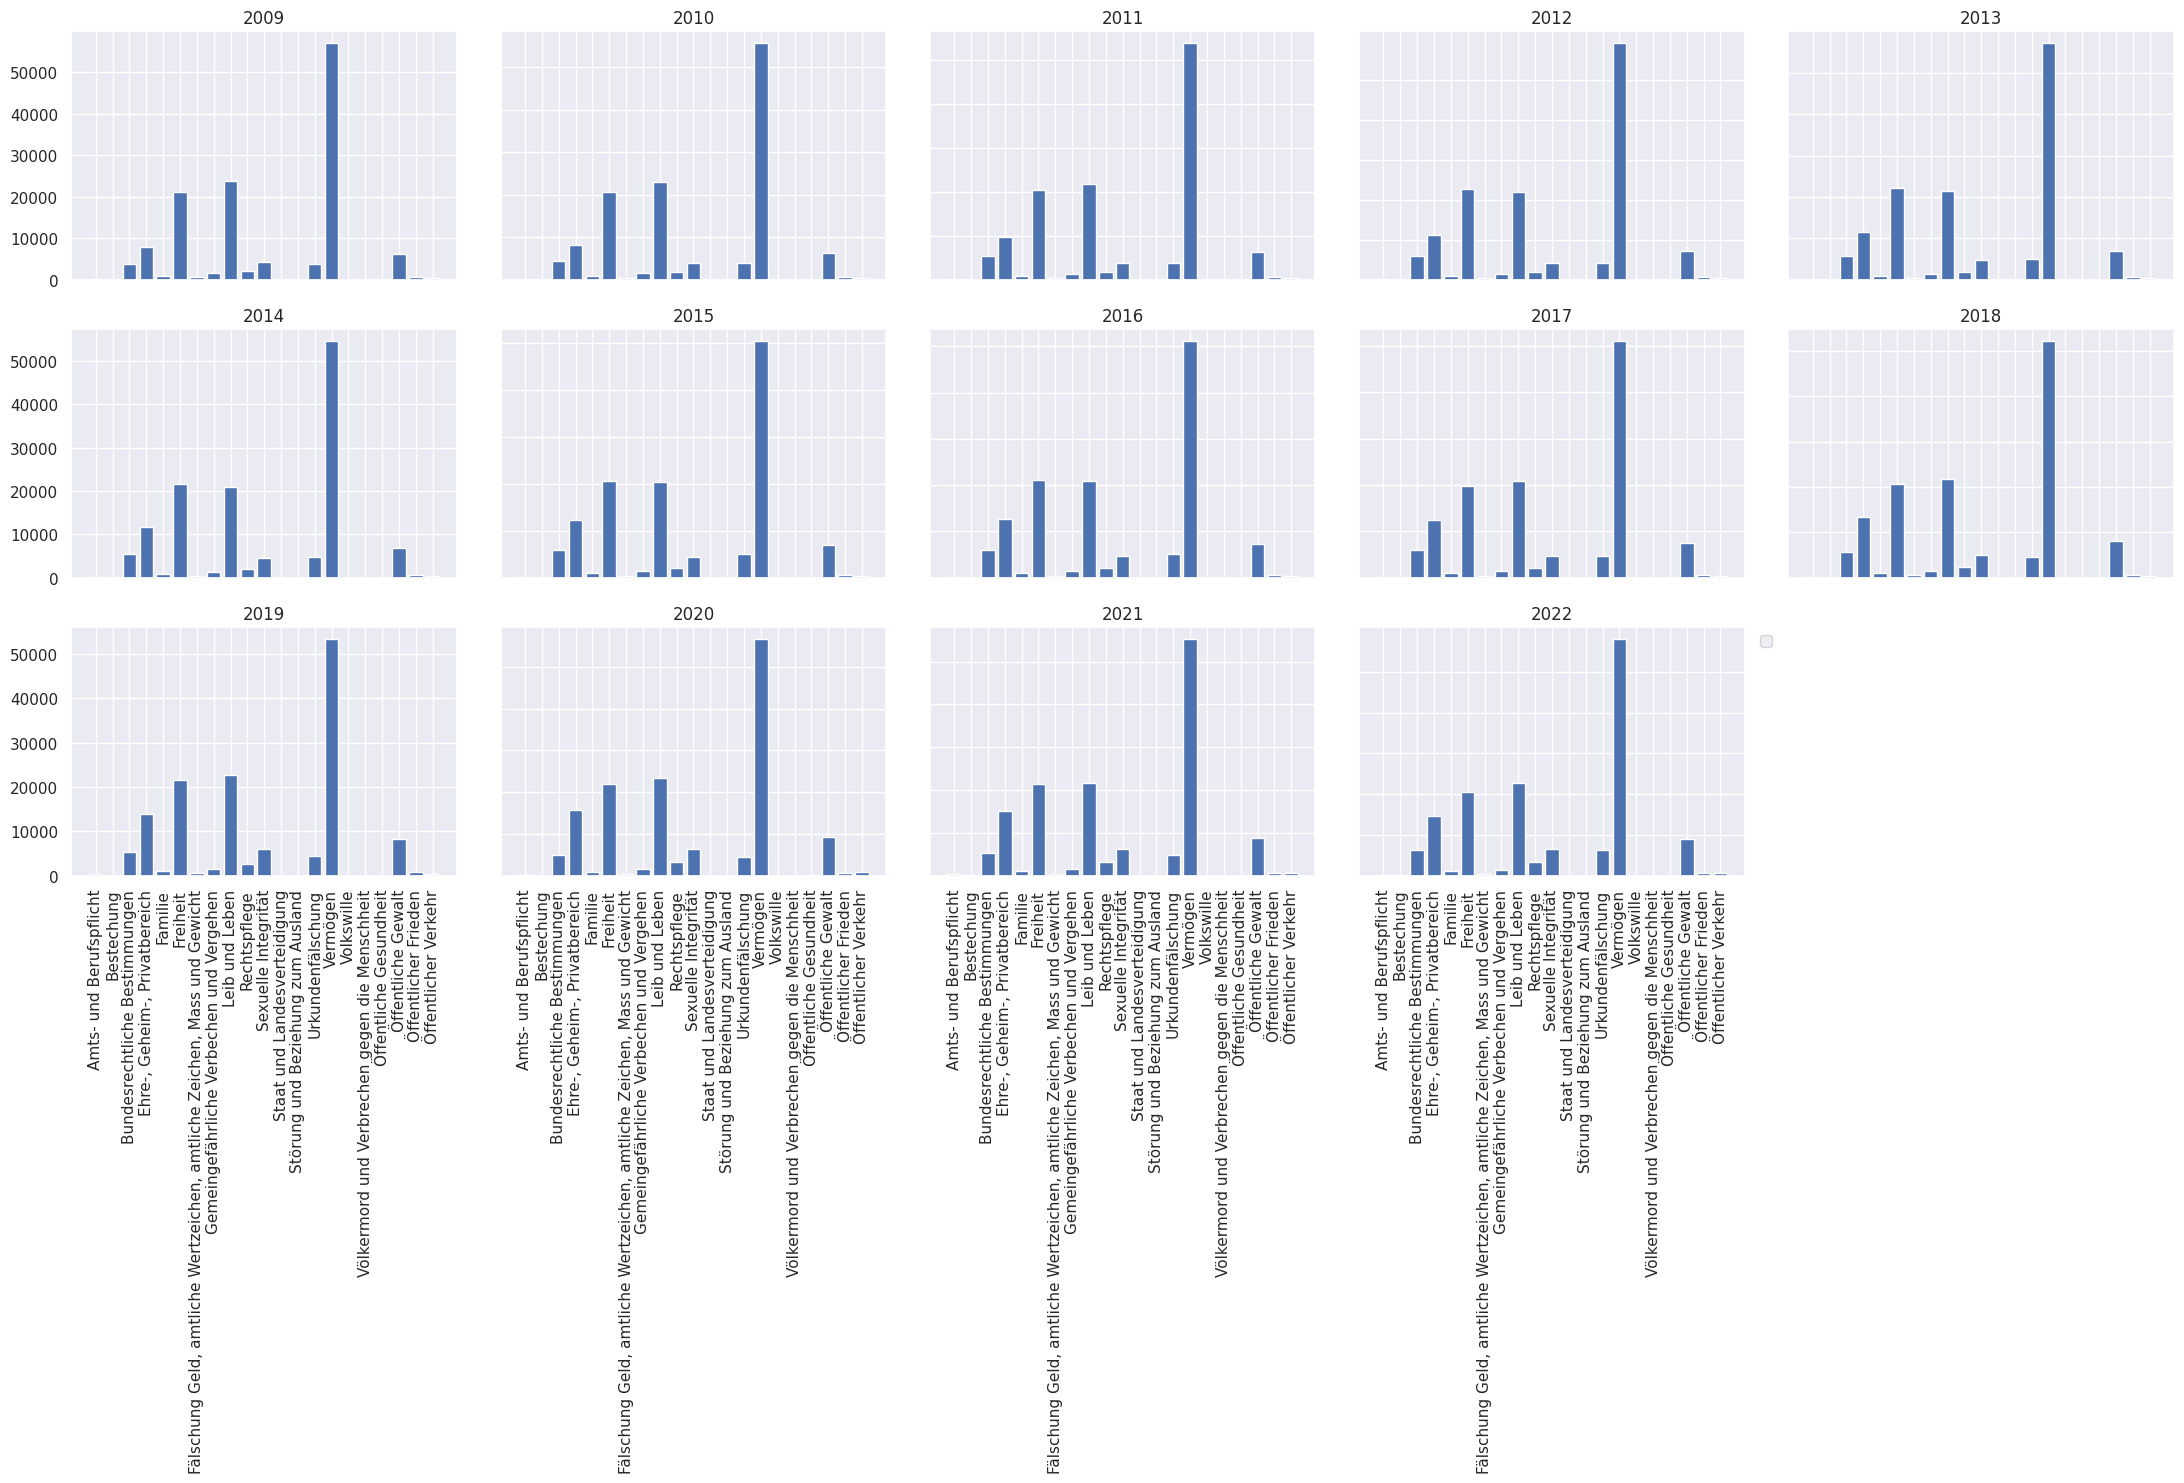

In [ ]:
#Subplots mit Total Beschuldigten Personen pro Kategorie von 2009 - 2022
fig, axs = plt.subplots(3, 5, figsize=(22, 15))  # 3 Zeilen, 5 Spalten
x = Eindeutige_Kategorien
years = range(2009, 2023)
categories_sum_dfs = [categories_sum_2009_df, categories_sum_2010_df, categories_sum_2011_df, categories_sum_2012_df,
                      categories_sum_2013_df, categories_sum_2014_df, categories_sum_2015_df, categories_sum_2016_df,
                      categories_sum_2017_df, categories_sum_2018_df, categories_sum_2019_df, categories_sum_2020_df,
                      categories_sum_2021_df, categories_sum_2022_df]

for i, year in enumerate(years):
    row = i // 5  # Zeilenindex
    col = i % 5  # Spaltenindex

    axs[row, col].set_title(str(year))
    axs[row, col].bar(x, categories_sum_dfs[i]["Total Beschuldigte Personen"])
    axs[row, col].set_xticks(x)
    axs[row, col].set_yticks(range(0, 55000, 10000))
    axs[row, col].set_xticklabels(x, rotation=90)  # X-Achsen-Werte um 90 Grad drehen

for ax in axs.flat:
    ax.label_outer()

axs[2, 4].remove()

# Hinzufügen einer Legende zum Subplot unten rechts
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Absolut Verteilung der Total Straftaten auf Kategorien pro Jahr von 2009 bis 2022

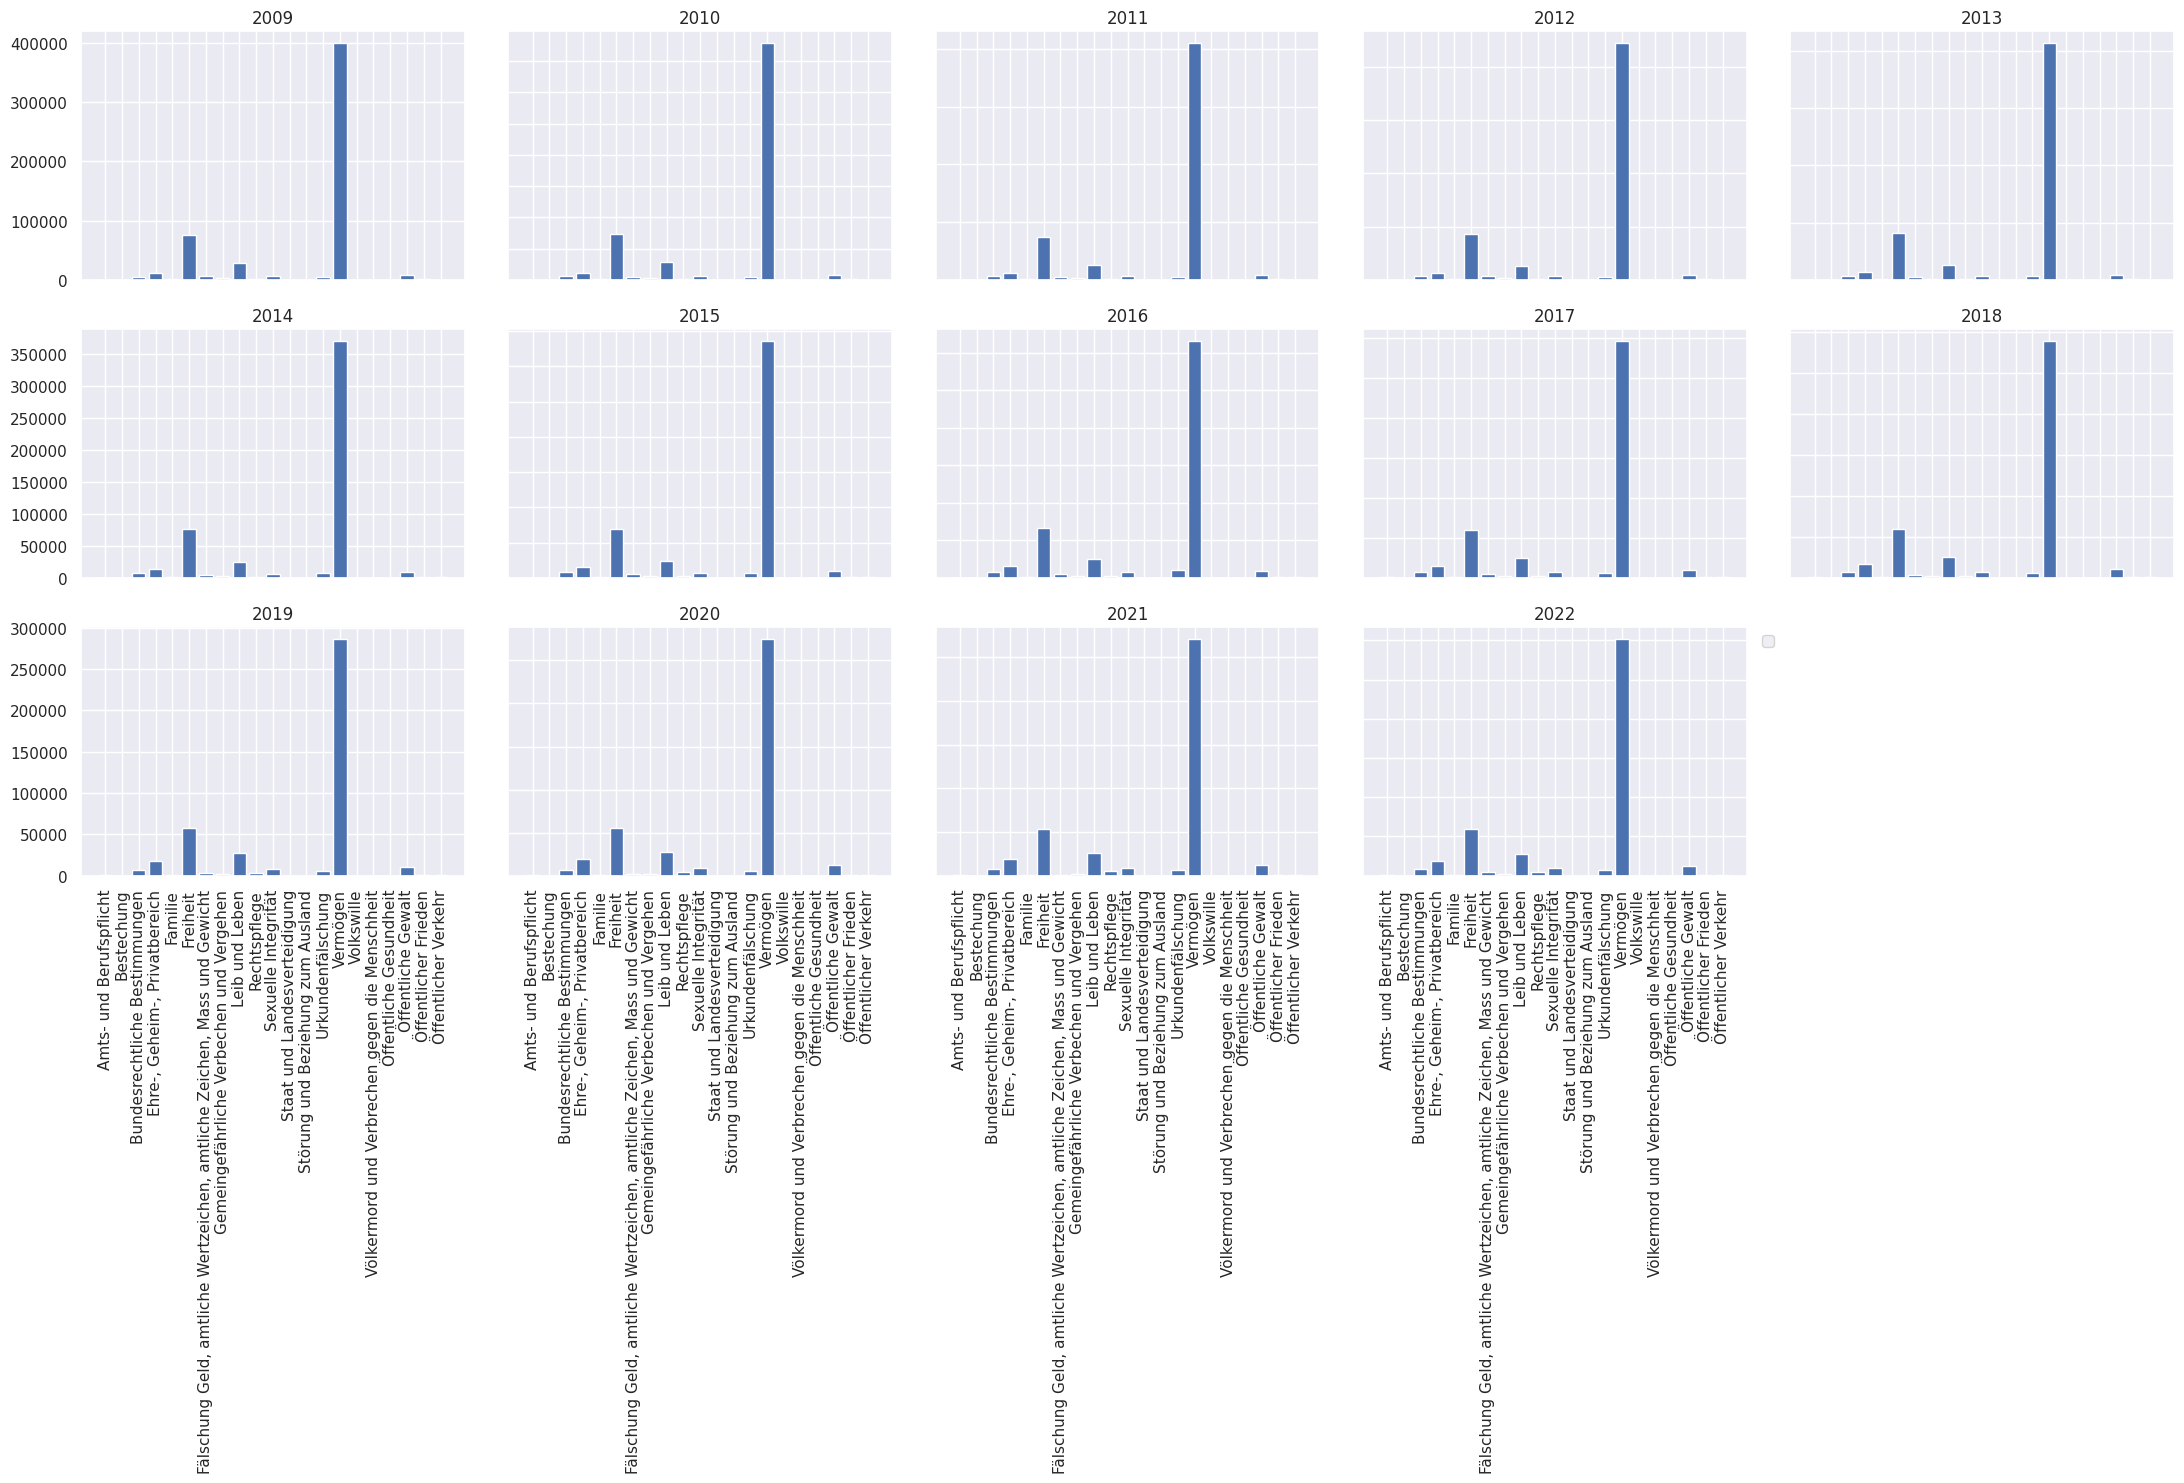

In [ ]:
#Subplots mit Total Straftaten pro Jahr von 2009 - 2022
fig, axs = plt.subplots(3, 5, figsize=(22, 15))  # 3 Zeilen, 5 Spalten
x = Eindeutige_Kategorien
years = range(2009, 2023)
categories_sum_dfs = [categories_sum_2009_df, categories_sum_2010_df, categories_sum_2011_df, categories_sum_2012_df,
                      categories_sum_2013_df, categories_sum_2014_df, categories_sum_2015_df, categories_sum_2016_df,
                      categories_sum_2017_df, categories_sum_2018_df, categories_sum_2019_df, categories_sum_2020_df,
                      categories_sum_2021_df, categories_sum_2022_df]

for i, year in enumerate(years):
    row = i // 5  # Zeilenindex
    col = i % 5  # Spaltenindex

    axs[row, col].set_title(str(year))
    axs[row, col].bar(x, categories_sum_dfs[i]["Total Straftaten"])
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(x, rotation=90)  # X-Achsen-Werte um 90 Grad drehen

for ax in axs.flat:
    ax.label_outer()

axs[2, 4].remove()

# Hinzufügen einer Legende zum Subplot unten rechts
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Absolut Entwicklung pro Kategorie auf Basis der Total Beschuldigten Personen von 2009 bis 2022a

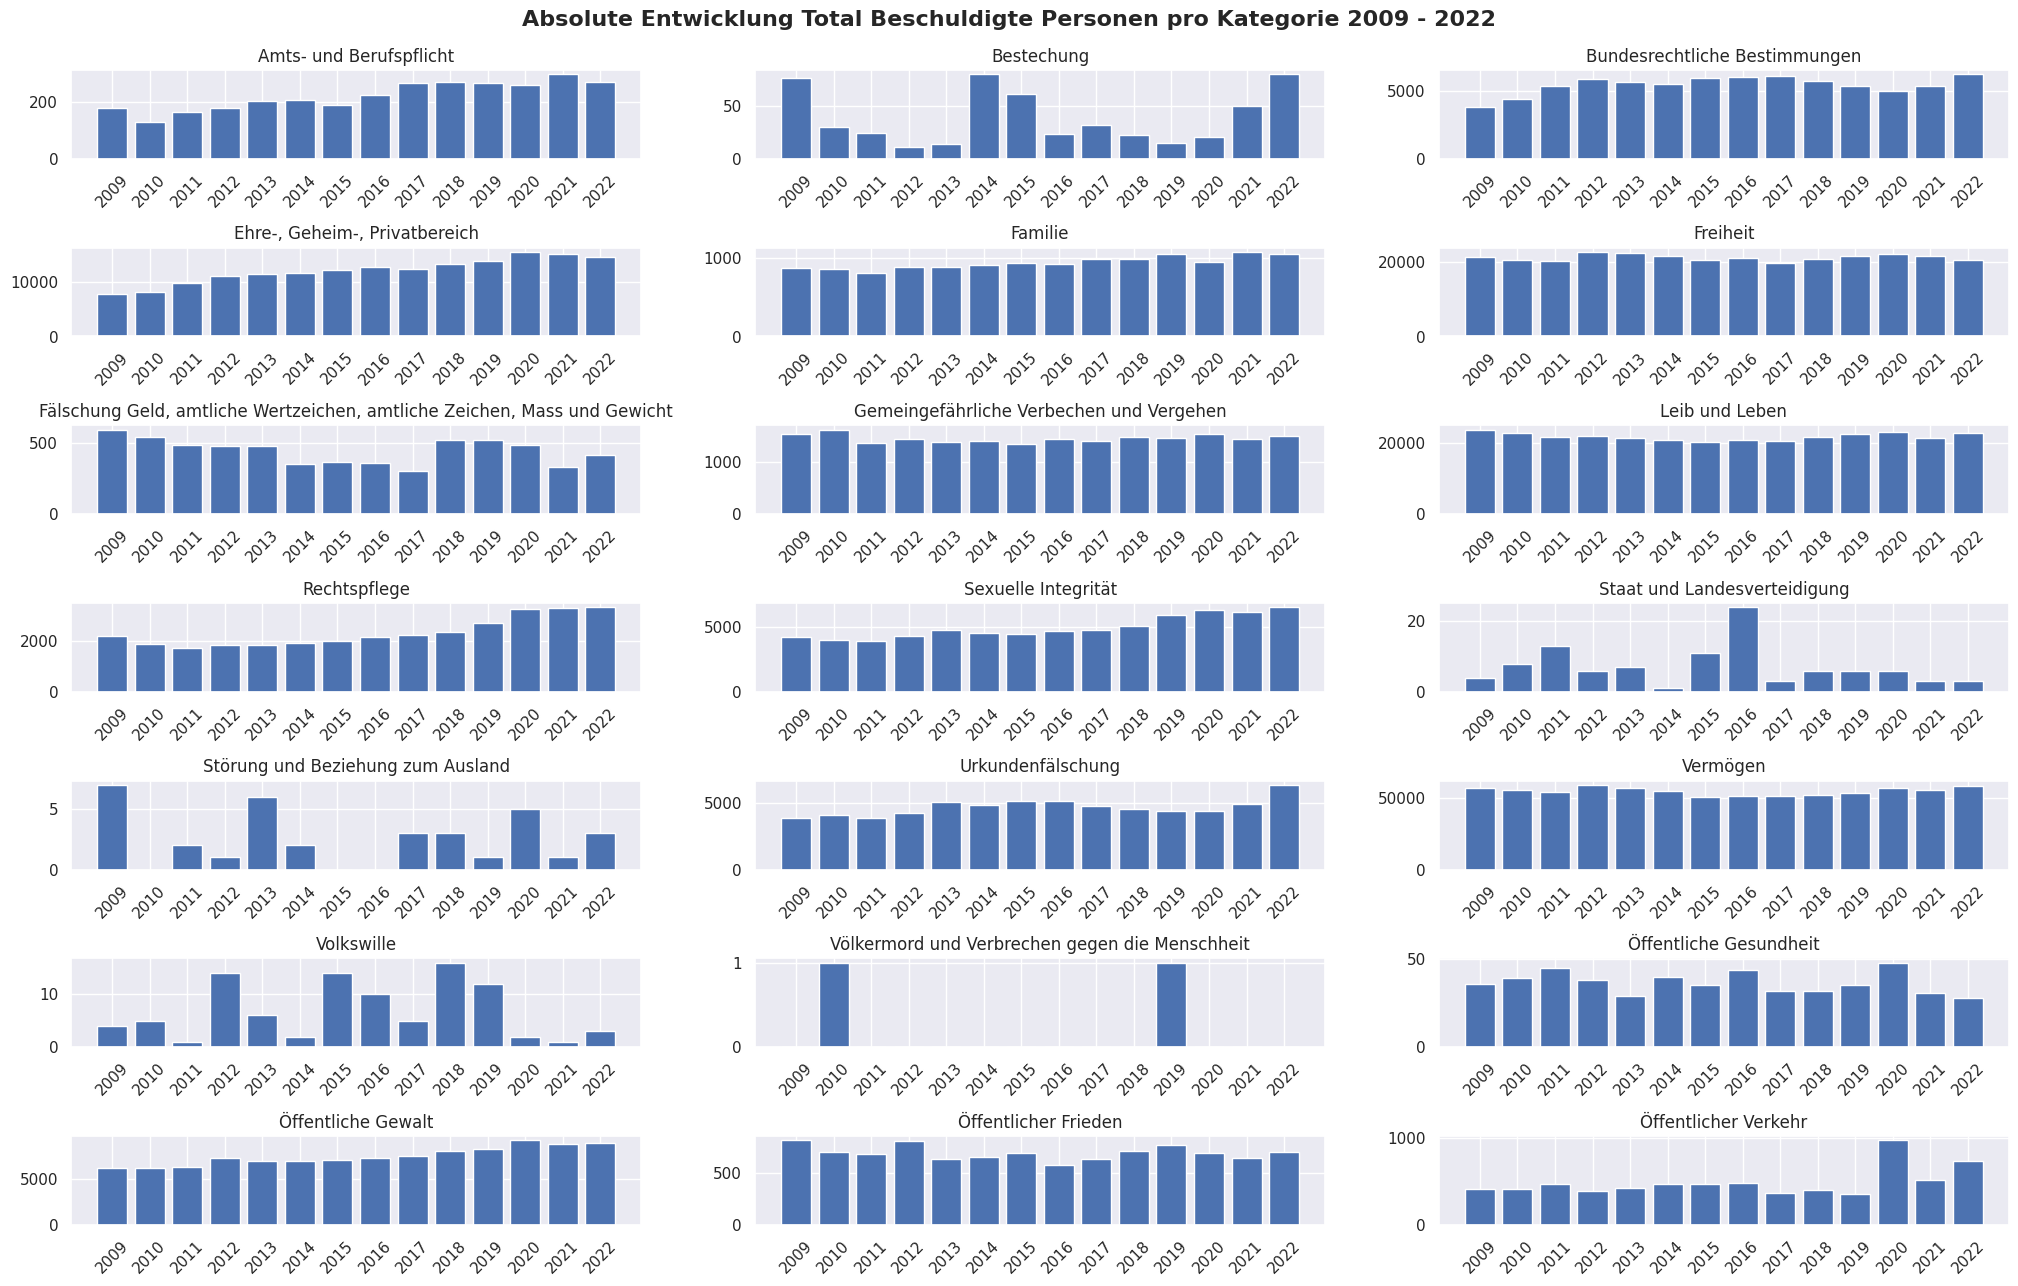

In [ ]:
fig, axs = plt.subplots(7, 3, figsize=(25, 15))  # 7 Zeilen, 3 Spalten
plt.subplots_adjust(hspace=1)  # Erhöhter Abstand zwischen den Subplots

for i, df in enumerate(Kategorie_dfs):
    row = i // 3  # Zeilenindex
    col = i % 3  # Spaltenindex

    axs[row, col].bar(df.Jahr, df["Total Beschuldigte Personen"])
    axs[row, col].set_title(df["Kategorie"].iloc[0])
    axs[row, col].set_xlabel("")
    axs[row, col].set_xticks(df.Jahr)
    axs[row, col].tick_params(axis='x', rotation=45)

fig.suptitle("Absolute Entwicklung Total Beschuldigte Personen pro Kategorie 2009 - 2022", fontsize=16, fontweight="bold", y=0.92)

# Diagramm anzeigen
plt.show()

## Absolut Entwicklung pro Kategorie auf Basis der Total Straftaten von 2009 bis 2022

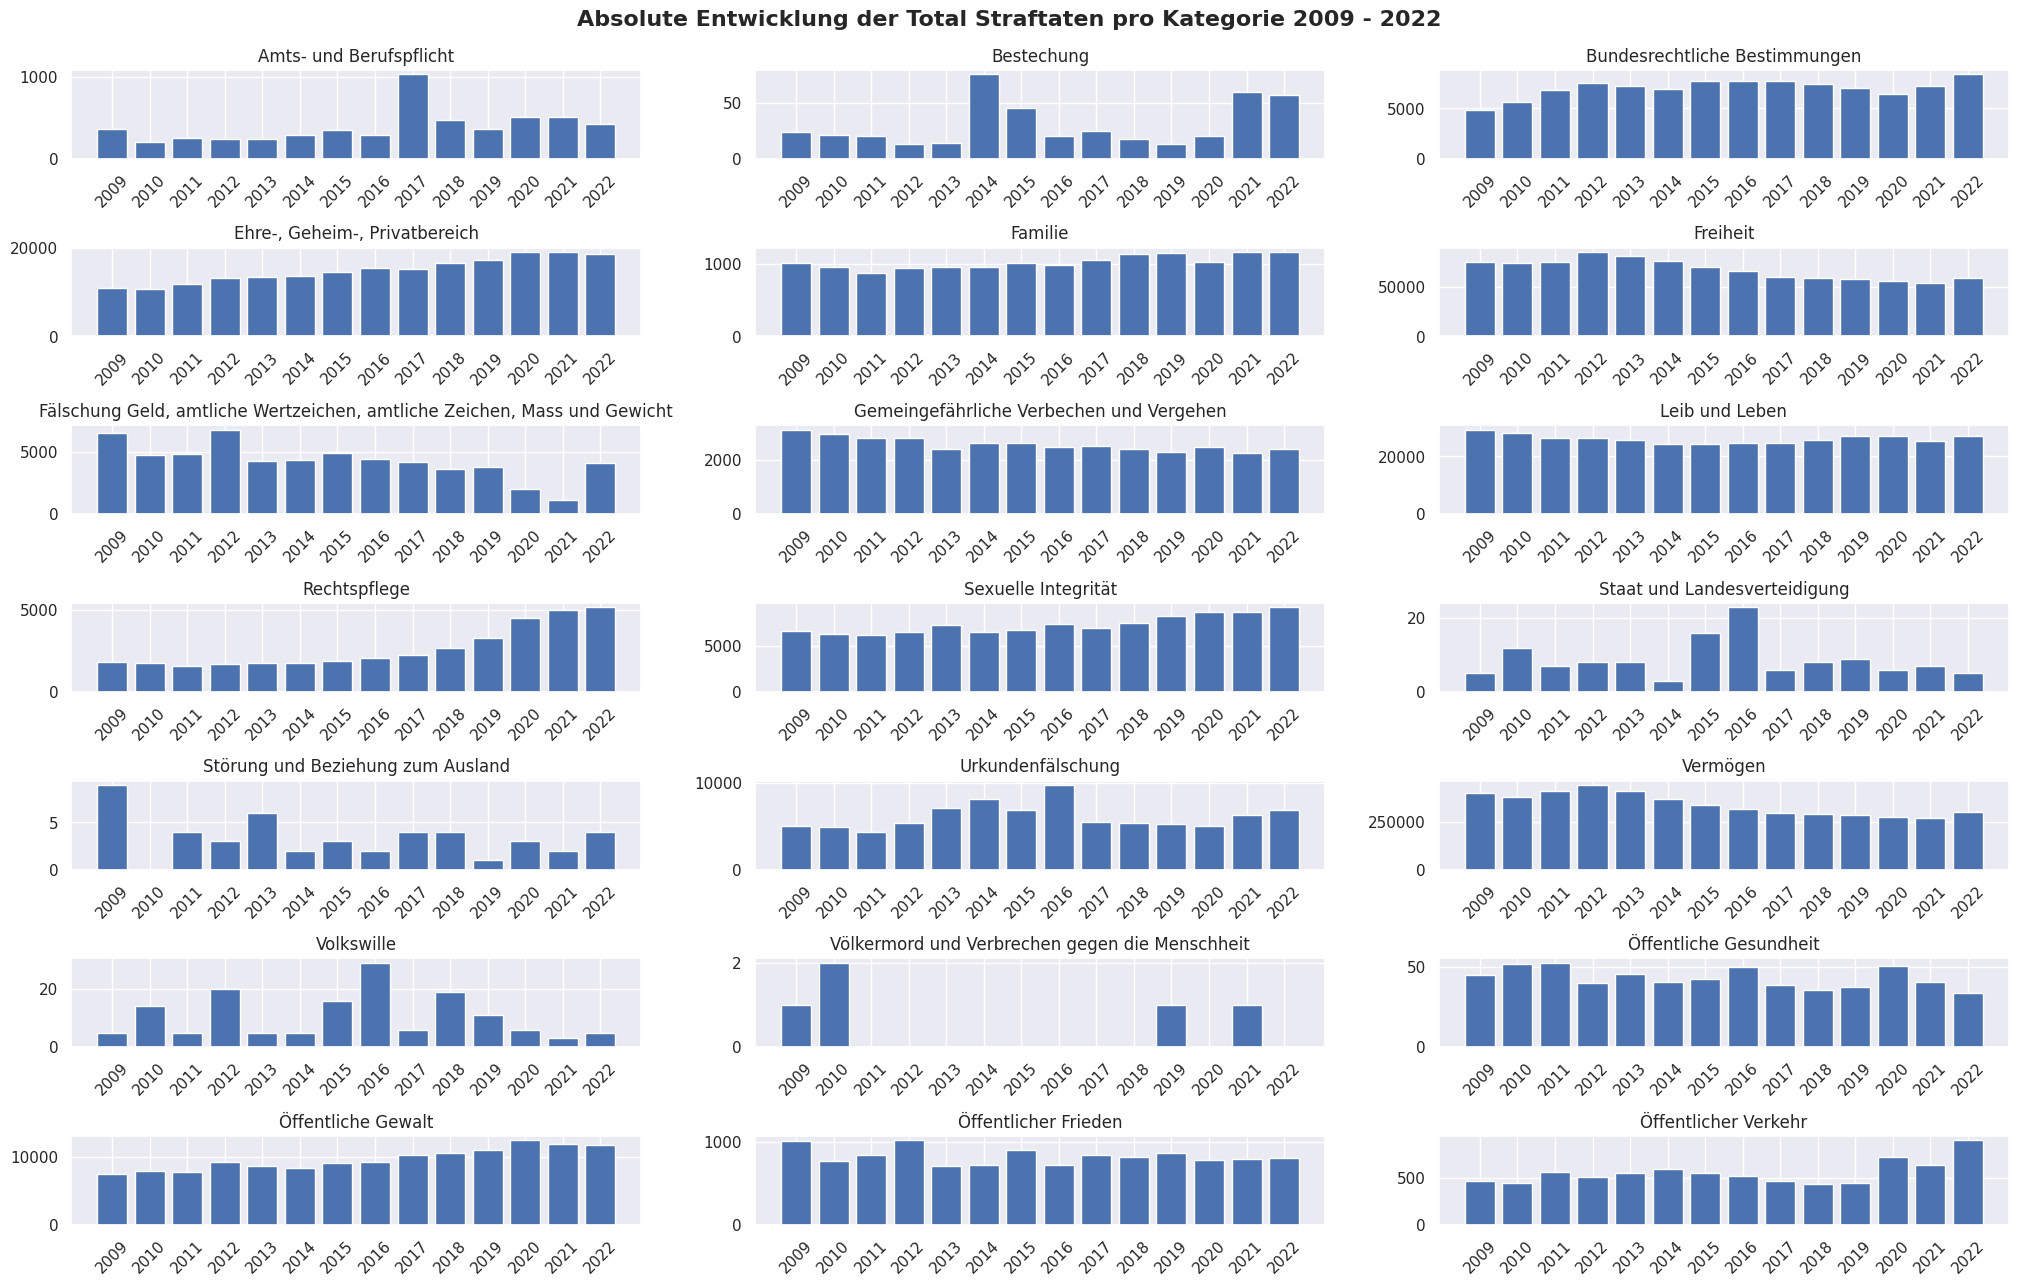

In [ ]:
# Erstellung Plot von Total Straftaten mit absoluter Entwicklung pro Kategorie 2009 - 2022
fig, axs = plt.subplots(7, 3, figsize=(25, 15))  # 7 Zeilen, 3 Spalten
plt.subplots_adjust(hspace=1)  # Erhöhter Abstand zwischen den Subplots

for i, df in enumerate(Kategorie_dfs):
    row = i // 3  # Zeilenindex
    col = i % 3  # Spaltenindex

    axs[row, col].bar(df.Jahr, df["Total Straftaten"])
    axs[row, col].set_title(df["Kategorie"].iloc[0])
    axs[row, col].set_xlabel("")
    axs[row, col].set_xticks(df.Jahr)
    axs[row, col].tick_params(axis='x', rotation=45)

fig.suptitle("Absolute Entwicklung der Total Straftaten pro Kategorie 2009 - 2022", fontsize=16, fontweight="bold", y=0.92)

# Diagramm anzeigen
plt.show()

## Untersuchung spezifisch ausgewählter Kategorien

### Ermittlung Top 5 Kategorien 2016 bis 2022


In einem weiteren Schritt werden die 5 grössten Kateogrien nach total Straftaten untersucht. Aus diesem Grund wurde untersucht, welches im Zeitraum 2009 bis 2022 die grösste Kategorien waren.

Aus der Grafik mit den Kategorien pro Jahr wird ersichtlich, dass die 5 grössten Kategorien in absteigender Reihenfolg Vermögen, Leib und Leben, Freiheit, Ehre-/Geheim-/ Privatbereich und Öffentlichte Gewalt. Da Rechtspflege eine starke Steigung aufweist und öffentlicher Verkehr einen plötzlichen Anstieg im Jahr 2019 verzeichnet werden diese auch weiter untersucht. Ausserdem wurde Fälschung Geld, amtliche Wertzeichen, amtliche Zeichen, Mass und Gewicht ebenfalls untersucht, da es einen plötzlichen Einbruch im 2020 hatte.

In [ ]:
#Top 5 Kategorien pro Jahr 2016 - 2022

#2022
sorted_df = df_2022.groupby("Kategorie").sum(numeric_only=True).sort_values(by="Total Straftaten", ascending=False)
sorted_df.name = None

top_categories = sorted_df.head(5)

print("Die fünf Top-Kategorien vom Jahr 2022 sind:", top_categories.iloc[:, 2])
print()

#2021

sorted_df = df_2021.groupby("Kategorie").sum(numeric_only=True).sort_values(by="Total Straftaten", ascending=False)

top_categories = sorted_df.head(5)

print("Die fünf Top-Kategorien vom Jahr 2021 sind:", top_categories.iloc[:, 2])
print()

#2020

sorted_df = df_2020.groupby("Kategorie").sum(numeric_only=True).sort_values(by="Total Straftaten", ascending=False)

top_categories = sorted_df.head(5)

print("Die fünf Top-Kategorien vom Jahr 2020 sind:", top_categories.iloc[:, 2])
print()

#2019

sorted_df = df_2019.groupby("Kategorie").sum(numeric_only=True).sort_values(by="Total Straftaten", ascending=False)

top_categories = sorted_df.head(5)

print("Die fünf Top-Kategorien vom Jahr 2019 sind:", top_categories.iloc[:, 2])
print()

#2018

sorted_df = df_2018.groupby("Kategorie").sum(numeric_only=True).sort_values(by="Total Straftaten", ascending=False)

top_categories = sorted_df.head(5)

print("Die fünf Top-Kategorien vom Jahr 2018 sind:", top_categories.iloc[:, 2])
print()

#2017

sorted_df = df_2017.groupby("Kategorie").sum(numeric_only=True).sort_values(by="Total Straftaten", ascending=False)

top_categories = sorted_df.head(5)

print("Die fünf Top-Kategorien vom Jahr 2017 sind:", top_categories.iloc[:, 2])
print()

#2016

sorted_df = df_2016.groupby("Kategorie").sum(numeric_only=True).sort_values(by="Total Straftaten", ascending=False)

top_categories = sorted_df.head(5)

print("Die fünf Top-Kategorien vom Jahr 2016 sind:", top_categories.iloc[:, 2])
print()

print("Die 5 grössten Kategorien in den Jahren 2017 bis 2022 sind immer dieselben.\n\n1. Platz Vermögen \n2. Platz Freiheit \n3. Platz Leib und Leben \n4. Platz Ehre-, Geheim-, Privatbereich \n5. Platz Öffentliche Gewalt")
print()
print("Die einzige Ausnahme im 2016 ist auf dem 5. Platz die Öffentliche Gewalt. Aus diesem Grund werden die Top 4 Kategorien von 2016 bis 2022 untersucht.")
print()
print("Aufgrund von interessanten Verläufen werden ausserdem folgende Kategorien auch untersucht: \n\nÖffentlicher Verkehr \nRechtspflege \nund Fälschung Geld, amtliche Wertzeichen, amtliche Zeichen, Mass und Gewicht")

Die fünf Top-Kategorien vom Jahr 2022 sind: Kategorie
Vermögen                         301888.0
Freiheit                          59541.0
Leib und Leben                    27228.0
Ehre-, Geheim-, Privatbereich     18616.0
Öffentliche Gewalt                11773.0
Name: Total Straftaten, dtype: float64

Die fünf Top-Kategorien vom Jahr 2021 sind: Kategorie
Vermögen                         270818.0
Freiheit                          53881.0
Leib und Leben                    25502.0
Ehre-, Geheim-, Privatbereich     19093.0
Öffentliche Gewalt                12003.0
Name: Total Straftaten, dtype: float64

Die fünf Top-Kategorien vom Jahr 2020 sind: Kategorie
Vermögen                         274953.0
Freiheit                          55580.0
Leib und Leben                    27140.0
Ehre-, Geheim-, Privatbereich     19159.0
Öffentliche Gewalt                12482.0
Name: Total Straftaten, dtype: float64

Die fünf Top-Kategorien vom Jahr 2019 sind: Kategorie
Vermögen                         2

### Entwicklung Kategorie Vermögen auf Basis Totale Straftaten von 2016 bis 2022

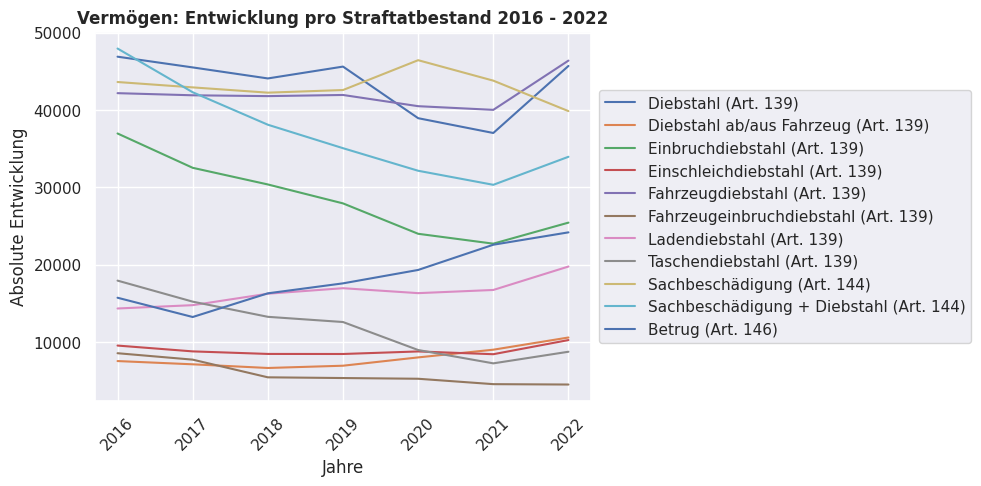

In [ ]:
#Vermögen
gewuenschte_kategorie = "Vermögen"
Verm_2016 = df_2016.loc[(df_2016["Kategorie"] == gewuenschte_kategorie) & (df_2016["Total Straftaten"] >= 5000)]
Verm_2017 = df_2017.loc[(df_2017["Kategorie"] == gewuenschte_kategorie) & (df_2017["Total Straftaten"] >= 5000)]
Verm_2018 = df_2018.loc[(df_2018["Kategorie"] == gewuenschte_kategorie) & (df_2018["Total Straftaten"] >= 5000)]
Verm_2019 = df_2019.loc[(df_2019["Kategorie"] == gewuenschte_kategorie) & (df_2019["Total Straftaten"] >= 5000)]
Verm_2020 = df_2020.loc[(df_2020["Kategorie"] == gewuenschte_kategorie) & (df_2020["Total Straftaten"] >= 5000)]
Verm_2021 = df_2021.loc[(df_2021["Kategorie"] == gewuenschte_kategorie) & (df_2021["Total Straftaten"] >= 4500)]
Verm_2022 = df_2022.loc[(df_2022["Kategorie"] == gewuenschte_kategorie) & (df_2022["Total Straftaten"] >= 4500)]

Verm_2016_2022 = pd.concat([Verm_2016, Verm_2017, Verm_2018, Verm_2019, Verm_2020, Verm_2021, Verm_2022]).reset_index(drop=True)

Verm_unique = Verm_2017["Straftatbestand"].unique()
filtered_df = Verm_2016_2022[Verm_2016_2022["Straftatbestand"].isin(Verm_unique)]

# Erstellung der Linienplots für jede Kategorie
for category in Verm_unique:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Vermögen: Entwicklung pro Straftatbestand 2016 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()


### Entwicklung Kategorie Freiheit auf Basis Totale Straftaten von 2016 bis 2022

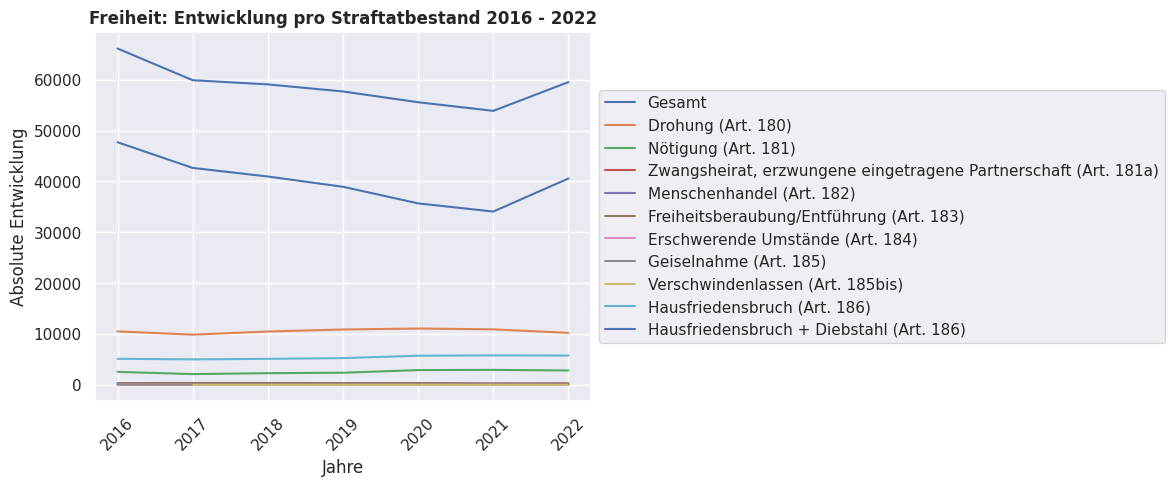

In [ ]:
#Freiheit
gewuenschte_kategorie = "Freiheit"
Frh_2016 = df_2016.loc[(df_2016["Kategorie"] == gewuenschte_kategorie)]
Frh_2017 = df_2017.loc[(df_2017["Kategorie"] == gewuenschte_kategorie)]
Frh_2018 = df_2018.loc[(df_2018["Kategorie"] == gewuenschte_kategorie)]
Frh_2019 = df_2019.loc[(df_2019["Kategorie"] == gewuenschte_kategorie)]
Frh_2020 = df_2020.loc[(df_2020["Kategorie"] == gewuenschte_kategorie)]
Frh_2021 = df_2021.loc[(df_2021["Kategorie"] == gewuenschte_kategorie)]
Frh_2022 = df_2022.loc[(df_2022["Kategorie"] == gewuenschte_kategorie)]

Frh_2016_2022 = pd.concat([Frh_2016, Frh_2017, Frh_2018, Frh_2019, Frh_2020, Frh_2021, Frh_2022]).reset_index(drop=True)

# Berechnen des Gesamtwerts für die gewählte Kategorie
total_df = Frh_2016_2022.groupby("Jahr")["Total Straftaten"].sum().reset_index()

# Plot der Linie für das Gesamt
plt.plot(total_df["Jahr"], total_df["Total Straftaten"], label="Gesamt")

#Identifikation der einzelnen Straftatbestände
Frh_unique = Frh_2017["Straftatbestand"].unique()
filtered_df = Frh_2016_2022[Frh_2016_2022["Straftatbestand"].isin(Frh_unique)]

# Erstellung der Linienplots für jede Kategorie
for category in Frh_unique:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Freiheit: Entwicklung pro Straftatbestand 2016 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()


### Entwicklung Kategorie Leib und Leben auf Basis Totale Straftaten von 2016 bis 2022

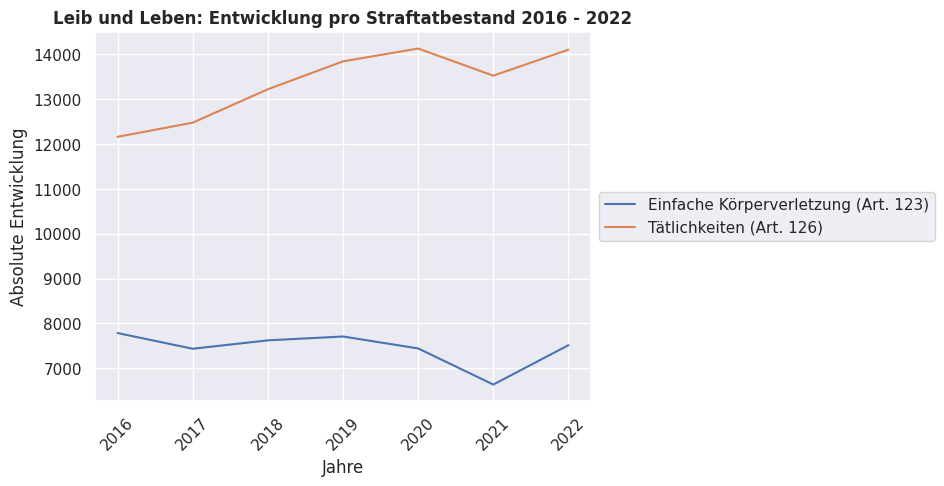

In [ ]:
#Leib und Leben
gewuenschte_kategorie = "Leib und Leben"
LuL_2016 = df_2016.loc[(df_2016["Kategorie"] == gewuenschte_kategorie)  & (df_2016["Total Straftaten"] >= 5000)]
LuL_2017 = df_2017.loc[(df_2017["Kategorie"] == gewuenschte_kategorie)  & (df_2016["Total Straftaten"] >= 5000)]
LuL_2018 = df_2018.loc[(df_2018["Kategorie"] == gewuenschte_kategorie) & (df_2016["Total Straftaten"] >= 5000)]
LuL_2019 = df_2019.loc[(df_2019["Kategorie"] == gewuenschte_kategorie) & (df_2016["Total Straftaten"] >= 5000)]
LuL_2020 = df_2020.loc[(df_2020["Kategorie"] == gewuenschte_kategorie) & (df_2016["Total Straftaten"] >= 5000)]
LuL_2021 = df_2021.loc[(df_2021["Kategorie"] == gewuenschte_kategorie) & (df_2016["Total Straftaten"] >= 5000)]
LuL_2022 = df_2022.loc[(df_2022["Kategorie"] == gewuenschte_kategorie) & (df_2016["Total Straftaten"] >= 5000)]

LuL_2016_2022 = pd.concat([LuL_2016, LuL_2017, LuL_2018, LuL_2019, LuL_2020, LuL_2021, LuL_2022]).reset_index(drop=True)

# Berechnen des Gesamtwerts für die gewählte Kategorie
#total_df = LuL_2016_2022.groupby("Jahr")["Total Straftaten"].sum().reset_index()

# Plot der Linie für das Gesamt
#plt.plot(total_df["Jahr"], total_df["Total Straftaten"], label="Gesamt")

#Identifikation der einzelnen Straftatbestände
LuL_unique = LuL_2017["Straftatbestand"].unique()
filtered_df = LuL_2016_2022[LuL_2016_2022["Straftatbestand"].isin(LuL_unique)]

# Erstellung der Linienplots für jede Kategorie
for category in LuL_unique:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Leib und Leben: Entwicklung pro Straftatbestand 2016 - 2022", fontweight="bold",)
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()


### Entwicklung Kategorie Ehre-, Geheim-, Privatbereich auf Basis Totale Straftaten von 2016 bis 2022

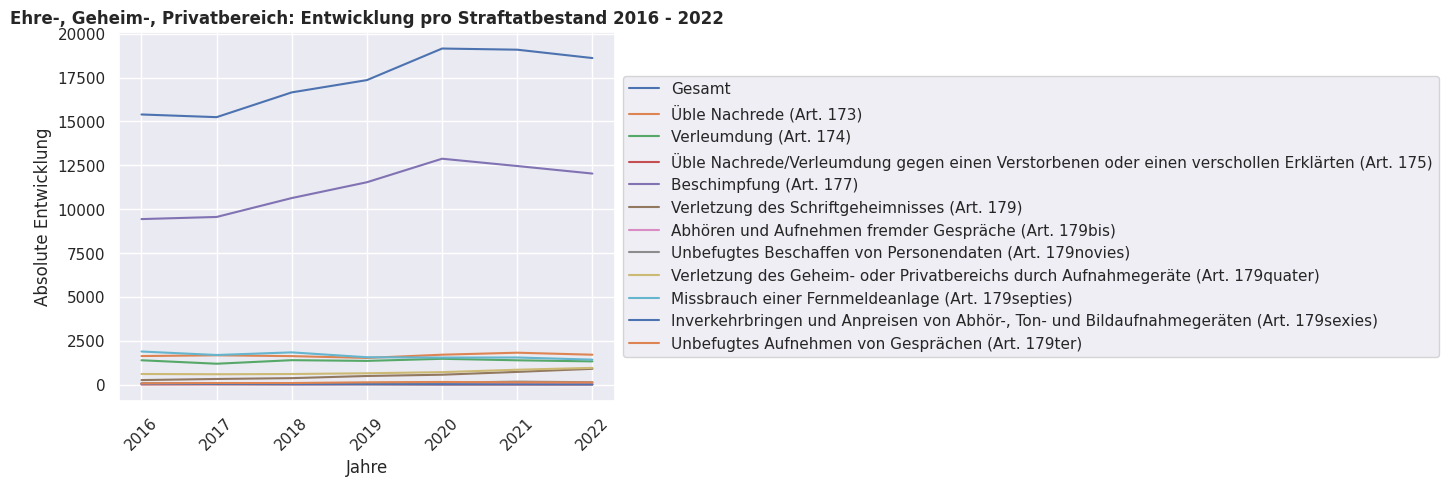

In [ ]:
#Ehre-, Geheim-, Privatbereich 2016 - 2022

gewuenschte_kategorie = "Ehre-, Geheim-, Privatbereich"
EGP_2016= df_2016.loc[df_2016["Kategorie"] == gewuenschte_kategorie]
EGP_2017= df_2017.loc[df_2017["Kategorie"] == gewuenschte_kategorie]
EGP_2018= df_2018.loc[df_2018["Kategorie"] == gewuenschte_kategorie]
EGP_2019 = df_2019.loc[df_2019["Kategorie"] == gewuenschte_kategorie]
EGP_2020 = df_2020.loc[df_2020["Kategorie"] == gewuenschte_kategorie]
EGP_2021 = df_2021.loc[df_2021["Kategorie"] == gewuenschte_kategorie]
EGP_2022 = df_2022.loc[df_2022["Kategorie"] == gewuenschte_kategorie]

EGP_2016_2022 = pd.concat([EGP_2016, EGP_2017, EGP_2018, EGP_2019, EGP_2020, EGP_2021, EGP_2022]).reset_index(drop=True)

# Berechnen des Gesamtwerts für die gewählte Kategorie
total_df = EGP_2016_2022.groupby("Jahr")["Total Straftaten"].sum().reset_index()

# Plot der Linie für das Gesamt
plt.plot(total_df["Jahr"], total_df["Total Straftaten"], label="Gesamt")

#Identifikation der einzelnen Straftatbestände
EGP_unique = EGP_2017["Straftatbestand"].unique()
filtered_df = EGP_2016_2022[EGP_2016_2022["Straftatbestand"].isin(EGP_unique)]

# Erstellung der Linienplots für jede Kategorie
for category in EGP_unique:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Ehre-, Geheim-, Privatbereich: Entwicklung pro Straftatbestand 2016 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()

### Entwicklung Kategorie Öffentlicher Verkehr auf Basis Totale Straftaten von 2016 bis 2022

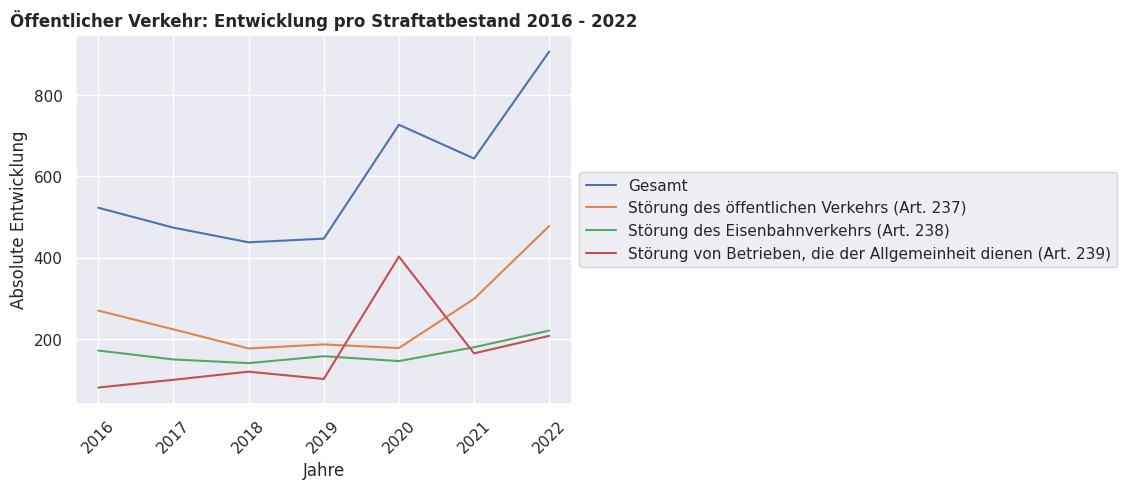

In [ ]:
#Öffentlicher Verkehr 2016 - 2022

gewuenschte_kategorie = "Öffentlicher Verkehr"
OeV_2016= df_2016.loc[df_2016["Kategorie"] == gewuenschte_kategorie]
OeV_2017= df_2017.loc[df_2017["Kategorie"] == gewuenschte_kategorie]
OeV_2018= df_2018.loc[df_2018["Kategorie"] == gewuenschte_kategorie]
OeV_2019 = df_2019.loc[df_2019["Kategorie"] == gewuenschte_kategorie]
OeV_2020 = df_2020.loc[df_2020["Kategorie"] == gewuenschte_kategorie]
OeV_2021 = df_2021.loc[df_2021["Kategorie"] == gewuenschte_kategorie]
OeV_2022 = df_2022.loc[df_2022["Kategorie"] == gewuenschte_kategorie]

OeV_2016_2019 = pd.concat([OeV_2016, OeV_2017, OeV_2018, OeV_2019, OeV_2020, OeV_2021, OeV_2022]).reset_index(drop=True)

# Berechnen des Gesamtwerts für die gewählte Kategorie
total_df = OeV_2016_2019.groupby("Jahr")["Total Straftaten"].sum().reset_index()

# Plot der Linie für das Gesamt
plt.plot(total_df["Jahr"], total_df["Total Straftaten"], label="Gesamt")

categories = ["Störung des öffentlichen Verkehrs (Art. 237)", "Störung des Eisenbahnverkehrs (Art. 238)", "Störung von Betrieben, die der Allgemeinheit dienen (Art. 239)"]
filtered_df = OeV_2016_2019[OeV_2016_2019["Straftatbestand"].isin(categories)]

# Erstellung der Linienplots für jede Kategorie
for category in categories:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Öffentlicher Verkehr: Entwicklung pro Straftatbestand 2016 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()

### Entwicklung Kategorie Rechtspflege auf Basis Totale Straftaten von 2016 bis 2022

['Falsche Anschuldigung (Art. 303)'
 'Irreführung der Rechtspflege (Art. 304)' 'Begünstigung (Art. 305)'
 'Geldwäscherei (Art. 305bis)'
 'Mangelnde Sorgfalt bei Finanzgeschäften und Melderecht (Art. 305ter)'
 'Falsche Beweisaussage der Partei (Art. 306)'
 'Falsches Zeugnis/Gutachten/falsche Übersetzung (Art. 307)'
 'Befreiung von Gefangenen (Art. 310)'
 'Meuterei von Gefangenen (Art. 311)']


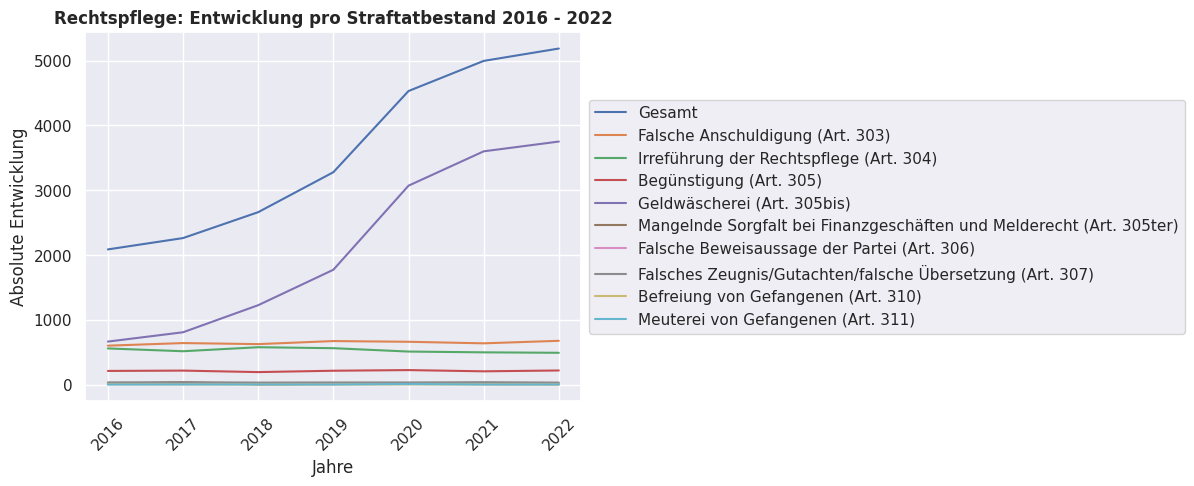

In [ ]:
# Rechtspflege 2016 - 2022

gewuenschte_kategorie = "Rechtspflege"
Rpf_2016= df_2016.loc[df_2016["Kategorie"] == gewuenschte_kategorie]
Rpf_2017= df_2017.loc[df_2017["Kategorie"] == gewuenschte_kategorie]
Rpf_2018= df_2018.loc[df_2018["Kategorie"] == gewuenschte_kategorie]
Rpf_2019 = df_2019.loc[df_2019["Kategorie"] == gewuenschte_kategorie]
Rpf_2020 = df_2020.loc[df_2020["Kategorie"] == gewuenschte_kategorie]
Rpf_2021 = df_2021.loc[df_2021["Kategorie"] == gewuenschte_kategorie]
Rpf_2022 = df_2022.loc[df_2022["Kategorie"] == gewuenschte_kategorie]

Rpf_2016_2019 = pd.concat([Rpf_2016, Rpf_2017, Rpf_2018, Rpf_2019, Rpf_2020, Rpf_2021, Rpf_2022]).reset_index(drop=True)

#print(OeV_2015_2019)

# Berechnen des Gesamtwerts für die gewählte Kategorie
total_df = Rpf_2016_2019.groupby("Jahr")["Total Straftaten"].sum().reset_index()

# Plot der Linie für das Gesamt
plt.plot(total_df["Jahr"], total_df["Total Straftaten"], label="Gesamt")

Rpf_uniqe = Rpf_2017["Straftatbestand"].unique()
print(Rpf_uniqe)
filtered_df = Rpf_2016_2019[Rpf_2016_2019["Straftatbestand"].isin(Rpf_uniqe)]

# Erstellung der Linienplots für jede Kategorie
for category in Rpf_uniqe:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Rechtspflege: Entwicklung pro Straftatbestand 2016 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()

### Entwicklung Kategorie Fälschung Geld, amtliche Wertzeichen, amtliche Zeichen, Mass und Gewicht auf Basis Totale Straftaten von 2016 bis 2022

['Geldfälschung (Art. 240)' 'Geldverfälschung (Art. 241)'
 'In Umlaufsetzen falschen Geldes (Art. 242)'
 'Nachmachen von Banknoten, Münzen oder amtlichen Wertzeichen ohne Fälschungsabsicht (Art. 243)'
 'Einführen, Erwerben, Lagern falschen Geldes (Art. 244)'
 'Fälschung amtlicher Wertzeichen (Art. 245)'
 'Fälschung amtlicher Zeichen (Art. 246)'
 'Fälschungsgeräte und unrechtmässiger Gebrauch von Geräten (Art. 247)'
 'Fälschung von Mass und Gewicht (Art. 248)']


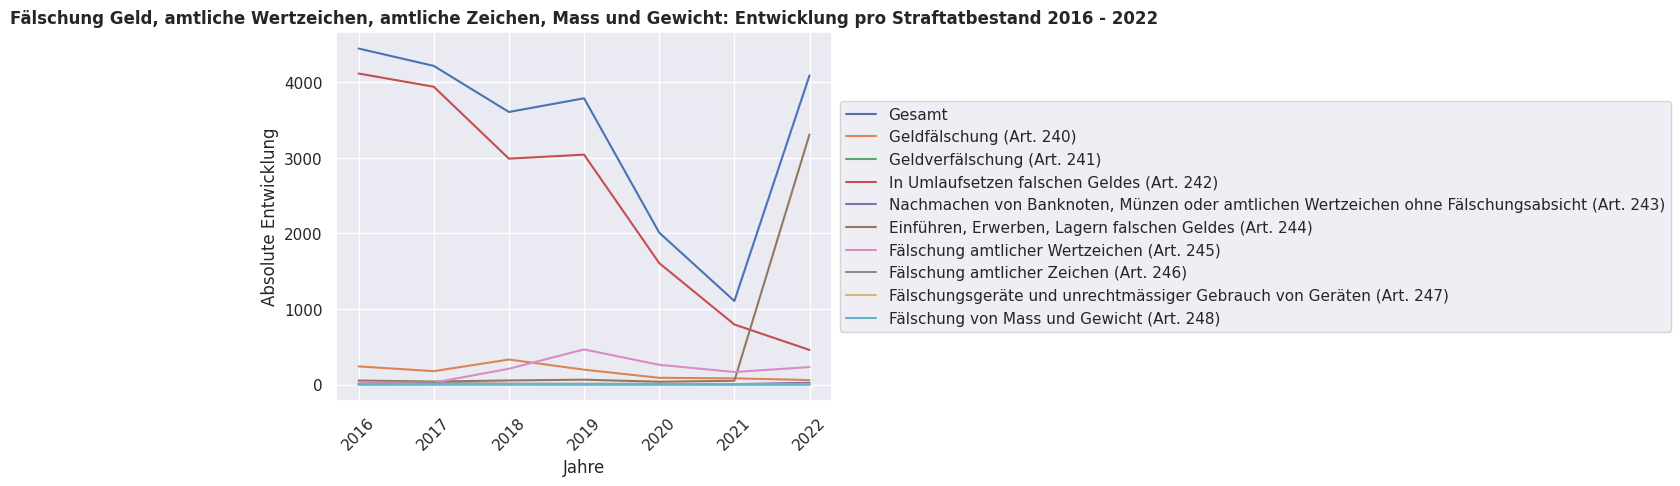

In [ ]:
# Fälschung Geld, amtliche Wertzeichen, amtliche Zeichen, Mass und Gewicht 2016 - 2022

gewuenschte_kategorie = "Fälschung Geld, amtliche Wertzeichen, amtliche Zeichen, Mass und Gewicht"
Fael_2016= df_2016.loc[df_2016["Kategorie"] == gewuenschte_kategorie]
Fael_2017= df_2017.loc[df_2017["Kategorie"] == gewuenschte_kategorie]
Fael_2018= df_2018.loc[df_2018["Kategorie"] == gewuenschte_kategorie]
Fael_2019 = df_2019.loc[df_2019["Kategorie"] == gewuenschte_kategorie]
Fael_2020 = df_2020.loc[df_2020["Kategorie"] == gewuenschte_kategorie]
Fael_2021 = df_2021.loc[df_2021["Kategorie"] == gewuenschte_kategorie]
Fael_2022 = df_2022.loc[df_2022["Kategorie"] == gewuenschte_kategorie]

Fael_2016_2019 = pd.concat([Fael_2016, Fael_2017, Fael_2018, Fael_2019, Fael_2020, Fael_2021, Fael_2022]).reset_index(drop=True)

#print(OeV_2015_2019)

# Berechnen des Gesamtwerts für die gewählte Kategorie
total_df = Fael_2016_2019.groupby("Jahr")["Total Straftaten"].sum().reset_index()

# Plot der Linie für das Gesamt
plt.plot(total_df["Jahr"], total_df["Total Straftaten"], label="Gesamt")

Fael_uniqe = Fael_2017["Straftatbestand"].unique()
print(Fael_uniqe)
filtered_df = Fael_2016_2019[Fael_2016_2019["Straftatbestand"].isin(Fael_uniqe)]

# Erstellung der Linienplots für jede Kategorie
for category in Fael_uniqe:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Fälschung Geld, amtliche Wertzeichen, amtliche Zeichen, Mass und Gewicht: Entwicklung pro Straftatbestand 2016 - 2022", fontweight="bold")
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()

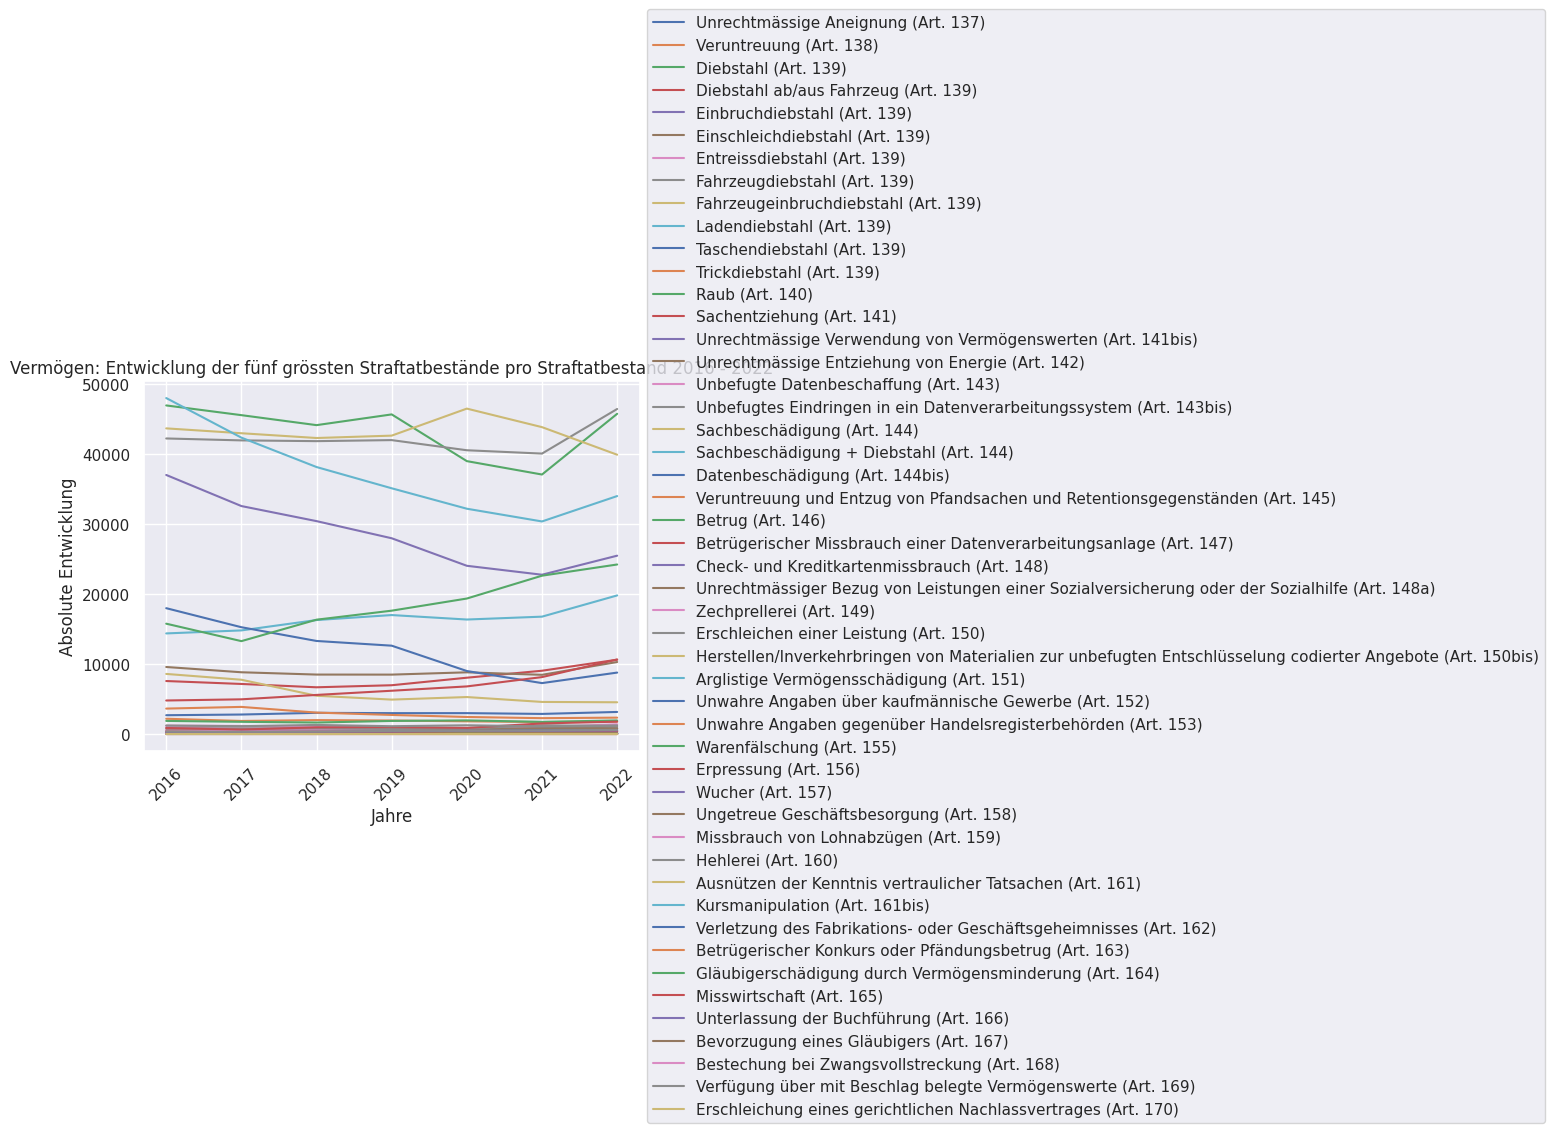

In [ ]:
# Vermögen 2016 - 2022

gewuenschte_kategorie = "Vermögen"
Verm_2016= df_2016.loc[df_2016["Kategorie"] == gewuenschte_kategorie]
Verm_2017= df_2017.loc[df_2017["Kategorie"] == gewuenschte_kategorie]
Verm_2018= df_2018.loc[df_2018["Kategorie"] == gewuenschte_kategorie]
Verm_2019 = df_2019.loc[df_2019["Kategorie"] == gewuenschte_kategorie]
Verm_2020 = df_2020.loc[df_2020["Kategorie"] == gewuenschte_kategorie]
Verm_2021 = df_2021.loc[df_2021["Kategorie"] == gewuenschte_kategorie]
Verm_2022 = df_2022.loc[df_2022["Kategorie"] == gewuenschte_kategorie]

Verm_2016_2022 = pd.concat([Verm_2016, Verm_2017, Verm_2018, Verm_2019, Verm_2020, Verm_2021, Verm_2022]).reset_index(drop=True)

Verm_uniqe = Verm_2017["Straftatbestand"].unique()
filtered_df = Verm_2016_2022[Verm_2016_2022["Straftatbestand"].isin(Verm_uniqe)]

# Erstellung der Linienplots für jede Kategorie
for category in Verm_uniqe:
    category_df = filtered_df[filtered_df["Straftatbestand"] == category]
    plt.plot(category_df["Jahr"], category_df["Total Straftaten"], label=category)

# Setzen des Titels, der Beschriftungen und der Legende
plt.title("Vermögen: Entwicklung der fünf grössten Straftatbestände pro Straftatbestand 2016 - 2022")
plt.xlabel("Jahre")
plt.xticks(range(2016, 2023), rotation=45)
plt.ylabel("Absolute Entwicklung")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anzeigen des Plots
plt.show()

# Analyse Altersgruppen

Info/Anmerkung: Die ungleiche Spanne der Alterskategorien erschwert die Interpretation und Vergleichbarkeit der Altersgruppen, bzw. muss bei der Betrachtung und Interpretation im Hinterkopf behalten werden.

## In Altersgruppen unterteilen

In [ ]:
# ein zentrales altersgruppen df erstellen
df_jahr_sammlung = {"2009": df_2009, "2010": df_2010, "2011": df_2011, "2012": df_2012, "2013": df_2013, "2014": df_2014, "2015": df_2015, "2016": df_2016, "2017": df_2017, "2018": df_2018, "2019": df_2019, "2020": df_2020, "2021": df_2021, "2022": df_2022}
df_agegroup = pd.DataFrame(columns=['Jahr', 'Altersgruppe', 'Total'])
jahre = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
altersgruppen = ['<10 Jahre', '10 - 14 Jahre', '15 - 17 Jahre', '18 - 19 Jahre', '20 - 24 Jahre', '25 - 29 Jahre', '30 - 34 Jahre', '35 - 39 Jahre', '40 - 49 Jahre', '50 - 59 Jahre', '60 - 69 Jahre', '70 Jahre und +', 'ohne Angabe']

for jahr in jahre:
    for altersgruppe in altersgruppen:
        index = len(df_agegroup)
        df_jahr = df_jahr_sammlung[jahr]
        total = pd.to_numeric(df_jahr[altersgruppe], errors='coerce').sum()
        df_agegroup.at[index, 'Jahr'] = jahr
        df_agegroup.at[index, 'Altersgruppe'] = altersgruppe
        df_agegroup.at[index, 'Total'] = total

In [ ]:
print(df_agegroup)

     Jahr    Altersgruppe    Total
0    2009       <10 Jahre    178.0
1    2009   10 - 14 Jahre   8905.0
2    2009   15 - 17 Jahre  16522.0
3    2009   18 - 19 Jahre  10044.0
4    2009   20 - 24 Jahre  19732.0
..    ...             ...      ...
177  2022   40 - 49 Jahre  25973.0
178  2022   50 - 59 Jahre  16259.0
179  2022   60 - 69 Jahre   7050.0
180  2022  70 Jahre und +   3246.0
181  2022     ohne Angabe    110.0

[182 rows x 3 columns]


In [ ]:
unique_agegroups = df_agegroup['Altersgruppe'].unique()
print("Es wird in 13 Altersgruppen unterschieden. Diese sind:")
for agegroup in unique_agegroups:
    print(agegroup)

Es wird in 13 Altersgruppen unterschieden. Diese sind:
<10 Jahre
10 - 14 Jahre
15 - 17 Jahre
18 - 19 Jahre
20 - 24 Jahre
25 - 29 Jahre
30 - 34 Jahre
35 - 39 Jahre
40 - 49 Jahre
50 - 59 Jahre
60 - 69 Jahre
70 Jahre und +
ohne Angabe


## Absolute Entwicklung der beschuldigten Personen je Altersgruppe

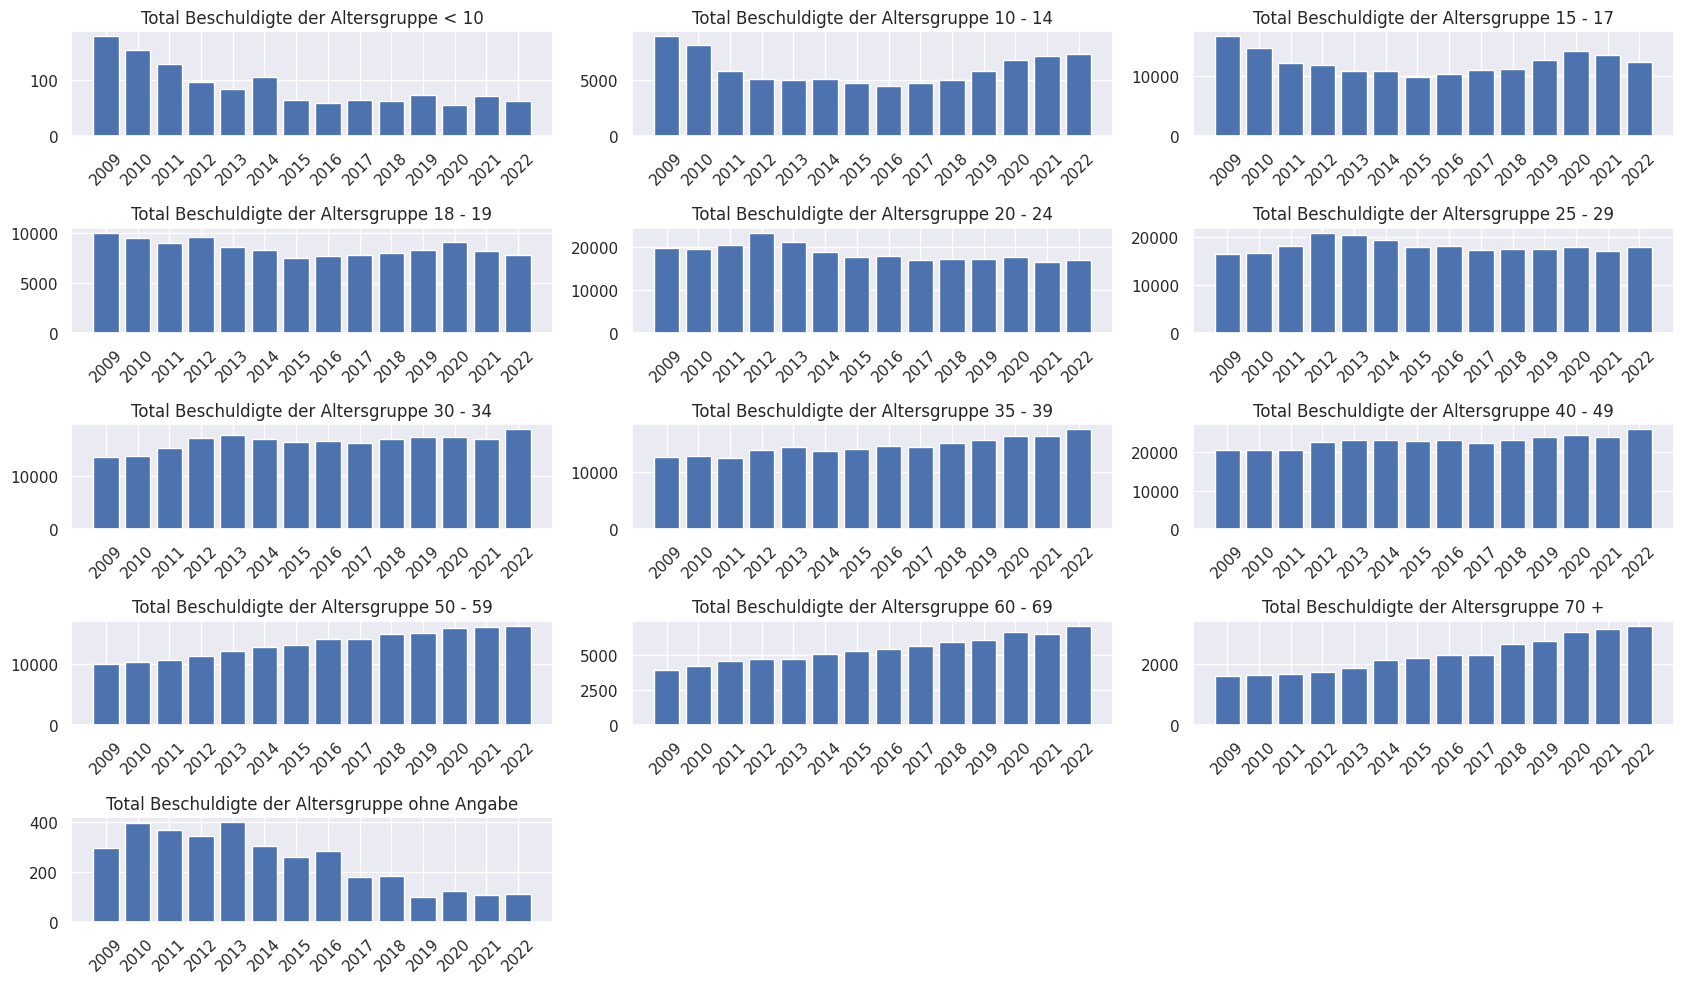

In [ ]:
import matplotlib.pyplot as plt

# Filtern nach Altersgruppe '<10 Jahre'
df_filteredu10 = df_agegroup[df_agegroup['Altersgruppe'] == '<10 Jahre']
df_filteredu10 = df_filteredu10[df_filteredu10['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '10 - 14 Jahre'
df_filtered10_14 = df_agegroup[df_agegroup['Altersgruppe'] == '10 - 14 Jahre']
df_filtered10_14 = df_filtered10_14[df_filtered10_14['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '15 - 17 Jahre'
df_filtered15_17 = df_agegroup[df_agegroup['Altersgruppe'] == '15 - 17 Jahre']
df_filtered15_17 = df_filtered15_17[df_filtered15_17['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '18 - 19 Jahre'
df_filtered18_19 = df_agegroup[df_agegroup['Altersgruppe'] == '18 - 19 Jahre']
df_filtered18_19 = df_filtered18_19[df_filtered18_19['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '20 - 24 Jahre'
df_filtered20_24 = df_agegroup[df_agegroup['Altersgruppe'] == '20 - 24 Jahre']
df_filtered20_24 = df_filtered20_24[df_filtered20_24['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '25 - 29 Jahre'
df_filtered25_29 = df_agegroup[df_agegroup['Altersgruppe'] == '25 - 29 Jahre']
df_filtered25_29 = df_filtered25_29[df_filtered25_29['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '30 - 34 Jahre'
df_filtered30_34 = df_agegroup[df_agegroup['Altersgruppe'] == '30 - 34 Jahre']
df_filtered30_34 = df_filtered30_34[df_filtered30_34['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '35 - 39 Jahre'
df_filtered35_39 = df_agegroup[df_agegroup['Altersgruppe'] == '35 - 39 Jahre']
df_filtered35_39 = df_filtered35_39[df_filtered35_39['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '40 - 49 Jahre'
df_filtered40_49 = df_agegroup[df_agegroup['Altersgruppe'] == '40 - 49 Jahre']
df_filtered40_49 = df_filtered40_49[df_filtered40_49['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '50 - 59 Jahre'
df_filtered50_59 = df_agegroup[df_agegroup['Altersgruppe'] == '50 - 59 Jahre']
df_filtered50_59 = df_filtered50_59[df_filtered50_59['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '60 - 69 Jahre'
df_filtered60_69 = df_agegroup[df_agegroup['Altersgruppe'] == '60 - 69 Jahre']
df_filtered60_69 = df_filtered60_69[df_filtered60_69['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe '70 +'
df_filtered_70 = df_agegroup[df_agegroup['Altersgruppe'] == '70 Jahre und +']
df_filtered_70 = df_filtered_70[df_filtered_70['Jahr'].isin(jahre)]
# Filtern nach Altersgruppe 'ohne Angaben'
df_filtered_age_oA = df_agegroup[df_agegroup['Altersgruppe'] == 'ohne Angabe']
df_filtered_age_oA = df_filtered_age_oA[df_filtered_age_oA['Jahr'].isin(jahre)]

# Festlegen der Größe des gesamten Diagramms
plt.figure(figsize=(17, 10))

# Erstes Diagramm (Altersgruppe '<10 Jahre')
plt.subplot(5, 3, 1)  # 1 Zeilen, 3 Spalten, erstes Diagramm
plt.bar(df_filteredu10['Jahr'], df_filteredu10['Total'])
plt.title('Total Beschuldigte der Altersgruppe < 10')
plt.xticks(rotation=45)

plt.subplot(5, 3, 2)  # 1 Zeile, 3 Spalten, zweites Diagramm
plt.bar(df_filtered10_14['Jahr'], df_filtered10_14['Total'])
plt.title('Total Beschuldigte der Altersgruppe 10 - 14')
plt.xticks(rotation=45)

plt.subplot(5, 3, 3)  # 1 Zeile, 3 Spalten, drittes Diagramm
plt.bar(df_filtered15_17['Jahr'], df_filtered15_17['Total'])
plt.title('Total Beschuldigte der Altersgruppe 15 - 17')
plt.xticks(rotation=45)

plt.subplot(5, 3, 4)
plt.bar(df_filtered18_19['Jahr'], df_filtered18_19['Total'])
plt.title('Total Beschuldigte der Altersgruppe 18 - 19')
plt.xticks(rotation=45)

plt.subplot(5, 3, 5)
plt.bar(df_filtered20_24['Jahr'], df_filtered20_24['Total'])
plt.title('Total Beschuldigte der Altersgruppe 20 - 24')
plt.xticks(rotation=45)

plt.subplot(5, 3, 6)
plt.bar(df_filtered25_29['Jahr'], df_filtered25_29['Total'])
plt.title('Total Beschuldigte der Altersgruppe 25 - 29')
plt.xticks(rotation=45)

plt.subplot(5, 3, 7)
plt.bar(df_filtered30_34['Jahr'], df_filtered30_34['Total'])
plt.title('Total Beschuldigte der Altersgruppe 30 - 34')
plt.xticks(rotation=45)

plt.subplot(5, 3, 8)
plt.bar(df_filtered35_39['Jahr'], df_filtered35_39['Total'])
plt.title('Total Beschuldigte der Altersgruppe 35 - 39')
plt.xticks(rotation=45)

plt.subplot(5, 3, 9)
plt.bar(df_filtered40_49['Jahr'], df_filtered40_49['Total'])
plt.title('Total Beschuldigte der Altersgruppe 40 - 49')
plt.xticks(rotation=45)

plt.subplot(5, 3, 10)
plt.bar(df_filtered50_59['Jahr'], df_filtered50_59['Total'])
plt.title('Total Beschuldigte der Altersgruppe 50 - 59')
plt.xticks(rotation=45)

plt.subplot(5, 3, 11)
plt.bar(df_filtered60_69['Jahr'], df_filtered60_69['Total'])
plt.title('Total Beschuldigte der Altersgruppe 60 - 69')
plt.xticks(rotation=45)

plt.subplot(5, 3, 12)
plt.bar(df_filtered_70['Jahr'], df_filtered_70['Total'])
plt.title('Total Beschuldigte der Altersgruppe 70 +')
plt.xticks(rotation=45)

plt.subplot(5, 3, 13)
plt.bar(df_filtered_age_oA['Jahr'], df_filtered_age_oA['Total'])
plt.title('Total Beschuldigte der Altersgruppe ohne Angabe')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Prozentuale Entwicklung der beschuldigten Personen je Altersgruppe

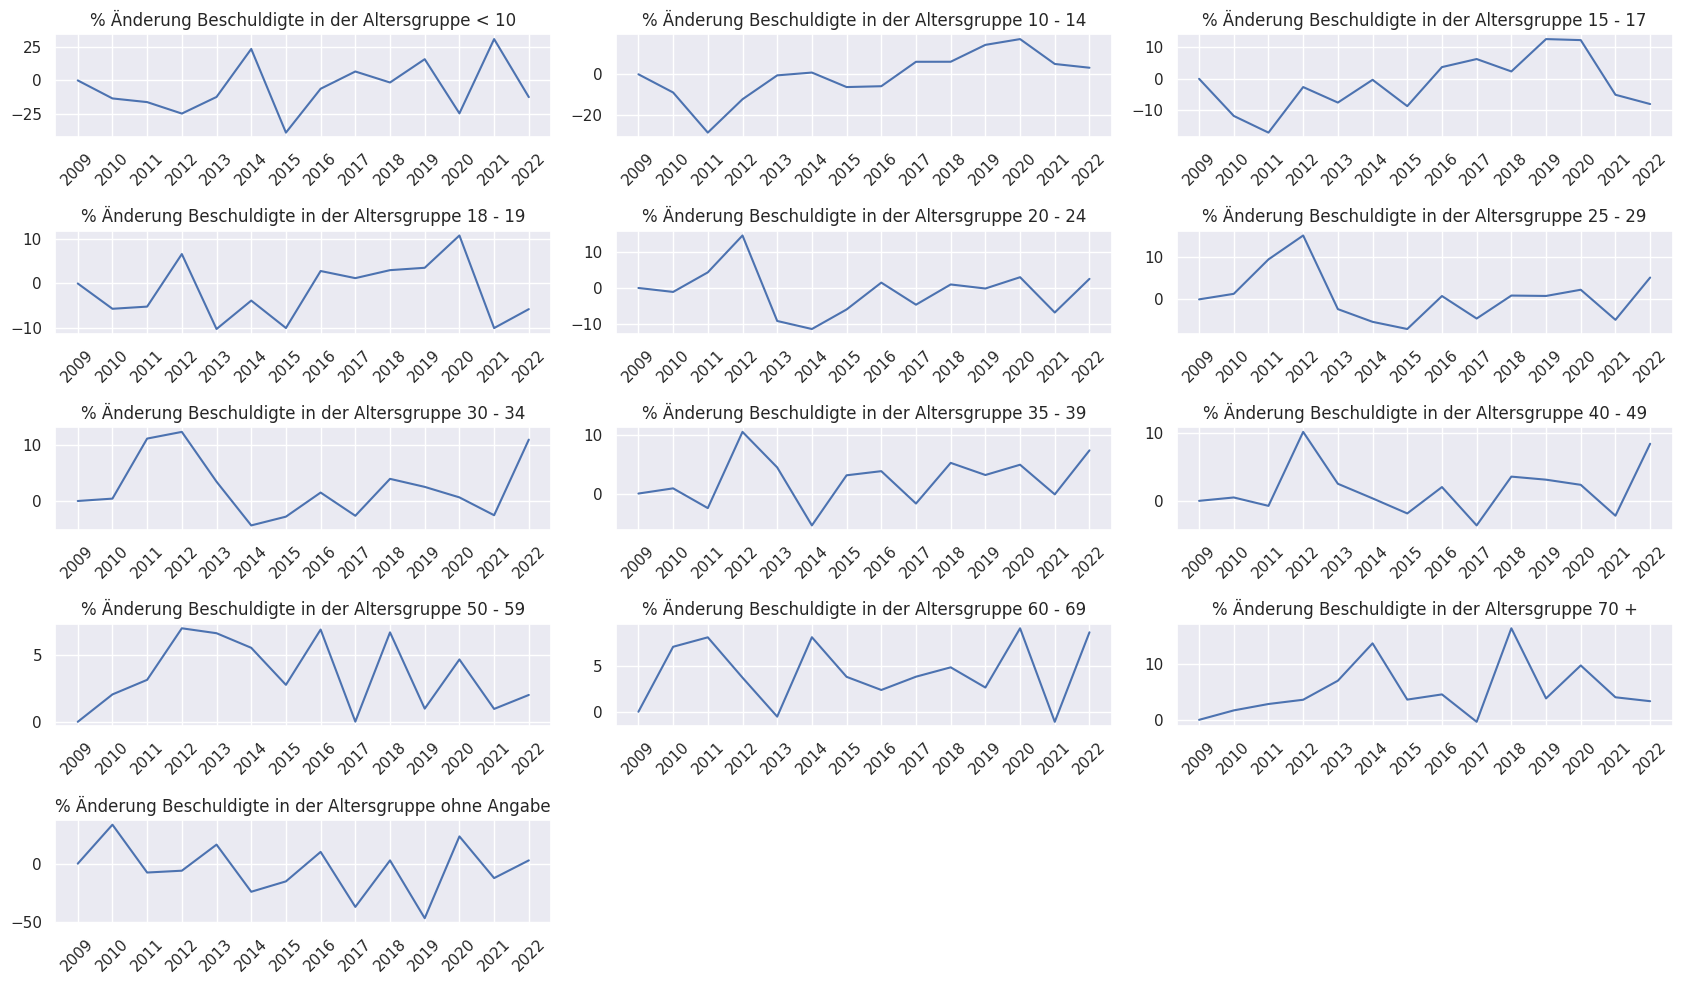

In [ ]:
# nachfolgend sollen gleich wie beim obigen part für alle altersgruppen die Diagramme von prozentualen Veränderung ausgegeben werden

# Filtern nach Altersgruppe (bsp'<10 Jahre') und Wert in 2009 auf 0 setzen, da es dort keine prozentuale Veränderung gibt
df_filteredu10['Prozentuale_Veränderung'] = df_filteredu10['Total'].pct_change() * 100
df_filteredu10.loc[df_filteredu10['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered10_14['Prozentuale_Veränderung'] = df_filtered10_14['Total'].pct_change() * 100
df_filtered10_14.loc[df_filtered10_14['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered15_17['Prozentuale_Veränderung'] = df_filtered15_17['Total'].pct_change() * 100
df_filtered15_17.loc[df_filtered15_17['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered18_19['Prozentuale_Veränderung'] = df_filtered18_19['Total'].pct_change() * 100
df_filtered18_19.loc[df_filtered18_19['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered20_24['Prozentuale_Veränderung'] = df_filtered20_24['Total'].pct_change() * 100
df_filtered20_24.loc[df_filtered20_24['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered25_29['Prozentuale_Veränderung'] = df_filtered25_29['Total'].pct_change() * 100
df_filtered25_29.loc[df_filtered25_29['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered30_34['Prozentuale_Veränderung'] = df_filtered30_34['Total'].pct_change() * 100
df_filtered30_34.loc[df_filtered30_34['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered35_39['Prozentuale_Veränderung'] = df_filtered35_39['Total'].pct_change() * 100
df_filtered35_39.loc[df_filtered35_39['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered40_49['Prozentuale_Veränderung'] = df_filtered40_49['Total'].pct_change() * 100
df_filtered40_49.loc[df_filtered40_49['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered50_59['Prozentuale_Veränderung'] = df_filtered50_59['Total'].pct_change() * 100
df_filtered50_59.loc[df_filtered50_59['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered60_69['Prozentuale_Veränderung'] = df_filtered60_69['Total'].pct_change() * 100
df_filtered60_69.loc[df_filtered60_69['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered_70['Prozentuale_Veränderung'] = df_filtered_70['Total'].pct_change() * 100
df_filtered_70.loc[df_filtered_70['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered_age_oA['Prozentuale_Veränderung'] = df_filtered_age_oA['Total'].pct_change() * 100
df_filtered_age_oA.loc[df_filtered_age_oA['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

# Festlegen der Größe des gesamten Diagramms
plt.figure(figsize=(17, 10))

# Erstes Diagramm (Altersgruppe '<10 Jahre')
plt.subplot(5, 3, 1)  # 13 Zeilen, 3 Spalten, erstes Diagramm
plt.plot(df_filteredu10['Jahr'], df_filteredu10['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe < 10')
plt.xticks(rotation=45)

plt.subplot(5, 3, 2)  # 1 Zeile, 3 Spalten, zweites Diagramm
plt.plot(df_filtered10_14['Jahr'], df_filtered10_14['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 10 - 14')
plt.xticks(rotation=45)

plt.subplot(5, 3, 3)
plt.plot(df_filtered15_17['Jahr'], df_filtered15_17['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 15 - 17')
plt.xticks(rotation=45)

plt.subplot(5, 3, 4)
plt.plot(df_filtered18_19['Jahr'], df_filtered18_19['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 18 - 19')
plt.xticks(rotation=45)

plt.subplot(5, 3, 5)
plt.plot(df_filtered20_24['Jahr'], df_filtered20_24['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 20 - 24')
plt.xticks(rotation=45)

plt.subplot(5, 3, 6)
plt.plot(df_filtered25_29['Jahr'], df_filtered25_29['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 25 - 29')
plt.xticks(rotation=45)

plt.subplot(5, 3, 7)
plt.plot(df_filtered30_34['Jahr'], df_filtered30_34['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 30 - 34')
plt.xticks(rotation=45)

plt.subplot(5, 3, 8)
plt.plot(df_filtered35_39['Jahr'], df_filtered35_39['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 35 - 39')
plt.xticks(rotation=45)

plt.subplot(5, 3, 9)
plt.plot(df_filtered40_49['Jahr'], df_filtered40_49['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 40 - 49')
plt.xticks(rotation=45)

plt.subplot(5, 3, 10)
plt.plot(df_filtered50_59['Jahr'], df_filtered50_59['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 50 - 59')
plt.xticks(rotation=45)

plt.subplot(5, 3, 11)
plt.plot(df_filtered60_69['Jahr'], df_filtered60_69['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 60 - 69')
plt.xticks(rotation=45)

plt.subplot(5, 3, 12)
plt.plot(df_filtered_70['Jahr'], df_filtered_70['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 70 +')
plt.xticks(rotation=45)

plt.subplot(5, 3, 13)
plt.plot(df_filtered_age_oA['Jahr'], df_filtered_age_oA['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe ohne Angabe')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

gleicher code block wie darüber - hier aber mit einheitlicher Y-Achse (ausser bei Alter oA und <10)


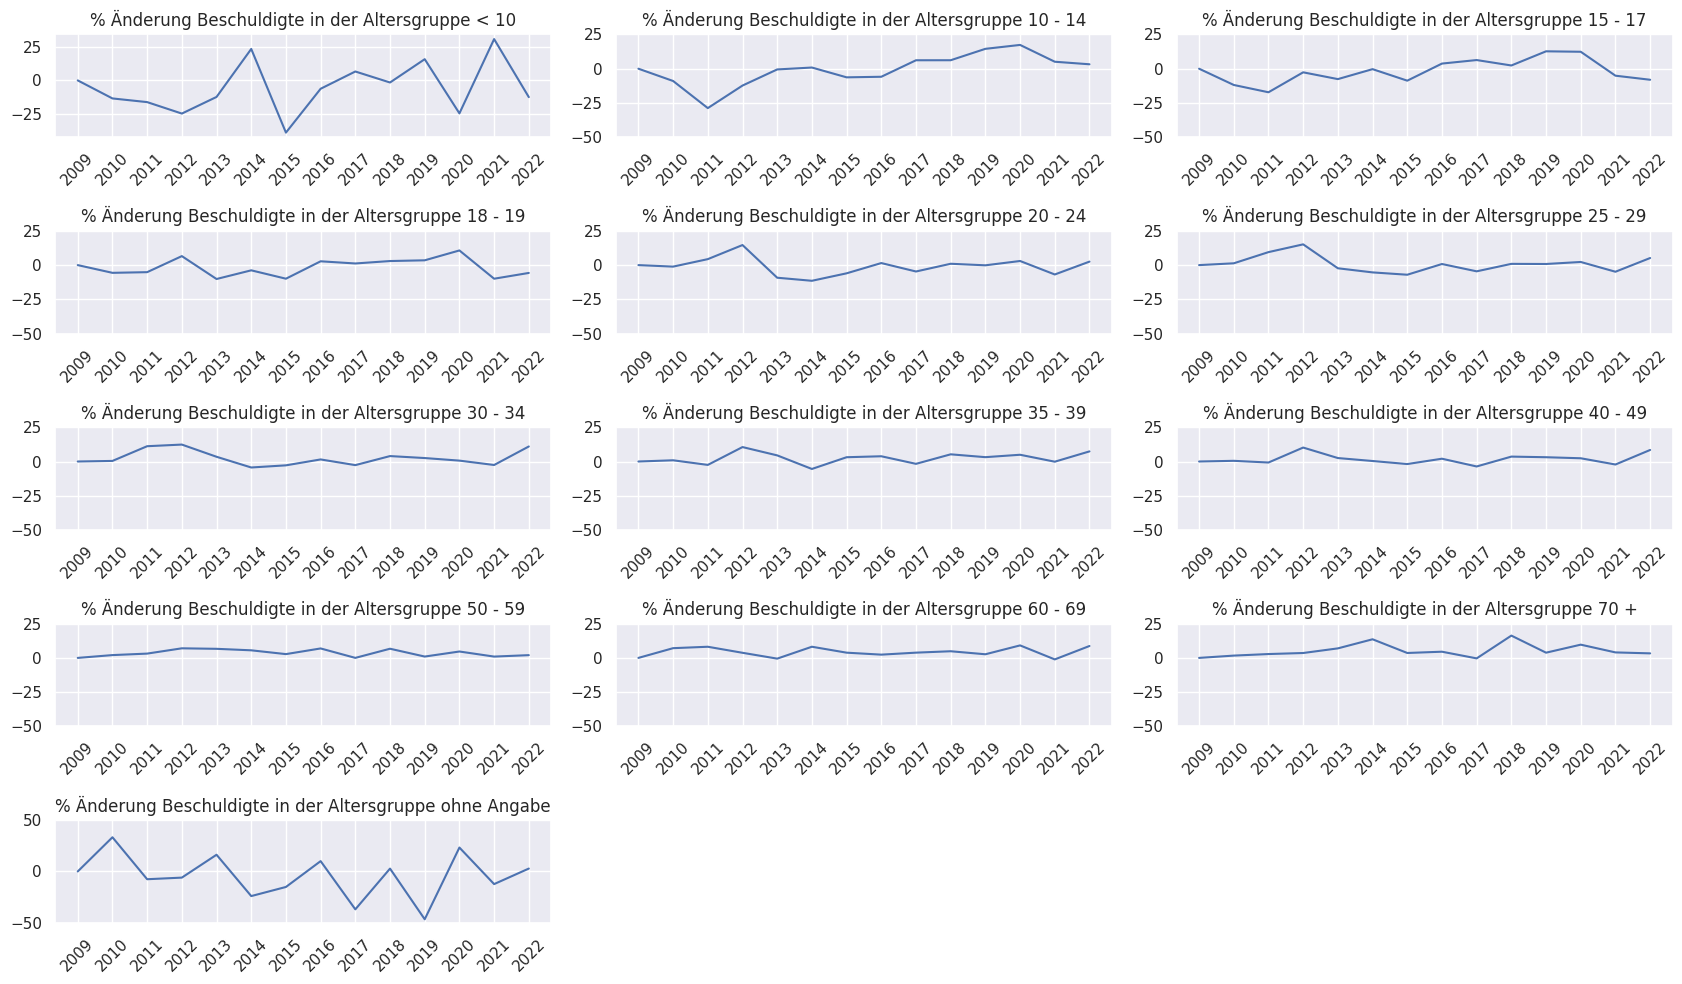

In [ ]:
#####
# gleicher code block wie oben, nur mit einheitlicher Y-Achse (ausser bei Alter oA und <10)
print("gleicher code block wie darüber - hier aber mit einheitlicher Y-Achse (ausser bei Alter oA und <10)")
#####

# Filtern nach Altersgruppe (bsp'<10 Jahre') und Wert in 2009 auf 0 setzen da es dort keine Prozentuale änderung gibt
df_filteredu10['Prozentuale_Veränderung'] = df_filteredu10['Total'].pct_change() * 100
df_filteredu10.loc[df_filteredu10['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered10_14['Prozentuale_Veränderung'] = df_filtered10_14['Total'].pct_change() * 100
df_filtered10_14.loc[df_filtered10_14['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered15_17['Prozentuale_Veränderung'] = df_filtered15_17['Total'].pct_change() * 100
df_filtered15_17.loc[df_filtered15_17['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered18_19['Prozentuale_Veränderung'] = df_filtered18_19['Total'].pct_change() * 100
df_filtered18_19.loc[df_filtered18_19['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered20_24['Prozentuale_Veränderung'] = df_filtered20_24['Total'].pct_change() * 100
df_filtered20_24.loc[df_filtered20_24['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered25_29['Prozentuale_Veränderung'] = df_filtered25_29['Total'].pct_change() * 100
df_filtered25_29.loc[df_filtered25_29['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered30_34['Prozentuale_Veränderung'] = df_filtered30_34['Total'].pct_change() * 100
df_filtered30_34.loc[df_filtered30_34['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered35_39['Prozentuale_Veränderung'] = df_filtered35_39['Total'].pct_change() * 100
df_filtered35_39.loc[df_filtered35_39['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered40_49['Prozentuale_Veränderung'] = df_filtered40_49['Total'].pct_change() * 100
df_filtered40_49.loc[df_filtered40_49['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered50_59['Prozentuale_Veränderung'] = df_filtered50_59['Total'].pct_change() * 100
df_filtered50_59.loc[df_filtered50_59['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered60_69['Prozentuale_Veränderung'] = df_filtered60_69['Total'].pct_change() * 100
df_filtered60_69.loc[df_filtered60_69['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered_70['Prozentuale_Veränderung'] = df_filtered_70['Total'].pct_change() * 100
df_filtered_70.loc[df_filtered_70['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

df_filtered_age_oA['Prozentuale_Veränderung'] = df_filtered_age_oA['Total'].pct_change() * 100
df_filtered_age_oA.loc[df_filtered_age_oA['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

# Festlegen der Größe des gesamten Diagramms
plt.figure(figsize=(17, 10))

# Erstes Diagramm (Altersgruppe '<10 Jahre')
plt.subplot(5, 3, 1)  # 13 Zeilen, 3 Spalten, erstes Diagramm
plt.plot(df_filteredu10['Jahr'], df_filteredu10['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe < 10')
plt.xticks(rotation=45)

plt.subplot(5, 3, 2)  # 1 Zeile, 3 Spalten, zweites Diagramm
plt.plot(df_filtered10_14['Jahr'], df_filtered10_14['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 10 - 14')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 3)
plt.plot(df_filtered15_17['Jahr'], df_filtered15_17['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 15 - 17')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 4)
plt.plot(df_filtered18_19['Jahr'], df_filtered18_19['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 18 - 19')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 5)
plt.plot(df_filtered20_24['Jahr'], df_filtered20_24['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 20 - 24')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 6)
plt.plot(df_filtered25_29['Jahr'], df_filtered25_29['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 25 - 29')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 7)
plt.plot(df_filtered30_34['Jahr'], df_filtered30_34['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 30 - 34')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 8)
plt.plot(df_filtered35_39['Jahr'], df_filtered35_39['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 35 - 39')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 9)
plt.plot(df_filtered40_49['Jahr'], df_filtered40_49['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 40 - 49')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 10)
plt.plot(df_filtered50_59['Jahr'], df_filtered50_59['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 50 - 59')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 11)
plt.plot(df_filtered60_69['Jahr'], df_filtered60_69['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 60 - 69')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 12)
plt.plot(df_filtered_70['Jahr'], df_filtered_70['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe 70 +')
plt.xticks(rotation=45)
plt.ylim(-50, 25)

plt.subplot(5, 3, 13)
plt.plot(df_filtered_age_oA['Jahr'], df_filtered_age_oA['Prozentuale_Veränderung'])
plt.title('% Änderung Beschuldigte in der Altersgruppe ohne Angabe')
plt.xticks(rotation=45)
plt.ylim(-50, 50)

plt.tight_layout()
plt.show()

## Entwicklung aller Altersgruppen von 2009 - 2022 im Vergleich

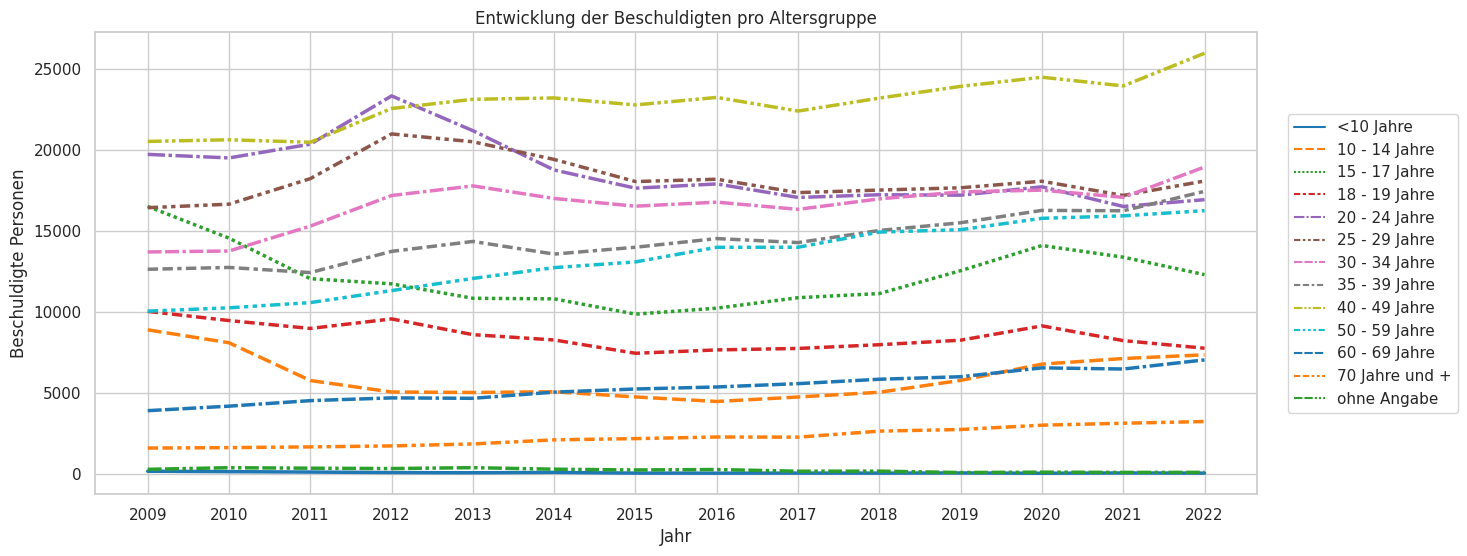

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

# Sortieren der Spalten nach der gewünschten Reihenfolge
altersgruppen_sortiert = ['<10 Jahre', '10 - 14 Jahre', '15 - 17 Jahre', '18 - 19 Jahre', '20 - 24 Jahre', '25 - 29 Jahre', '30 - 34 Jahre', '35 - 39 Jahre', '40 - 49 Jahre', '50 - 59 Jahre', '60 - 69 Jahre','70 Jahre und +', 'ohne Angabe']
# Anwenden der gewünschten Reihenfolge auf die Spalte 'Altersgruppe'
df_agegroup['Altersgruppe'] = pd.Categorical(df_agegroup['Altersgruppe'], categories=altersgruppen_sortiert)

# Pivotieren des DataFrames, um es für das Plotten geeignet zu machen
df_pivot = df_agegroup.pivot(index='Jahr', columns='Altersgruppe', values='Total')

# Plotten des Lineplot-Diagramms
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df_pivot, palette="tab10", linewidth=2.5, ax=ax)

# Legende anzeigen und positionieren
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Jahr')
plt.ylabel('Beschuldigte Personen')
plt.title('Entwicklung der Beschuldigten pro Altersgruppe')
plt.show()

## Total beschuldigte Personen nach Altersgruppen geclustert

Soll einen Überblick über das Strafverhalten der einzelnen Altersgruppe zeigen und wie die Verteilung der Straften aud diese Altersgruppen ist.

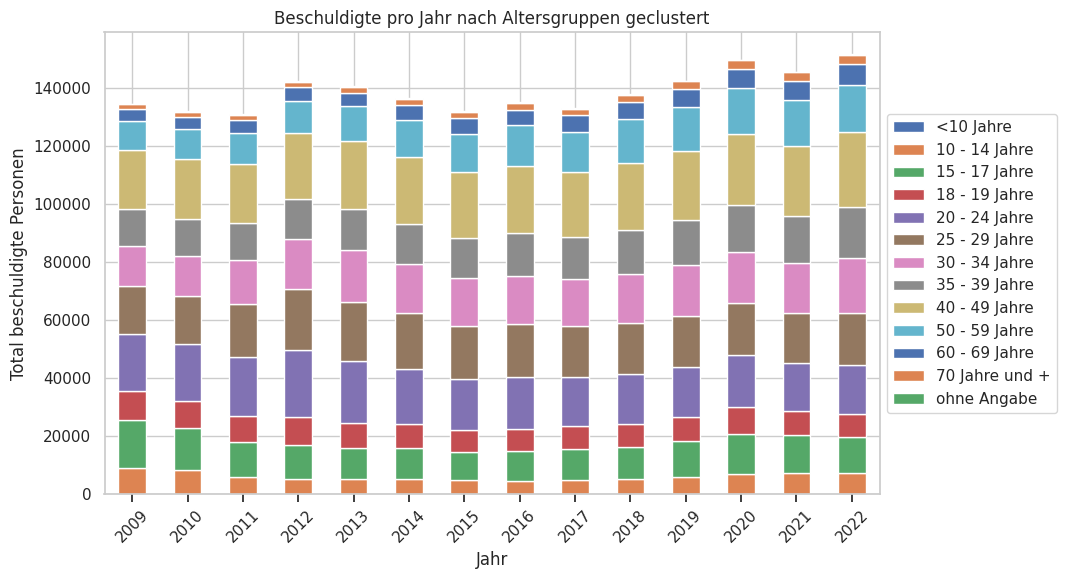

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
unique_agegroups = df_agegroup['Altersgruppe'].unique()
agegroup_dict = {}
for agegroup in unique_agegroups:
    mask = df_agegroup['Altersgruppe'] == agegroup
    agegroup_data = df_agegroup[mask]
    sorted_values = agegroup_data.sort_values(by='Jahr')['Total'].tolist()
    agegroup_dict[agegroup] = sorted_values
jahre = np.arange(2009, 2023)
data = {'Jahr': jahre,
        '<10 Jahre': agegroup_dict['<10 Jahre'],
        '10 - 14 Jahre': agegroup_dict['10 - 14 Jahre'],
        '15 - 17 Jahre': agegroup_dict['15 - 17 Jahre'],
        '18 - 19 Jahre': agegroup_dict['18 - 19 Jahre'],
        '20 - 24 Jahre': agegroup_dict['20 - 24 Jahre'],
        '25 - 29 Jahre': agegroup_dict['25 - 29 Jahre'],
        '30 - 34 Jahre': agegroup_dict['30 - 34 Jahre'],
        '35 - 39 Jahre': agegroup_dict['35 - 39 Jahre'],
        '40 - 49 Jahre': agegroup_dict['40 - 49 Jahre'],
        '50 - 59 Jahre': agegroup_dict['50 - 59 Jahre'],
        '60 - 69 Jahre': agegroup_dict['60 - 69 Jahre'],
        '70 Jahre und +': agegroup_dict['70 Jahre und +'],
        'ohne Angabe': agegroup_dict['ohne Angabe']}
df = pd.DataFrame(data)
df.set_index('Jahr', inplace=True)

ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Beschuldigte pro Jahr nach Altersgruppen geclustert')
plt.xlabel('Jahr')
plt.ylabel('Total beschuldigte Personen')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.tick_params(axis='x', bottom=True, labelbottom=True)
plt.xticks(rotation=45)
plt.show()

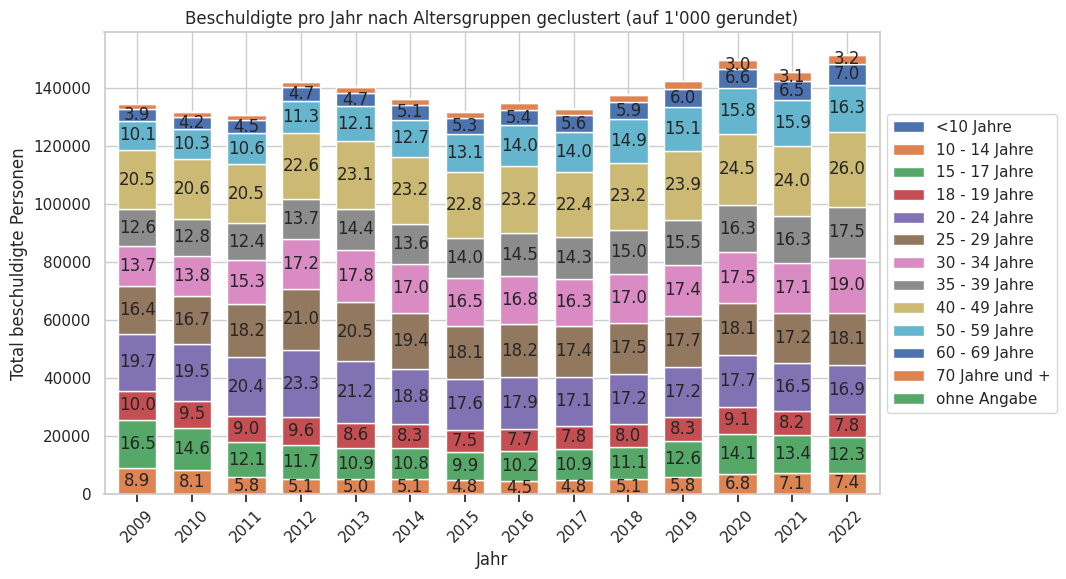

In [ ]:
### gleiches Diagramm aber mit Anzahl eingeblendet (auf 1000er gerundet)
import seaborn as sns
sns.set_theme(style="whitegrid")
unique_agegroups = df_agegroup['Altersgruppe'].unique()
agegroup_dict = {}
for agegroup in unique_agegroups:
    mask = df_agegroup['Altersgruppe'] == agegroup
    agegroup_data = df_agegroup[mask]
    sorted_values = agegroup_data.sort_values(by='Jahr')['Total'].tolist()
    agegroup_dict[agegroup] = sorted_values
jahre = np.arange(2009, 2023)
data = {'Jahr': jahre,
        '<10 Jahre': agegroup_dict['<10 Jahre'],
        '10 - 14 Jahre': agegroup_dict['10 - 14 Jahre'],
        '15 - 17 Jahre': agegroup_dict['15 - 17 Jahre'],
        '18 - 19 Jahre': agegroup_dict['18 - 19 Jahre'],
        '20 - 24 Jahre': agegroup_dict['20 - 24 Jahre'],
        '25 - 29 Jahre': agegroup_dict['25 - 29 Jahre'],
        '30 - 34 Jahre': agegroup_dict['30 - 34 Jahre'],
        '35 - 39 Jahre': agegroup_dict['35 - 39 Jahre'],
        '40 - 49 Jahre': agegroup_dict['40 - 49 Jahre'],
        '50 - 59 Jahre': agegroup_dict['50 - 59 Jahre'],
        '60 - 69 Jahre': agegroup_dict['60 - 69 Jahre'],
        '70 Jahre und +': agegroup_dict['70 Jahre und +'],
        'ohne Angabe': agegroup_dict['ohne Angabe']}
df = pd.DataFrame(data)
df.set_index('Jahr', inplace=True)
bar_width = 0.7
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), width=bar_width)
ax.set_title("Beschuldigte pro Jahr nach Altersgruppen geclustert (auf 1'000 gerundet)")
plt.xlabel('Jahr')
plt.ylabel('Total beschuldigte Personen')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.tick_params(axis='x', bottom=True, labelbottom=True)
plt.xticks(rotation=45)
for c in ax.containers:
    # wenn Wert kleiner als 2000 ist nicht anzeigen, damit diagramm lesbar bleibt
    labels = [round(v / 1000, 1) if v >= 2900.0 else "" for v in c.datavalues]
    ax.bar_label(c, label_type='center', labels=labels)
plt.show()

## Prozentual beschuldigte Personen nach Altersgruppen geclustert

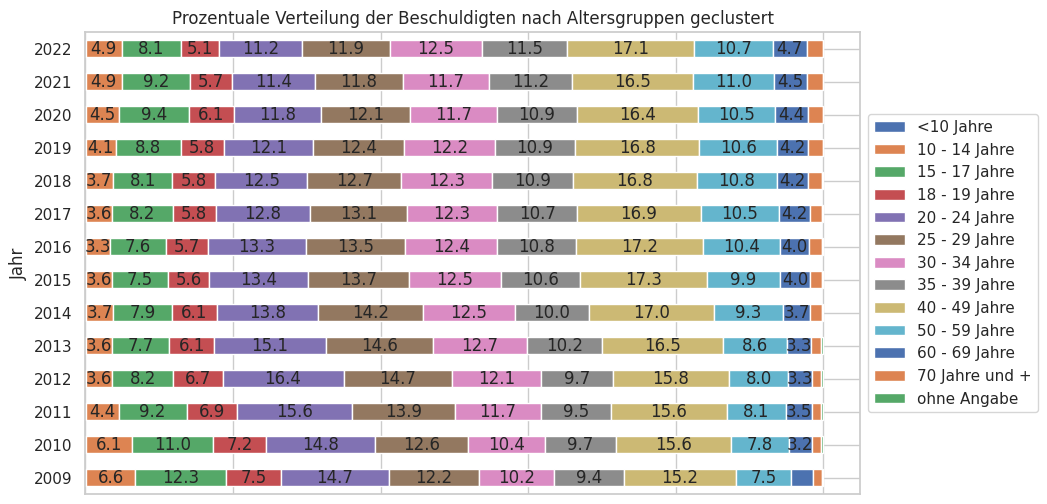

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
unique_agegroups = df_agegroup['Altersgruppe'].unique()
agegroup_dict = {}
for agegroup in unique_agegroups:
    mask = df_agegroup['Altersgruppe'] == agegroup
    agegroup_data = df_agegroup[mask]
    sorted_values = agegroup_data.sort_values(by='Jahr')['Total'].tolist()
    agegroup_dict[agegroup] = sorted_values
jahre = np.arange(2009, 2023)
data = {'Jahr': jahre,
        '<10 Jahre': agegroup_dict['<10 Jahre'],
        '10 - 14 Jahre': agegroup_dict['10 - 14 Jahre'],
        '15 - 17 Jahre': agegroup_dict['15 - 17 Jahre'],
        '18 - 19 Jahre': agegroup_dict['18 - 19 Jahre'],
        '20 - 24 Jahre': agegroup_dict['20 - 24 Jahre'],
        '25 - 29 Jahre': agegroup_dict['25 - 29 Jahre'],
        '30 - 34 Jahre': agegroup_dict['30 - 34 Jahre'],
        '35 - 39 Jahre': agegroup_dict['35 - 39 Jahre'],
        '40 - 49 Jahre': agegroup_dict['40 - 49 Jahre'],
        '50 - 59 Jahre': agegroup_dict['50 - 59 Jahre'],
        '60 - 69 Jahre': agegroup_dict['60 - 69 Jahre'],
        '70 Jahre und +': agegroup_dict['70 Jahre und +'],
        'ohne Angabe': agegroup_dict['ohne Angabe']}
df = pd.DataFrame(data)
df.set_index('Jahr', inplace=True)
df_percent = df.div(df.sum(axis=1), axis=0) * 100
df_percent_rounded = df_percent.round(2)
ax = df_percent_rounded.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_title('Prozentuale Verteilung der Beschuldigten nach Altersgruppen geclustert')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.tick_params(axis='x', bottom=False, labelbottom=False)
for c in ax.containers:
    # wenn Wert kleiner als 3 ist nicht anzeigen, damit diagramm lesbar bleibt
    labels = [round(v, 1) if v >= 3.0 else "" for v in c.datavalues]
    ax.bar_label(c, label_type='center', labels=labels)
plt.show()

## Alle Werte der Altersgruppen als Heatmap visualisiert

<Axes: xlabel='Altersgruppe', ylabel='Jahr'>

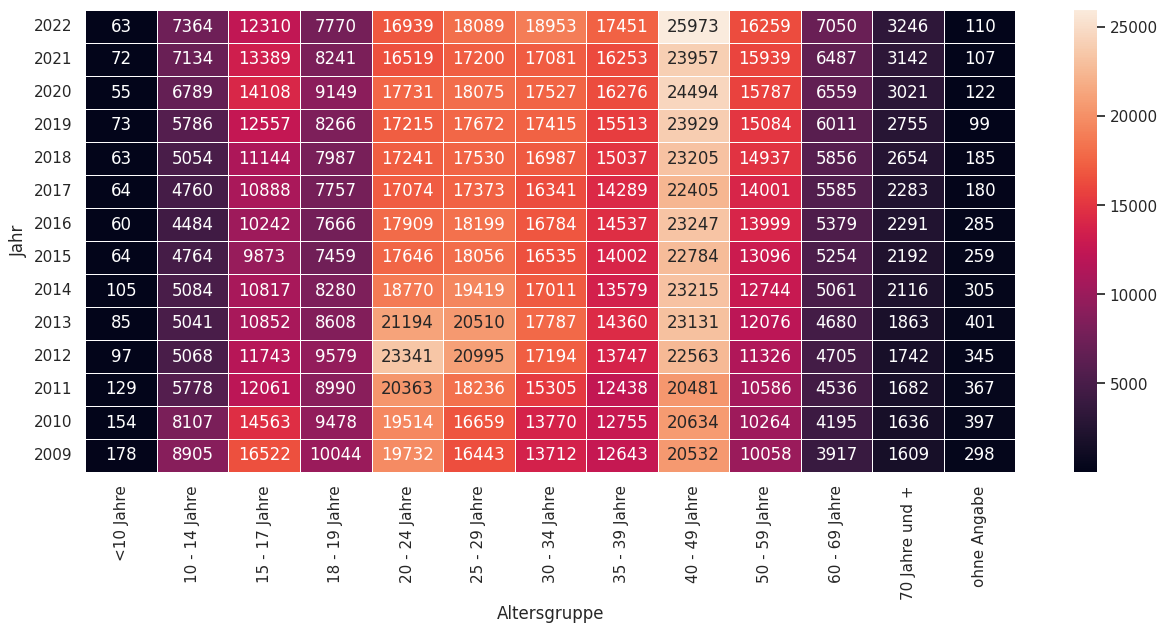

In [ ]:
sns.set_theme()
df_heatmap = df_agegroup
df_heatmap['Total'] = pd.to_numeric(df_heatmap['Total'], errors='coerce')

#konvertieren zu Ganzzahlen
df_heatmap['Total'] = df_heatmap['Total'].astype(int)

# Pivotiere das DataFrame, um es für eine Heatmap geeignet zu machen
heatmap_data = df_heatmap.pivot(index='Jahr', columns='Altersgruppe', values='Total')

# Spalten in der richtigen Reihenfolge
new_columns = ['<10 Jahre', '10 - 14 Jahre', '15 - 17 Jahre', '18 - 19 Jahre', '20 - 24 Jahre', '25 - 29 Jahre', '30 - 34 Jahre', '35 - 39 Jahre', '40 - 49 Jahre', '50 - 59 Jahre', '60 - 69 Jahre','70 Jahre und +', 'ohne Angabe']
heatmap_data = heatmap_data[new_columns]

# Index-Reihenfolge der Jahre umkehren
heatmap_data = heatmap_data.reindex(index=heatmap_data.index[::-1])
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", linewidths=.5, ax=ax)

# Analyse Geschlecht

Info/Anmerkung: Es wird zwischen Männer, Frauen und ohne Angabe unterschieden

In [ ]:
# ein zentrales geschlechts df erstellen
df_jahr_sammlung = {"2009": df_2009, "2010": df_2010, "2011": df_2011, "2012": df_2012, "2013": df_2013, "2014": df_2014, "2015": df_2015, "2016": df_2016, "2017": df_2017, "2018": df_2018, "2019": df_2019, "2020": df_2020, "2021": df_2021, "2022": df_2022}
df_geschlecht = pd.DataFrame(columns=['Jahr', 'Geschlecht', 'Total'])
jahre = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
geschlechter = ['Männlich', 'Weibliche', 'Geschlecht ohne Angabe']
for jahr in jahre:
    for geschlecht in geschlechter:
        index = len(df_geschlecht)
        df_jahr = df_jahr_sammlung[jahr]
        total = pd.to_numeric(df_jahr[geschlecht], errors='coerce').sum()
        df_geschlecht.at[index, 'Jahr'] = jahr
        df_geschlecht.at[index, 'Geschlecht'] = geschlecht
        df_geschlecht.at[index, 'Total'] = total


## Total beschuldigte Personen nach Geschlecht von 2009 - 2022

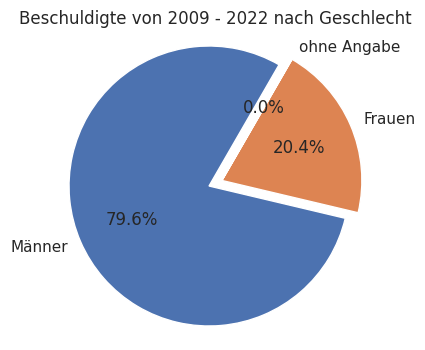

Die Grafik zeigt, dass von allen beschuldigten Personen zwischen 2009 bis 2022 knapp 80% Männer sind.

Über die Jahre hinweg von 2009 bis 2022 wurden Total nach Geschlecht folgende Anzahl Personen beschuldigt:
Männer mit 1548243.0 
Frauen mit 395759.0 
Und ohne Angabe von Geschlecht mit 320.0


In [ ]:
df_filtered_mann = df_geschlecht[df_geschlecht['Geschlecht'] == 'Männlich']
df_filtered_frau = df_geschlecht[df_geschlecht['Geschlecht'] == 'Weibliche']
df_filtered_na = df_geschlecht[df_geschlecht['Geschlecht'] == 'Geschlecht ohne Angabe']
werte = [df_filtered_mann.Total.sum(), df_filtered_frau.Total.sum(), df_filtered_na.Total.sum()]
labels = ["Männer", "Frauen", "ohne Angabe"]
explode = [0.1, 0, 0]
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(werte, labels=labels, explode=explode, autopct='%1.1f%%', startangle=60)
ax.axis('equal')
plt.title('Beschuldigte von 2009 - 2022 nach Geschlecht')
plt.show()
print("Die Grafik zeigt, dass von allen beschuldigten Personen zwischen 2009 bis 2022 knapp 80% Männer sind.")
print("\nÜber die Jahre hinweg von 2009 bis 2022 wurden Total nach Geschlecht folgende Anzahl Personen beschuldigt:\nMänner mit", df_filtered_mann.Total.sum(),"\nFrauen mit", df_filtered_frau.Total.sum(), "\nUnd ohne Angabe von Geschlecht mit", df_filtered_na.Total.sum())


## Entwicklung der Beschuldigten nach Geschlecht

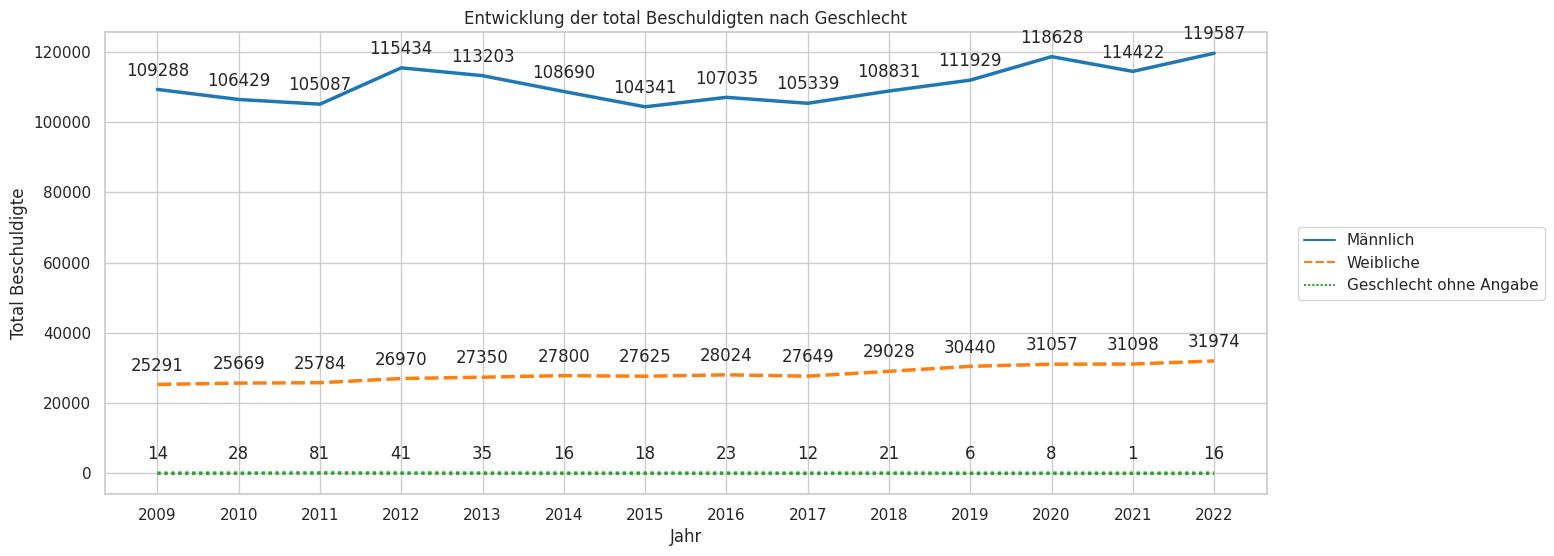

In [ ]:
# Analyse nach Geschlecht Gruppiert über die Jahre + Fokus auf Pandemiejahre (Ziel 4)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

# Sortieren und anwenden der Spalten nach der gewünschten Reihenfolge
geschlecht_sortiert = ['Männlich', 'Weibliche', 'Geschlecht ohne Angabe']
df_geschlecht['Geschlecht'] = pd.Categorical(df_geschlecht['Geschlecht'], categories=geschlecht_sortiert)

# Pivotieren des DataFrames, um es für das Plotten geeignet zu machen
df_pivot = df_geschlecht.pivot(index='Jahr', columns='Geschlecht', values='Total')

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df_pivot, palette="tab10", linewidth=2.5, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
plt.xlabel('Jahr')
plt.ylabel('Total Beschuldigte')
plt.title('Entwicklung der total Beschuldigten nach Geschlecht')
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

## Entwicklung der prozentualen Veränderung nach Geschlecht

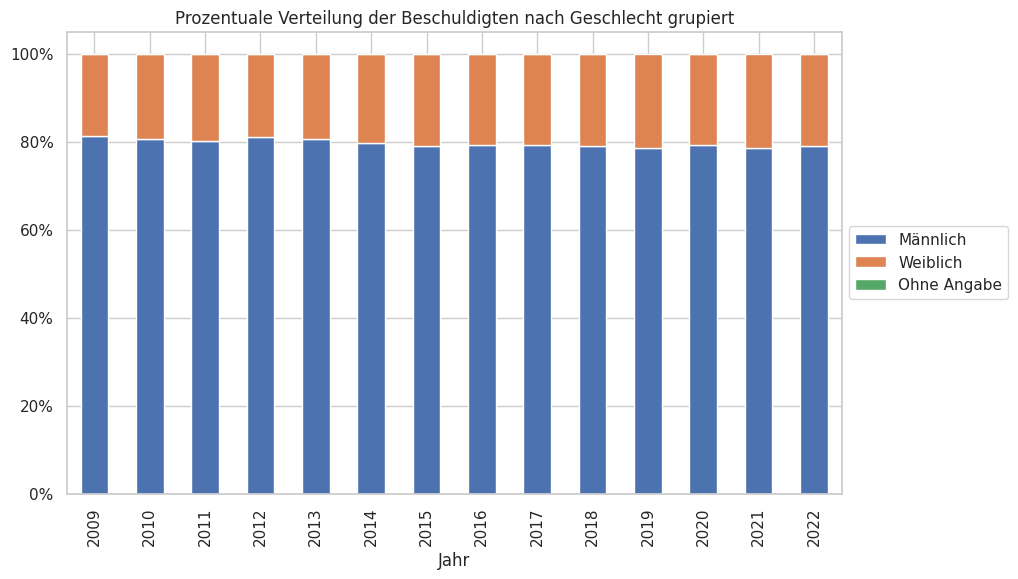

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Liste mit einzigartigen Werten in der Spalte 'Geschlecht' erstellen
unique_geschlecht = df_geschlecht['Geschlecht'].unique()
# Dictionary zum Speichern der Listen mit sortierten Werten erstellen
geschlecht_dict = {}
# Schleife über die einzigartigen Werte in 'Geschlecht' laufen
for geschlecht in unique_geschlecht:
    # Bedingung um die Zeilen mit dem aktuellen 'Geschlecht' zu extrahieren
    mask = df_geschlecht['Geschlecht'] == geschlecht
    geschlecht_data = df_geschlecht[mask]
    # Liste mit sortierten Werten erstellen und im Dictionary speichern
    sorted_values = geschlecht_data.sort_values(by='Jahr')['Total'].tolist()
    geschlecht_dict[geschlecht] = sorted_values
jahre = np.arange(2009, 2023)
data = {'Jahr': jahre,
        'Männlich': geschlecht_dict['Männlich'],
        'Weiblich': geschlecht_dict['Weibliche'],
        'Ohne Angabe': geschlecht_dict['Geschlecht ohne Angabe']}
df = pd.DataFrame(data)
df.set_index('Jahr', inplace=True)
df_percent = df.div(df.sum(axis=1), axis=0) * 100
df_percent_rounded = df_percent.round(2)
ax = df_percent_rounded.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Prozentuale Verteilung der Beschuldigten nach Geschlecht grupiert')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_yticks(range(0, 101, 20))
ax.set_yticklabels([f'{tick}%' for tick in range(0, 101, 20)])
plt.show()

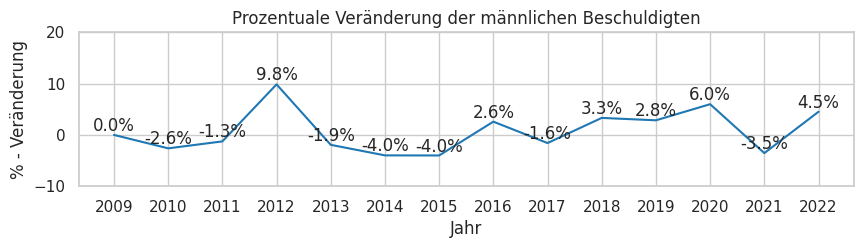

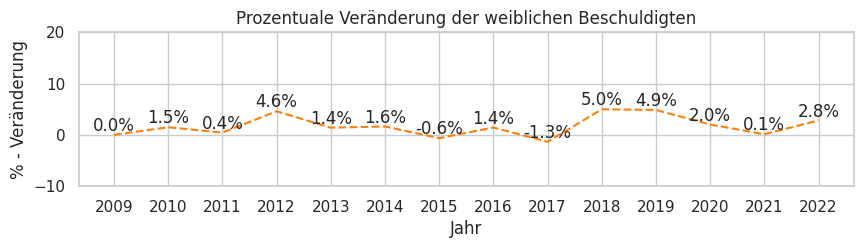

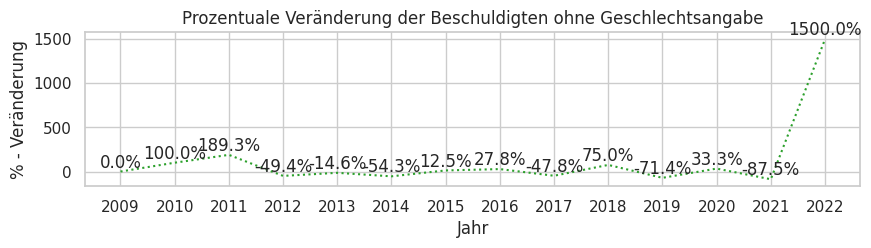

Der enorme Sprung für die Kategorie ohne Angabe im Jahr 2022 ist damit zu erklären, dass der Wert für das Jahr 2021 bei 1 lag,
die Anzahl Fälle im letzten Jahr jedoch auf einen Totalwert von 16.0 gestiegen sind.


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Filtern nach Altersgruppe 'Männlich'
df_filtered_mann = df_geschlecht[df_geschlecht['Geschlecht'] == 'Männlich']

# Berechnung der prozentualen Veränderung von Jahr zu Jahr
# Warnungen deaktivieren
pd.options.mode.chained_assignment = None
df_filtered_mann.loc[:, 'Prozentuale_Veränderung'] = df_filtered_mann['Total'].pct_change() * 100

# Wert in 2009 auf 0 setzen da es dort keine Prozentuale änderung gibt
df_filtered_mann.loc[df_filtered_mann['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

plt.figure(figsize=(10, 2))
sns.lineplot(data=df_filtered_mann, x='Jahr', y='Prozentuale_Veränderung', color='tab:blue', linestyle='solid')
plt.ylabel('% - Veränderung')
plt.ylim(-10, 20)
plt.title('Prozentuale Veränderung der männlichen Beschuldigten')
for i in range(len(df_filtered_mann)):
    plt.text(df_filtered_mann['Jahr'].iloc[i], df_filtered_mann['Prozentuale_Veränderung'].iloc[i], '{:.1f}%'.format(df_filtered_mann['Prozentuale_Veränderung'].iloc[i]), ha='center', va='bottom')
plt.show()
#######################################
# Filtern nach Altersgruppe 'Weibliche'
df_filtered_frau = df_geschlecht[df_geschlecht['Geschlecht'] == 'Weibliche']

# Berechnung der prozentualen Veränderung von Jahr zu Jahr
df_filtered_frau['Prozentuale_Veränderung'] = df_filtered_frau['Total'].pct_change() * 100

# Wert in 2009 auf 0 setzen da es dort keine Prozentuale änderung gibt
df_filtered_frau.loc[df_filtered_frau['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

plt.figure(figsize=(10, 2))
sns.lineplot(data=df_filtered_frau, x='Jahr', y='Prozentuale_Veränderung', color='tab:orange', linestyle='dashed')
plt.ylabel('% - Veränderung')
plt.ylim(-10, 20)
plt.title('Prozentuale Veränderung der weiblichen Beschuldigten')
for i in range(len(df_filtered_frau)):
    plt.text(df_filtered_frau['Jahr'].iloc[i], df_filtered_frau['Prozentuale_Veränderung'].iloc[i], '{:.1f}%'.format(df_filtered_frau['Prozentuale_Veränderung'].iloc[i]), ha='center', va='bottom')
plt.show()
#######################################
# Filtern nach Altersgruppe 'Geschlecht ohne Angabe'
df_filtered_oA = df_geschlecht[df_geschlecht['Geschlecht'] == 'Geschlecht ohne Angabe']

# Berechnung der prozentualen Veränderung von Jahr zu Jahr
df_filtered_oA['Prozentuale_Veränderung'] = df_filtered_oA['Total'].pct_change() * 100

# Wert in 2009 auf 0 setzen da es dort keine Prozentuale änderung gibt
df_filtered_oA.loc[df_filtered_oA['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0

plt.figure(figsize=(10, 2))
sns.lineplot(data=df_filtered_oA, x='Jahr', y='Prozentuale_Veränderung', color='tab:green', linestyle='dotted')
plt.ylabel('% - Veränderung')
plt.title('Prozentuale Veränderung der Beschuldigten ohne Geschlechtsangabe')
for i in range(len(df_filtered_frau)):
    plt.text(df_filtered_oA['Jahr'].iloc[i], df_filtered_oA['Prozentuale_Veränderung'].iloc[i], '{:.1f}%'.format(df_filtered_oA['Prozentuale_Veränderung'].iloc[i]), ha='center', va='bottom')
plt.show()
#############
median_mann = df_filtered_mann['Total'].median()
median_frau = df_filtered_frau['Total'].median()
median_oA = df_filtered_oA['Total'].median()
print("Der enorme Sprung für die Kategorie ohne Angabe im Jahr 2022 ist damit zu erklären, dass der Wert für das Jahr 2021 bei 1 lag,\ndie Anzahl Fälle im letzten Jahr jedoch auf einen Totalwert von", df_filtered_oA.loc[df_filtered_oA['Jahr'] == '2022', 'Total'].values[0], "gestiegen sind.")

# Analyse Schweizer_innen / Ausländer_innen

Info/Anmerkung: Ausländische Personen mit einer Aufenthaltsbewilligung der Kategorie B oder C werden im Datensatz als Schweizerinnen und Schweizer gezählt.

In [ ]:
# Zentrales df für CH-Ausländer aufteilung (df_residence)

# CH/Ausländer Anzahl beschuldigte Personen abfüllen
df_jahr_sammlung = {"2009": df_2009, "2010": df_2010, "2011": df_2011, "2012": df_2012, "2013": df_2013, "2014": df_2014, "2015": df_2015, "2016": df_2016, "2017": df_2017, "2018": df_2018, "2019": df_2019, "2020": df_2020, "2021": df_2021, "2022": df_2022}
df_residence = pd.DataFrame(columns=['Jahr', 'Schweizer/Ausländer-Status', 'Total'])
jahre = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
in_auslaender = ['Total\nSchweizer/innen', 'Total\nAusländer/innen']
for jahr in jahre:
    for in_ausland in in_auslaender:
        index = len(df_residence)
        df_jahr = df_jahr_sammlung[jahr]
        total = pd.to_numeric(df_jahr[in_ausland], errors='coerce').sum()
        df_residence.at[index, 'Jahr'] = jahr
        df_residence.at[index, 'Schweizer/Ausländer-Status'] = in_ausland
        df_residence.at[index, 'Total'] = total

## Totalwerte und deren Entwicklung der Schweizer_innen und Ausländer_innen

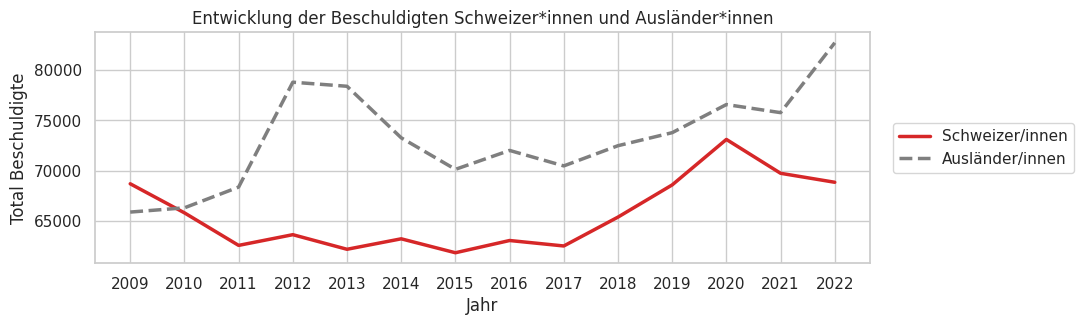

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

# Pivotieren des DataFrames, um es für das Plotten geeignet zu machen
df_pivot = df_residence.pivot(index='Jahr', columns='Schweizer/Ausländer-Status', values='Total')

# Plotten des Lineplot-Diagramms
f, ax = plt.subplots(figsize=(10, 3))
#sns.lineplot(data=df_pivot, palette=["tab:gray","tab:red"], linewidth=2.5, ax=ax)
sns.lineplot(data=df_pivot['Total\nSchweizer/innen'], color='tab:red', linewidth=2.5, linestyle='solid', label='Schweizer/innen', ax=ax)
sns.lineplot(data=df_pivot['Total\nAusländer/innen'], color='tab:gray', linewidth=2.5, linestyle='dashed', label='Ausländer/innen', ax=ax)

# Legende anzeigen und positionieren
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Jahr')
plt.ylabel('Total Beschuldigte')
plt.title('Entwicklung der Beschuldigten Schweizer*innen und Ausländer*innen')
plt.show()

## Prozentuale Verteilung und Entwicklung der Schweizer_innen und Ausländer_innen

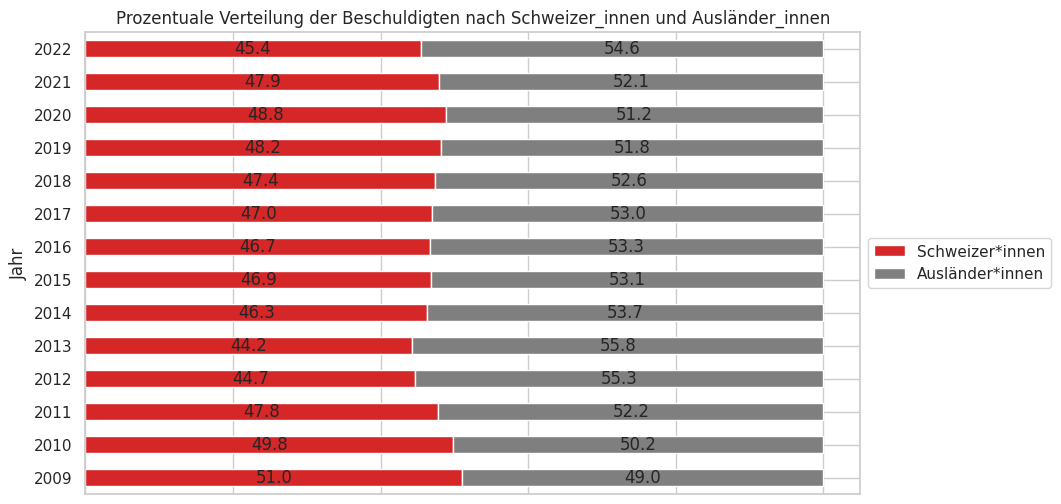

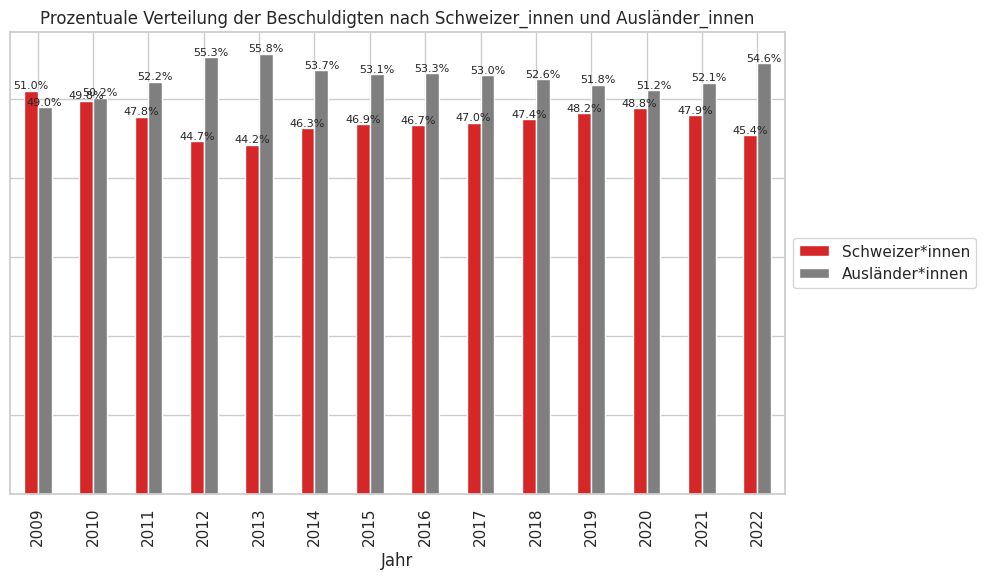

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
colors = ["tab:red", "tab:gray"]

# Liste mit einzigartigen Werten in der Spalte 'Schweizer/Ausländer-Status' erstellen
unique_residence = df_residence['Schweizer/Ausländer-Status'].unique()
# Dictionary zum Speichern der Listen mit sortierten Werten erstellen
residence_dict = {}
# Schleife über die einzigartigen Werte in 'Altersgruppe' laufen
for residence in unique_residence:
    # Bedingung um die Zeilen mit der aktuellen 'Altersgruppe' zu extrahieren
    mask = df_residence['Schweizer/Ausländer-Status'] == residence
    residence_data = df_residence[mask]
    # Liste mit sortierten Werten erstellen und im Dictionary speichern
    sorted_values = residence_data.sort_values(by='Jahr')['Total'].tolist()
    residence_dict[residence] = sorted_values
jahre = np.arange(2009, 2023)
data = {'Jahr': jahre,
        'Schweizer*innen': residence_dict['Total\nSchweizer/innen'],
        'Ausländer*innen': residence_dict['Total\nAusländer/innen']}
df = pd.DataFrame(data)
df.set_index('Jahr', inplace=True)
df_percent = df.div(df.sum(axis=1), axis=0) * 100
df_percent_rounded = df_percent.round(2)
ax = df_percent_rounded.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
ax.set_title('Prozentuale Verteilung der Beschuldigten nach Schweizer_innen und Ausländer_innen')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#X-Achse ausblenden, da sie lediglich die 20-Prozent-Schritte von 0 bis 100 anzeigt, ohne Bezug zu den dargestellten Werten
ax.tick_params(axis='x', bottom=False, labelbottom=False)
for c in ax.containers:
    ax.bar_label(c, label_type='center', labels=[round(v, 1) for v in c.datavalues])
plt.show()
##########
#2 teil
##########
data = {'Jahr': jahre,
        'Schweizer*innen': residence_dict['Total\nSchweizer/innen'],
        'Ausländer*innen': residence_dict['Total\nAusländer/innen']}
df = pd.DataFrame(data)
df.set_index('Jahr', inplace=True)
df_percent = df.div(df.sum(axis=1), axis=0) * 100
df_percent_rounded = df_percent.round(2)
ax = df_percent_rounded.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
ax.set_title('Prozentuale Verteilung der Beschuldigten nach Schweizer_innen und Ausländer_innen')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#Y-Achse ausblenden, da sie lediglich die 20-Prozent-Schritte von 0 bis 100 anzeigt, ohne Bezug zu den dargestellten Werten
ax.tick_params(axis='y', left=False, labelleft=False)

for p in ax.containers:
    ax.bar_label(p, labels=[f"{v:.1f}%" for v in p.datavalues], label_type='edge', fontsize=8)
plt.show()


## Direkter Vergleich von Schweizer_innen und Ausländer_innen

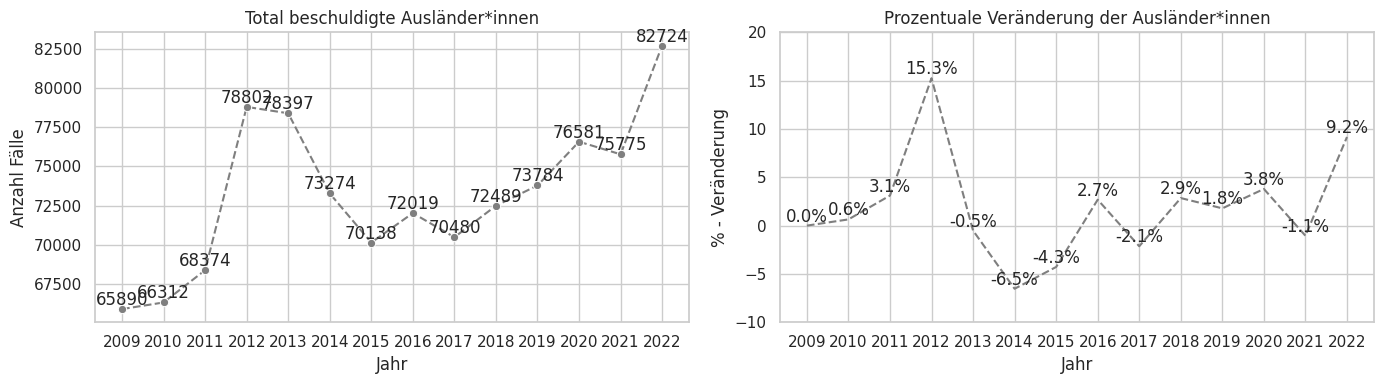

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Erstellen eines Rasters von 1 Zeilen und 2 Spalten
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Filtern nach Nationalität 'Total Ausländer*innen'
df_filtered_foreigner = df_residence[df_residence['Schweizer/Ausländer-Status'] == 'Total\nAusländer/innen']

# Erstes Diagramm: Anzahl Fälle für Ausländer*innen
ax1 = axes[0]
sns.lineplot(data=df_filtered_foreigner, x='Jahr', y='Total', color='tab:gray', linestyle='dashed', marker='o', ax=ax1)
for i in range(len(df_filtered_foreigner)):
    value = int(df_filtered_foreigner['Total'].iloc[i])
    ax1.text(df_filtered_foreigner['Jahr'].iloc[i], df_filtered_foreigner['Total'].iloc[i], str(value), ha='center', va='bottom')
ax1.set_ylabel('Anzahl Fälle')
ax1.set_title('Total beschuldigte Ausländer*innen')

# zweites Diagramm: Prozentuale Veränderung für Ausländer*innen
ax2 = axes[1]
df_filtered_foreigner['Prozentuale_Veränderung'] = df_filtered_foreigner['Total'].pct_change() * 100
df_filtered_foreigner.loc[df_filtered_foreigner['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0
sns.lineplot(data=df_filtered_foreigner, x='Jahr', y='Prozentuale_Veränderung', color='tab:gray', linestyle='dashed', ax=ax2)
ax2.set_ylabel('% - Veränderung')
ax2.set_title('Prozentuale Veränderung der Ausländer*innen')
ax2.set_ylim(-10, 20)
for i in range(len(df_filtered_foreigner)):
    ax2.text(df_filtered_foreigner['Jahr'].iloc[i], df_filtered_foreigner['Prozentuale_Veränderung'].iloc[i], '{:.1f}%'.format(df_filtered_foreigner['Prozentuale_Veränderung'].iloc[i]), ha='center', va='bottom')
plt.tight_layout()
plt.show()

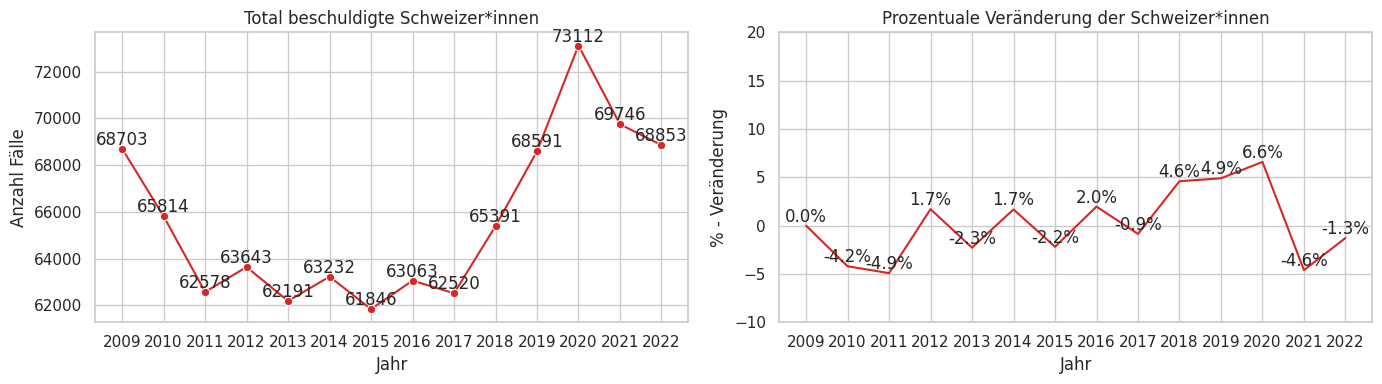

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Erstellen eines Rasters von 1 Zeilen und 2 Spalten
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Filtern nach Nationalität 'Total Schweizer*innen'
df_filtered_ch = df_residence[df_residence['Schweizer/Ausländer-Status'] == 'Total\nSchweizer/innen']

# Erstes Diagramm: Anzahl Fälle für Schweizer*innen
ax1 = axes[0]
sns.lineplot(data=df_filtered_ch, x='Jahr', y='Total', color='tab:red', linestyle='solid', marker='o', ax=ax1)
for i in range(len(df_filtered_ch)):
    value = int(df_filtered_ch['Total'].iloc[i])
    ax1.text(df_filtered_ch['Jahr'].iloc[i], df_filtered_ch['Total'].iloc[i], str(value), ha='center', va='bottom')
ax1.set_ylabel('Anzahl Fälle')
ax1.set_title('Total beschuldigte Schweizer*innen')

# Zweites Diagramm: Prozentuale Veränderung für Schweizer*innen
ax2 = axes[1]
df_filtered_ch['Prozentuale_Veränderung'] = df_filtered_ch['Total'].pct_change() * 100
df_filtered_ch.loc[df_filtered_ch['Jahr'] == '2009', 'Prozentuale_Veränderung'] = 0
sns.lineplot(data=df_filtered_ch, x='Jahr', y='Prozentuale_Veränderung', color='tab:red', linestyle='solid', ax=ax2)
ax2.set_ylabel('% - Veränderung')
ax2.set_title('Prozentuale Veränderung der Schweizer*innen')
ax2.set_ylim(-10, 20)
for i in range(len(df_filtered_ch)):
    ax2.text(df_filtered_ch['Jahr'].iloc[i], df_filtered_ch['Prozentuale_Veränderung'].iloc[i], '{:.1f}%'.format(df_filtered_ch['Prozentuale_Veränderung'].iloc[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()